In [3]:
#Split location-only results by MA and cone angle.

import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
#from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#import cmcrameri.cm as cmc

#cmap=cmc.batlow

In [4]:
XMA_all = 10

In [7]:
#import C1/C2/C3/C4 csvs and determine min/max power
#then go back to update the colourmap norm choice

##load Cluster CSVs

cl_file_list = []

path = "/Users/roseatkinson/Documents/Cluster_Integrated_CSVs/**"

for path in glob.glob(path, recursive=True):
    if '.csv' in path:
        cl_file_list.append(path)
    
cl_23_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
    df.set_index('datetime', inplace = True)
    cl_23_dfs.append(df)

cl_power_all = pd.concat(cl_23_dfs)

#Filtering: remove OMNI too far, current sheets, & null GIPM entries
cl_filtered = cl_power_all.loc[(cl_power_all['OMNI Dist from X line (mean)'] < 70) & (cl_power_all['Max IMF Deviation'] < 60) & (cl_power_all['GIPM X (OMNI mean)'].notnull())]

In [10]:
cl_filtered_lowZ = cl_filtered.loc[(cl_filtered['GIPM Z (OMNI mean)'] < 5) & (cl_filtered['GIPM Z (OMNI mean)'] > -5)]

In [15]:
#coverage histograms

#split by MA & CA

df_radial = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] < 30)]
df_lowspiral = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 30) & (cl_filtered_lowZ['cone angle (mean)'] < 45)]
df_highspiral = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 45) & (cl_filtered_lowZ['cone angle (mean)'] < 60)]
df_lowperpendicular = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 60) & (cl_filtered_lowZ['cone angle (mean)'] < 75)]
df_highperpendicular = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 75)]

#radial
df_rad_less5 = df_radial.loc[(df_radial['M_A (mean)'] < 5)]
df_rad_5_10 = df_radial.loc[((df_radial['M_A (mean)'] >= 5) & (df_radial['M_A (mean)'] < 10))]
df_rad_10_15 = df_radial.loc[((df_radial['M_A (mean)'] >= 10) & (df_radial['M_A (mean)'] < 15))]
df_rad_15more = df_radial.loc[(df_radial['M_A (mean)'] >= 15)]

#lowspiral 

df_lowspir_less5 = df_lowspiral.loc[(df_lowspiral['M_A (mean)'] < 5)]
df_lowspir_5_10 = df_lowspiral.loc[((df_lowspiral['M_A (mean)'] >= 5) & (df_lowspiral['M_A (mean)'] < 10))]
df_lowspir_10_15 = df_lowspiral.loc[((df_lowspiral['M_A (mean)'] >= 10) & (df_lowspiral['M_A (mean)'] < 15))]
df_lowspir_15more = df_lowspiral.loc[(df_lowspiral['M_A (mean)'] >= 15)]

#highspiral 

df_highspir_less5 = df_highspiral.loc[(df_highspiral['M_A (mean)'] < 5)]
df_highspir_5_10 = df_highspiral.loc[((df_highspiral['M_A (mean)'] >= 5) & (df_highspiral['M_A (mean)'] < 10))]
df_highspir_10_15 = df_highspiral.loc[((df_highspiral['M_A (mean)'] >= 10) & (df_highspiral['M_A (mean)'] < 15))]
df_highspir_15more = df_highspiral.loc[(df_highspiral['M_A (mean)'] >= 15)]

#lowperpendicular

df_lowperp_less5 = df_lowperpendicular.loc[(df_lowperpendicular['M_A (mean)'] < 5)]
df_lowperp_5_10 = df_lowperpendicular.loc[((df_lowperpendicular['M_A (mean)'] >= 5) & (df_lowperpendicular['M_A (mean)'] < 10))]
df_lowperp_10_15 = df_lowperpendicular.loc[((df_lowperpendicular['M_A (mean)'] >= 10) & (df_lowperpendicular['M_A (mean)'] < 15))]
df_lowperp_15more = df_lowperpendicular.loc[(df_lowperpendicular['M_A (mean)'] >= 15)]

#highperpendicular

df_highperp_less5 = df_highperpendicular.loc[(df_highperpendicular['M_A (mean)'] < 5)]
df_highperp_5_10 = df_highperpendicular.loc[((df_highperpendicular['M_A (mean)'] >= 5) & (df_highperpendicular['M_A (mean)'] < 10))]
df_highperp_10_15 = df_highperpendicular.loc[((df_highperpendicular['M_A (mean)'] >= 10) & (df_highperpendicular['M_A (mean)'] < 15))]
df_highperp_15more = df_highperpendicular.loc[(df_highperpendicular['M_A (mean)'] >= 15)]

In [16]:
#MA & CA binned histograms
x_bin_edges = range(20)
y_bin_edges = range(-20,20)

###BELOW 5MA

x_locs_rad_less5 = df_rad_less5['GIPM X (OMNI mean)'].to_numpy()
y_locs_rad_less5 = df_rad_less5['GIPM Y (OMNI mean)'].to_numpy()

HistXY_rad_less5, xedg, yedg = np.histogram2d(x_locs_rad_less5, y_locs_rad_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_less5 = HistXY_rad_less5.T

###5-10 MA

x_locs_rad_5_10 = df_rad_5_10['GIPM X (OMNI mean)'].to_numpy()
y_locs_rad_5_10 = df_rad_5_10['GIPM Y (OMNI mean)'].to_numpy()

HistXY_rad_5_10, xedg, zedg = np.histogram2d(x_locs_rad_5_10, y_locs_rad_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_5_10 = HistXY_rad_5_10.T

###10-15 MA

x_locs_rad_10_15 = df_rad_10_15['GIPM X (OMNI mean)'].to_numpy()
y_locs_rad_10_15 = df_rad_10_15['GIPM Y (OMNI mean)'].to_numpy()

HistXY_rad_10_15, xedg, zedg = np.histogram2d(x_locs_rad_10_15, y_locs_rad_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_10_15 = HistXY_rad_10_15.T

###OVER 15MA

x_locs_rad_15more = df_rad_15more['GIPM X (OMNI mean)'].to_numpy()
y_locs_rad_15more= df_rad_15more['GIPM Y (OMNI mean)'].to_numpy()

HistXY_rad_15more, xedg, yedg = np.histogram2d(x_locs_rad_15more, y_locs_rad_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_rad_15more = HistXY_rad_15more.T

HistXY_rad_less5[HistXY_rad_less5 == 0] = np.nan
HistXY_rad_5_10[HistXY_rad_5_10 == 0] = np.nan
HistXY_rad_10_15[HistXY_rad_10_15 == 0] = np.nan
HistXY_rad_15more[HistXY_rad_15more == 0] = np.nan

#########LOWSPIRAL######
###BELOW 5MA

x_locs_lowspir_less5 = df_lowspir_less5['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowspir_less5 = df_lowspir_less5['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowspir_less5, xedg, yedg = np.histogram2d(x_locs_lowspir_less5, y_locs_lowspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_less5 = HistXY_lowspir_less5.T

###5-10 MA

x_locs_lowspir_5_10 = df_lowspir_5_10['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowspir_5_10 = df_lowspir_5_10['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowspir_5_10, xedg, zedg = np.histogram2d(x_locs_lowspir_5_10, y_locs_lowspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_5_10 = HistXY_lowspir_5_10.T

###10-15 MA

x_locs_lowspir_10_15 = df_lowspir_10_15['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowspir_10_15 = df_lowspir_10_15['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowspir_10_15, xedg, zedg = np.histogram2d(x_locs_lowspir_10_15, y_locs_lowspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_10_15 = HistXY_lowspir_10_15.T

###OVER 15MA
x_locs_lowspir_15more = df_lowspir_15more['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowspir_15more = df_lowspir_15more['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowspir_15more, xedg, yedg = np.histogram2d(x_locs_lowspir_15more, y_locs_lowspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowspir_15more = HistXY_lowspir_15more.T

HistXY_lowspir_less5[HistXY_lowspir_less5 == 0] = np.nan
HistXY_lowspir_5_10[HistXY_lowspir_5_10 == 0] = np.nan
HistXY_lowspir_10_15[HistXY_lowspir_10_15 == 0] = np.nan
HistXY_lowspir_15more[HistXY_lowspir_15more == 0] = np.nan

#########HIGHSPIRAL######
###BELOW 5MA

x_locs_highspir_less5 = df_highspir_less5['GIPM X (OMNI mean)'].to_numpy()
y_locs_highspir_less5 = df_highspir_less5['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highspir_less5, xedg, yedg = np.histogram2d(x_locs_highspir_less5, y_locs_highspir_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_less5 = HistXY_highspir_less5.T

###5-10 MA

x_locs_highspir_5_10 = df_highspir_5_10['GIPM X (OMNI mean)'].to_numpy()
y_locs_highspir_5_10 = df_highspir_5_10['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highspir_5_10, xedg, zedg = np.histogram2d(x_locs_highspir_5_10, y_locs_highspir_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_5_10 = HistXY_highspir_5_10.T

###10-15 MA

x_locs_highspir_10_15 = df_highspir_10_15['GIPM X (OMNI mean)'].to_numpy()
y_locs_highspir_10_15 = df_highspir_10_15['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highspir_10_15, xedg, zedg = np.histogram2d(x_locs_highspir_10_15, y_locs_highspir_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_10_15 = HistXY_highspir_10_15.T

###OVER 15MA
x_locs_highspir_15more = df_highspir_15more['GIPM X (OMNI mean)'].to_numpy()
y_locs_highspir_15more = df_highspir_15more['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highspir_15more, xedg, yedg = np.histogram2d(x_locs_highspir_15more, y_locs_highspir_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highspir_15more = HistXY_highspir_15more.T

HistXY_highspir_less5[HistXY_highspir_less5 == 0] = np.nan
HistXY_highspir_5_10[HistXY_highspir_5_10 == 0] = np.nan
HistXY_highspir_10_15[HistXY_highspir_10_15 == 0] = np.nan
HistXY_highspir_15more[HistXY_highspir_15more == 0] = np.nan

#####LOW PERPENDICULAR

###BELOW 5MA

x_locs_lowperp_less5 = df_lowperp_less5['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowperp_less5 = df_lowperp_less5['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowperp_less5, xedg, yedg = np.histogram2d(x_locs_lowperp_less5, y_locs_lowperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_less5 = HistXY_lowperp_less5.T

###5-10 MA

x_locs_lowperp_5_10 = df_lowperp_5_10['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowperp_5_10 = df_lowperp_5_10['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowperp_5_10, xedg, zedg = np.histogram2d(x_locs_lowperp_5_10, y_locs_lowperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_5_10 = HistXY_lowperp_5_10.T

###10-15 MA

x_locs_lowperp_10_15 = df_lowperp_10_15['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowperp_10_15 = df_lowperp_10_15['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowperp_10_15, xedg, zedg = np.histogram2d(x_locs_lowperp_10_15, y_locs_lowperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_10_15 = HistXY_lowperp_10_15.T

###OVER 15MA
x_locs_lowperp_15more = df_lowperp_15more['GIPM X (OMNI mean)'].to_numpy()
y_locs_lowperp_15more = df_lowperp_15more['GIPM Y (OMNI mean)'].to_numpy()

HistXY_lowperp_15more, xedg, yedg = np.histogram2d(x_locs_lowperp_15more, y_locs_lowperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_lowperp_15more = HistXY_lowperp_15more.T

HistXY_lowperp_less5[HistXY_lowperp_less5 == 0] = np.nan
HistXY_lowperp_5_10[HistXY_lowperp_5_10 == 0] = np.nan
HistXY_lowperp_10_15[HistXY_lowperp_10_15 == 0] = np.nan
HistXY_lowperp_15more[HistXY_lowperp_15more == 0] = np.nan

#####HIGH PERPENDICULAR

###BELOW 5MA

x_locs_highperp_less5 = df_highperp_less5['GIPM X (OMNI mean)'].to_numpy()
y_locs_highperp_less5 = df_highperp_less5['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highperp_less5, xedg, yedg = np.histogram2d(x_locs_highperp_less5, y_locs_highperp_less5, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_less5 = HistXY_highperp_less5.T

###5-10 MA

x_locs_highperp_5_10 = df_highperp_5_10['GIPM X (OMNI mean)'].to_numpy()
y_locs_highperp_5_10 = df_highperp_5_10['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highperp_5_10, xedg, zedg = np.histogram2d(x_locs_highperp_5_10, y_locs_highperp_5_10, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_5_10 = HistXY_highperp_5_10.T

###10-15 MA

x_locs_highperp_10_15 = df_highperp_10_15['GIPM X (OMNI mean)'].to_numpy()
y_locs_highperp_10_15 = df_highperp_10_15['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highperp_10_15, xedg, zedg = np.histogram2d(x_locs_highperp_10_15, y_locs_highperp_10_15, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_10_15 = HistXY_highperp_10_15.T

###OVER 15MA
x_locs_highperp_15more = df_highperp_15more['GIPM X (OMNI mean)'].to_numpy()
y_locs_highperp_15more = df_highperp_15more['GIPM Y (OMNI mean)'].to_numpy()

HistXY_highperp_15more, xedg, yedg = np.histogram2d(x_locs_highperp_15more, y_locs_highperp_15more, bins=[x_bin_edges, y_bin_edges])
HistXY_highperp_15more = HistXY_highperp_15more.T

HistXY_highperp_less5[HistXY_highperp_less5 == 0] = np.nan
HistXY_highperp_5_10[HistXY_highperp_5_10 == 0] = np.nan
HistXY_highperp_10_15[HistXY_highperp_10_15 == 0] = np.nan
HistXY_highperp_15more[HistXY_highperp_15more == 0] = np.nan

In [26]:
#Shue magnetopause model, D = 1.76 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z = 0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

#make a coverage plot

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]


# -------------------------------
# Helper functions
# -------------------------------

def draw_background(ax, xg, yg, f, x_shue, r_shue):
    """Draw magnetopause, bow shock + y=0 line"""
    ax.contour(xg, yg, f, levels=[0], colors="black", linewidths=1)
    ax.plot(x_shue, r_shue, 'k', linewidth=1)
    ax.hlines(0, 0, 25, color='k', linewidth=1)


def draw_hist(ax, hist, extent, cmap, angle_line):
    """Draw heatmap + flow line"""
    ax.imshow(hist, interpolation='none', origin='lower',
              extent=extent, cmap=cmap, vmin=50, vmax=300)
    
    x_s, x_e, y_s, y_e = angle_line
    ax.plot([x_s, x_e], [y_s, angle_line[3]], color='k', linewidth=1)

def set_limits(ax):
    ax.set_xlim(0, 20)
    ax.set_ylim(-20, 20)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_aspect('equal')

# -------------------------------
# PRECOMPUTED CONSTANTS
# -------------------------------

# Bow shock intercept
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
x_s = (-fitting_coeffs[6] + np.sqrt(inter_med)) / fitting_coeffs[0]
x_e = 30
y_s = 0

# Line slopes for different angle classes
line_slopes = {
    "0–30°": np.tan(np.deg2rad(15)),
    "30–45°": np.tan(np.deg2rad(37.5)),
    "45–60°": np.tan(np.deg2rad(52.5)),
    "60–75°": np.tan(np.deg2rad(67.5)),
    "75–90°": np.tan(np.deg2rad(82.5)),
}

# Put all hist arrays into structured blocks so they're iterable
hist_blocks = [
    [HistXY_rad_15more, HistXY_lowspir_15more, HistXY_highspir_15more, HistXY_lowperp_15more, HistXY_highperp_15more],
    [HistXY_rad_10_15, HistXY_lowspir_10_15, HistXY_highspir_10_15, HistXY_lowperp_10_15, HistXY_highperp_10_15],
    [HistXY_rad_5_10, HistXY_lowspir_5_10, HistXY_highspir_5_10, HistXY_lowperp_5_10, HistXY_highperp_5_10],
    [HistXY_rad_less5, HistXY_lowspir_less5, HistXY_highspir_less5, HistXY_lowperp_less5, HistXY_highperp_less5]
    
]

angle_titles = ["0–30°", "30–45°", "45–60°", "60–75°", "75–90°"]

# Heatmap extent (assuming X/Y are same for all)
extent = [xedg[0], xedg[-1], yedg[0], yedg[-1]]


def mask_inside_magnetopause(ax, x_shue, r_shue):
    """
    Mask (fill white) the region inside the magnetopause and bounded by x=0.
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to draw on
    x_shue : array
        X coordinates of magnetopause
    r_shue : array
        R (Y) coordinates of magnetopause
    zorder : int zorder=10
        Draw order (should be higher than background contours)
    """

    # Ensure arrays are numpy arrays
    x_shue = np.asarray(x_shue)
    r_shue = np.asarray(r_shue)

    # Magnetopause runs from theta = -pi/2 to pi/2
    # So first point is lower flank, last point is upper flank
    x_lower, y_lower = x_shue[0], r_shue[0]
    x_upper, y_upper = x_shue[-1], r_shue[-1]

    # Build closed polygon:
    # magnetopause curve
    poly_x = list(x_shue)
    poly_y = list(r_shue)

    # connect upper flank to (0,0)
    poly_x.append(0)
    poly_y.append(0)

    # connect (0,0) back to lower flank
    poly_x.append(0)
    poly_y.append(0)

    # close polygon automatically by fill , zorder=zorder

    ax.fill(poly_x, poly_y, color='white')

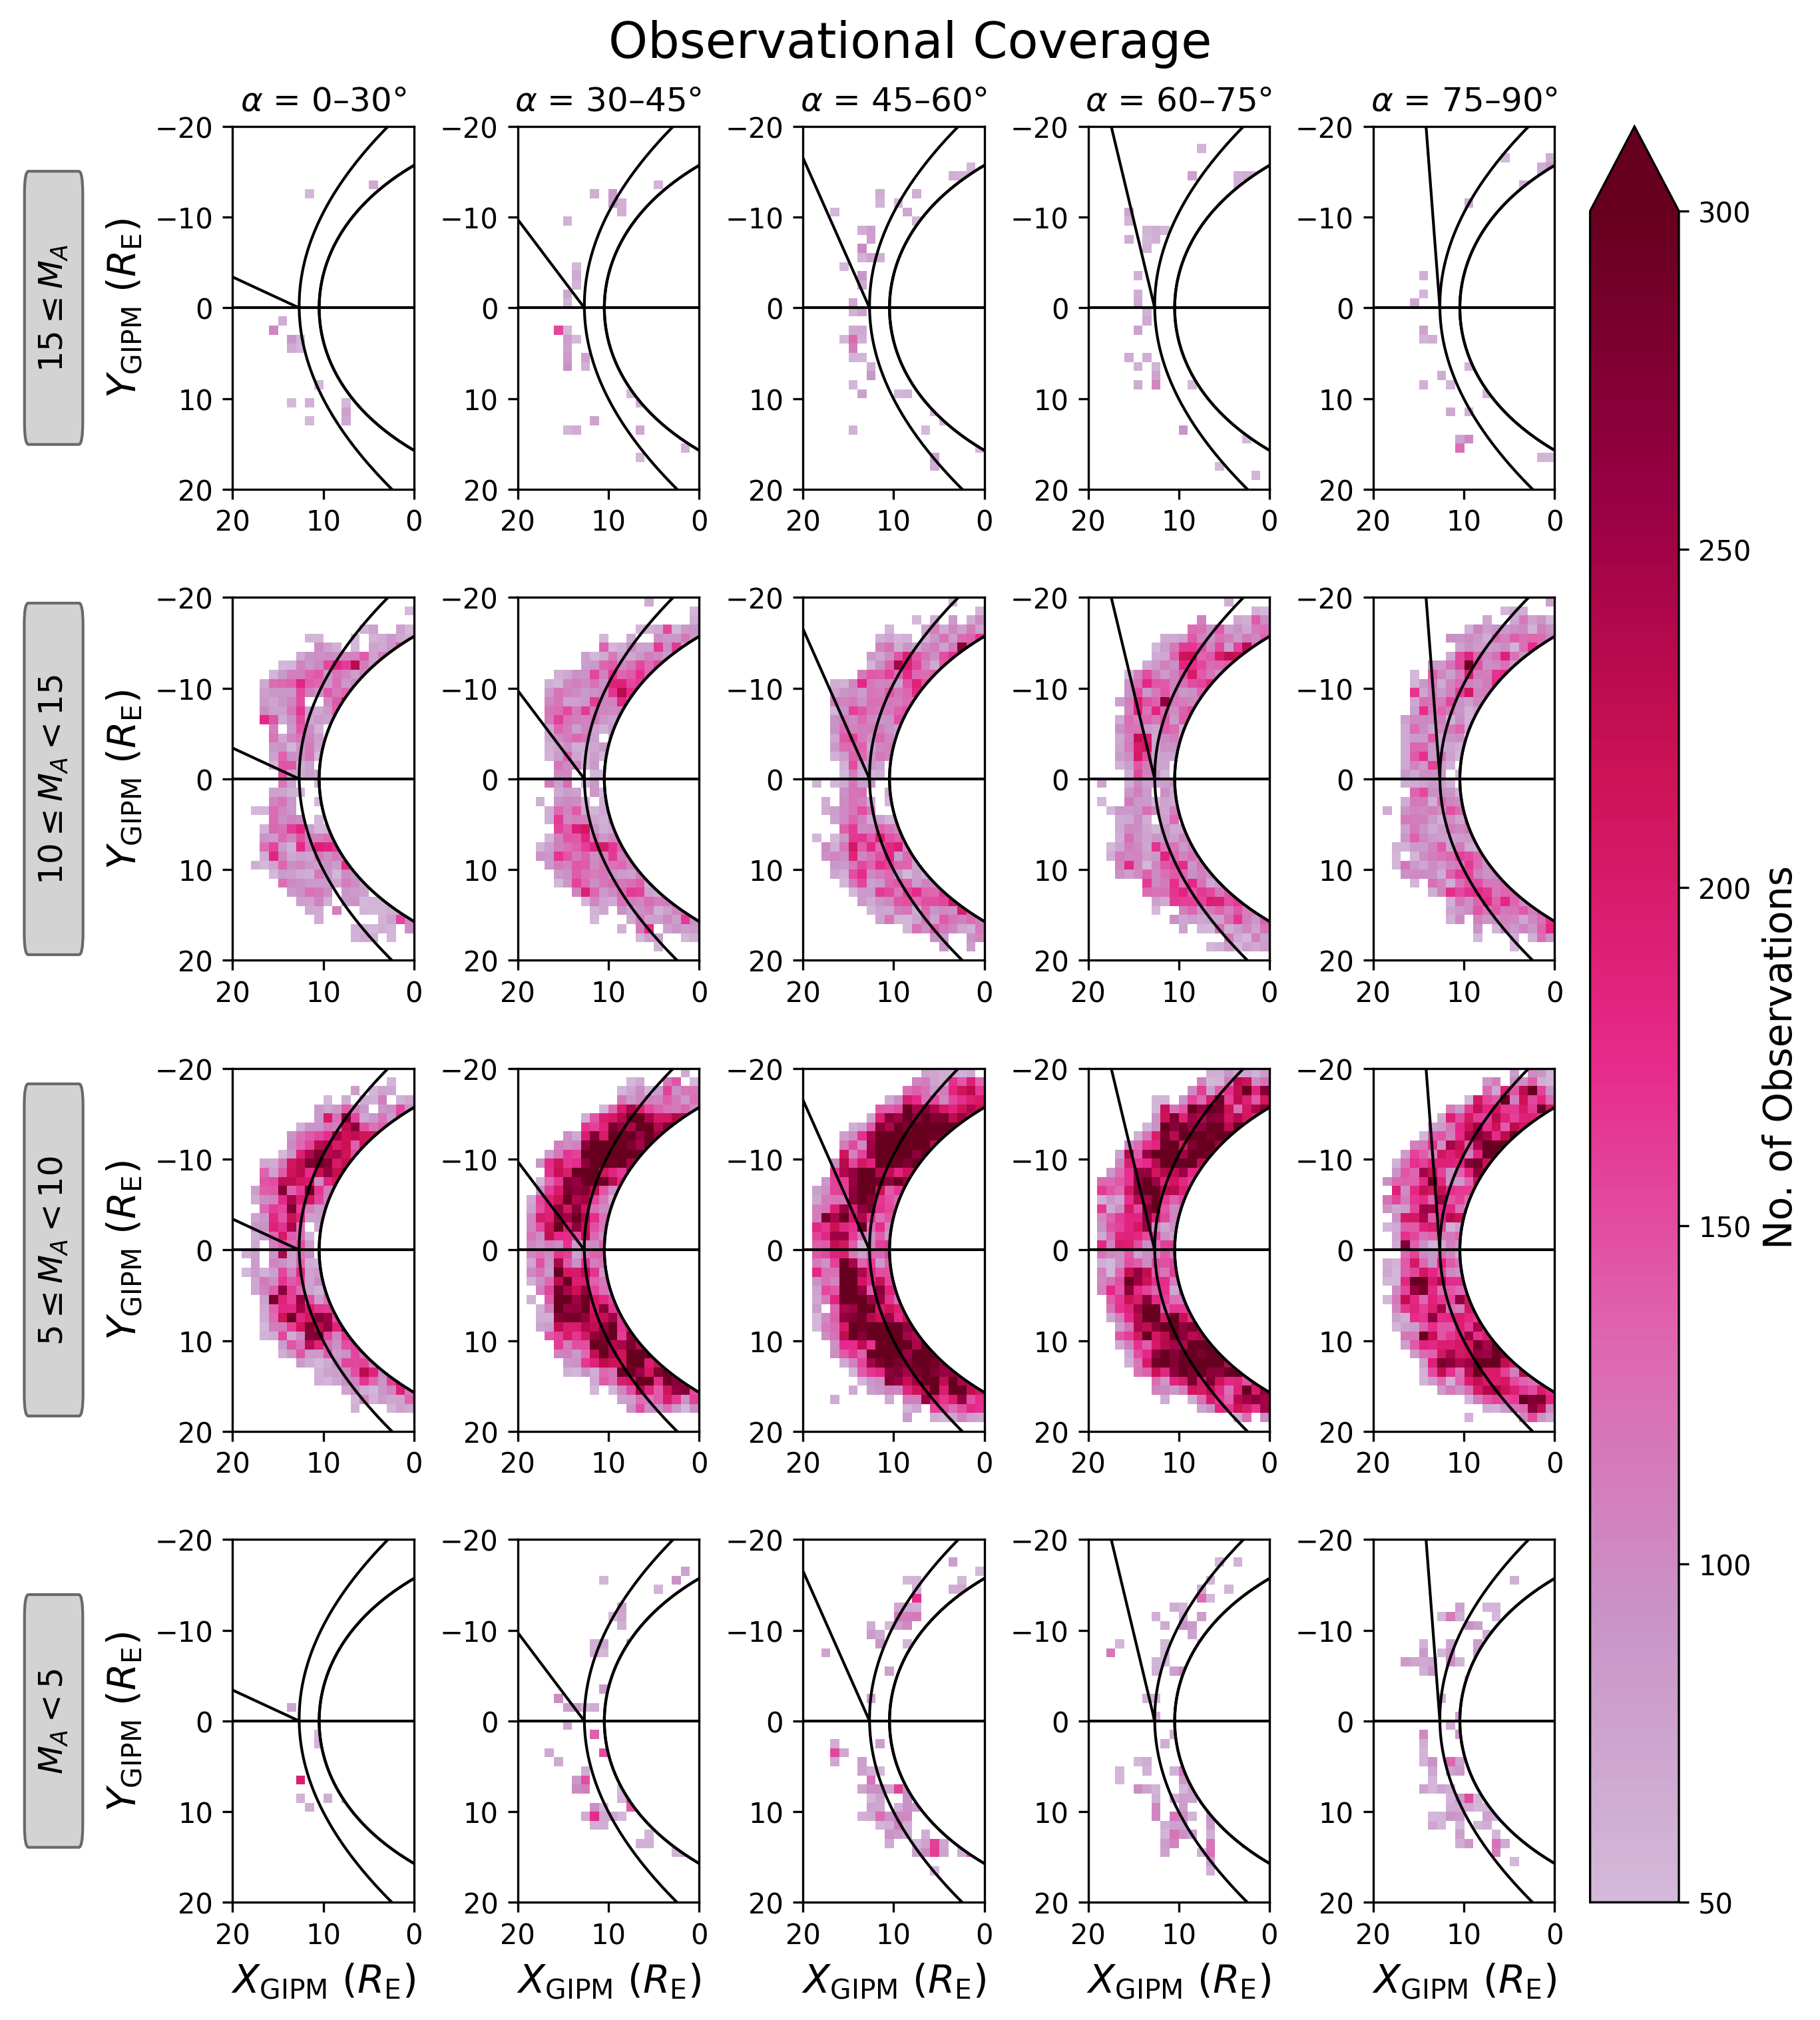

In [27]:
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyBboxPatch
import matplotlib.gridspec as gridspec
from matplotlib.transforms import TransformedBbox

# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 10), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=4, ncols=6,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Observational Coverage", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$15 \leq M_A$',
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'$M_A < 5$'
]

# -------------------------------
# MAKE AXES FOR THE 4×5 PANELS
# -------------------------------
axs = []
for r in range(4):
    plot_row_axes = []
    gs_row = r      
    for c in range(5):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(4):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

PuRd_lowcutoff = matplotlib.colormaps['PuRd']
newcmp = ListedColormap(PuRd_lowcutoff(np.linspace(0.25, 1, 192)))

newcmp.set_under('w')

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(5):                         # angle class
    title = angle_titles[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(4):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = hist_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        draw_hist(ax, hist, extent, newcmp, angle_line)
        mask_inside_magnetopause(ax, X_shue, R_shue)
        
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        set_limits(ax)

        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 3:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)

# -------------------------------
# COLORBAR
# -------------------------------

im = axs[0][0].images[0]
fig.colorbar(im, ax=[ax for row in axs for ax in row],
             location='right', pad=0.02,
             label='No. of Observations', extend='max')

plt.show()


In [ ]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

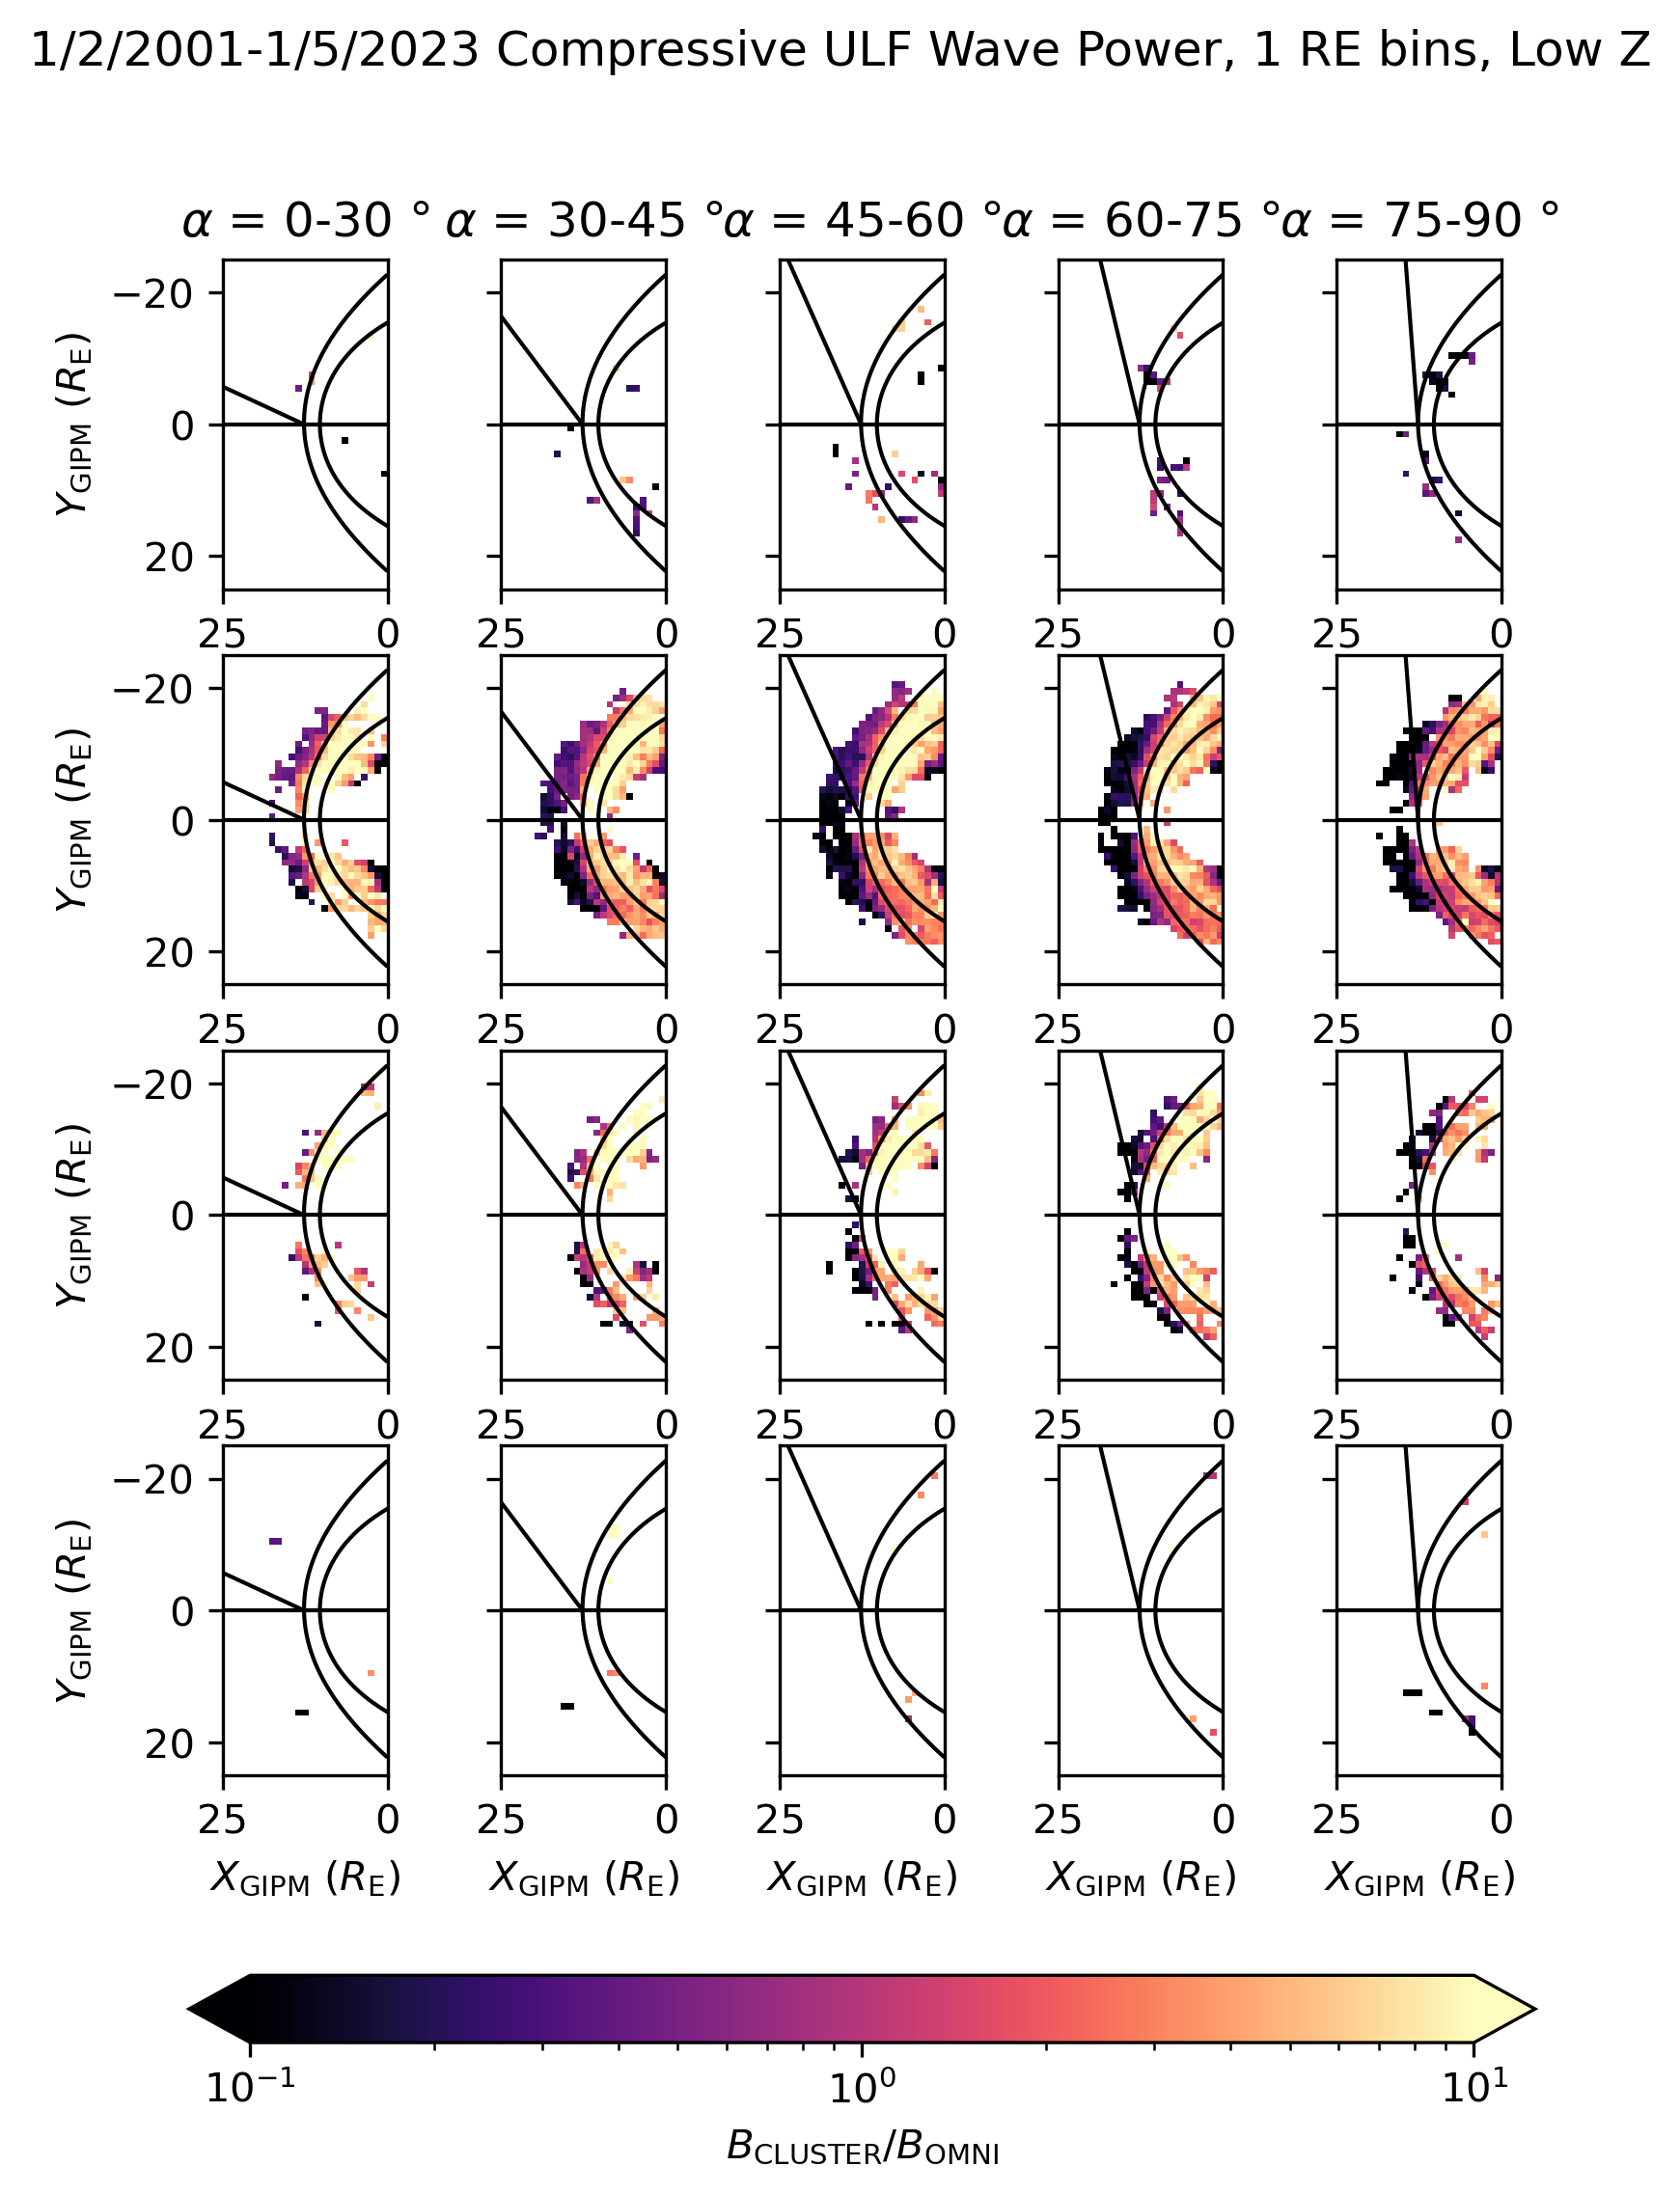

In [32]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='$B_\\mathrm{CLUSTER}$/$B_\\mathrm{OMNI}$')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

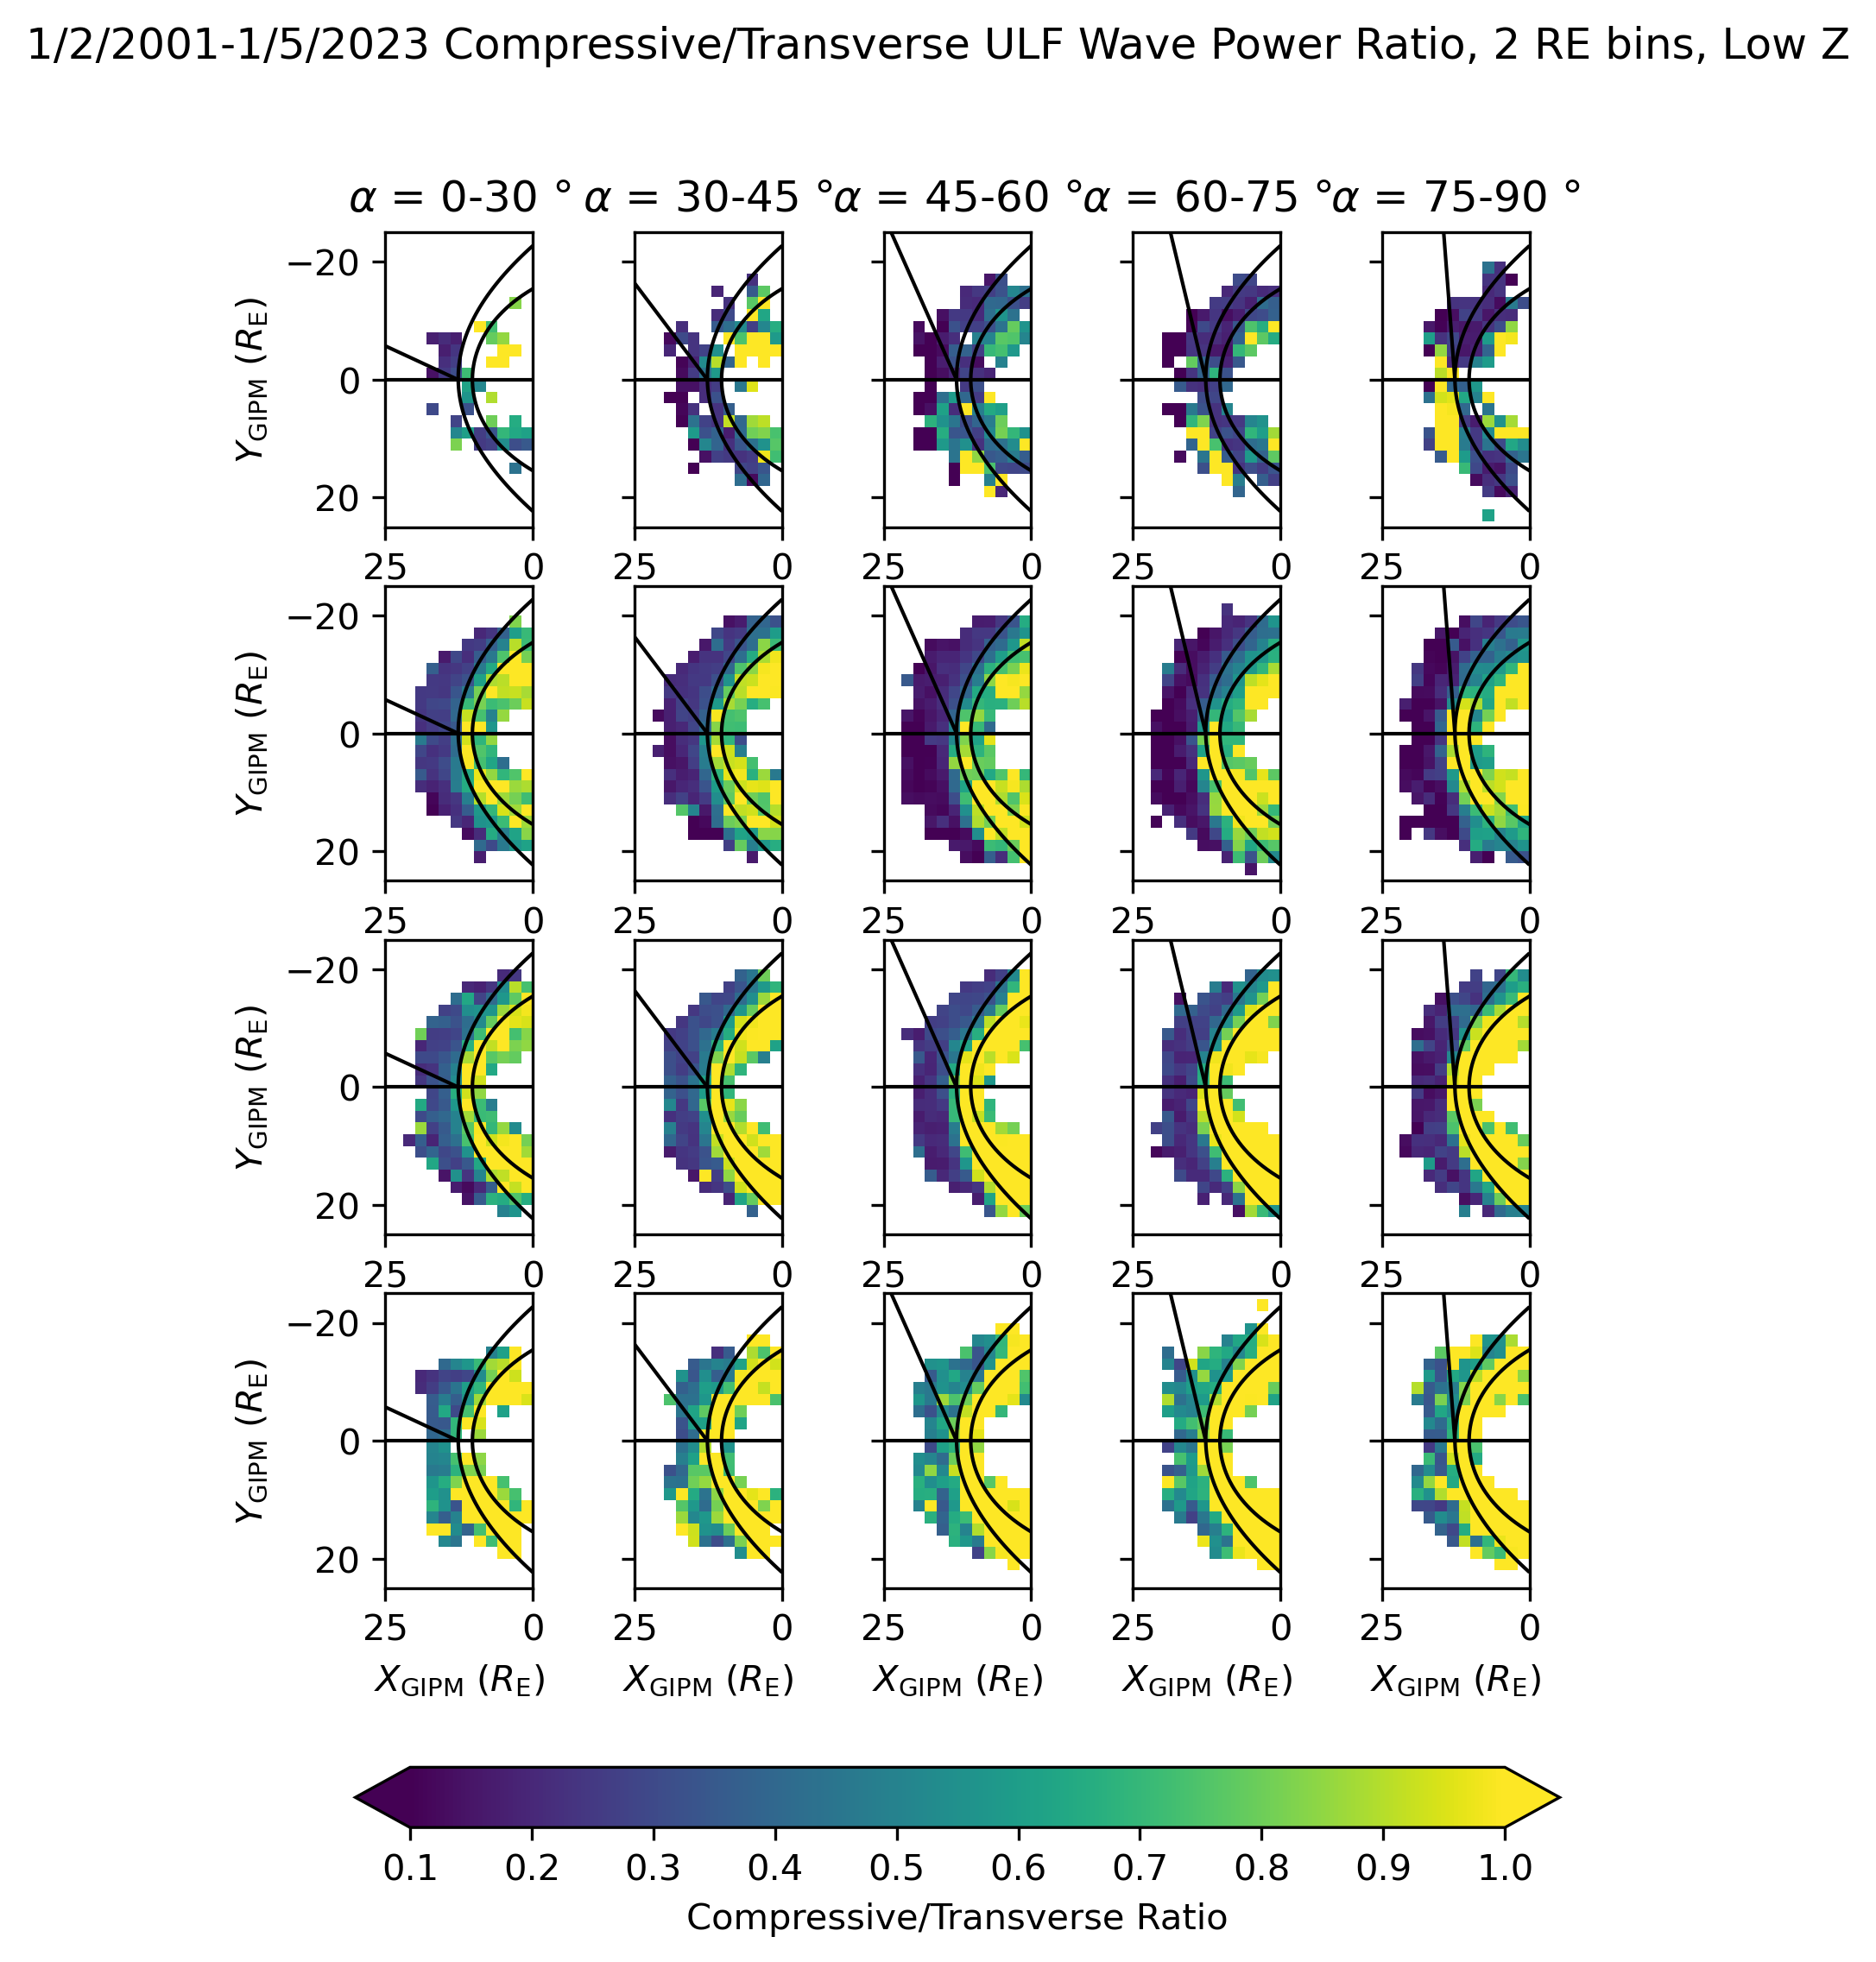

In [41]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive/Transverse ULF Wave Power Ratio, 2 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = plt.Normalize(0.1,1)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 2
x_mesh = np.arange(0, 24, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(24/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(para_perp_rad_less5_2bin)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Compressive/Transverse Ratio')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(para_perp_rad_5_10_2bin)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(para_perp_rad_10_15_2bin)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(para_perp_rad_15more_2bin)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(para_perp_lowspir_less5_2bin)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(para_perp_lowspir_5_10_2bin)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(para_perp_lowspir_10_15_2bin)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(para_perp_lowspir_15more_2bin)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(para_perp_highspir_less5_2bin)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(para_perp_highspir_5_10_2bin)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(para_perp_highspir_10_15_2bin)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(para_perp_highspir_15more_2bin)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(para_perp_lowperp_less5_2bin)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(para_perp_lowperp_5_10_2bin)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(para_perp_lowperp_10_15_2bin)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(para_perp_lowperp_15more_2bin)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(para_perp_highperp_less5_2bin)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(para_perp_highperp_5_10_2bin)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(para_perp_highperp_10_15_2bin)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(para_perp_highperp_15more_2bin)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='viridis', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [34]:
##subtract values to see differences

### want 5-10, 10-15 comparison. can also do 15more but that is secondary. Radial.

mean_para_rad_5_10_arr = np.array(mean_para_rad_5_10)
mean_perp_rad_5_10_arr = np.array(mean_perp_rad_5_10)
para_perp_rad_5_10_arr = np.array(para_perp_rad_5_10)

mean_para_rad_10_15_arr = np.array(mean_para_rad_10_15)
mean_perp_rad_10_15_arr = np.array(mean_perp_rad_10_15)
para_perp_rad_10_15_arr = np.array(para_perp_rad_10_15)

para_diff_rad_5_10_15 = mean_para_rad_10_15_arr - mean_para_rad_5_10_arr
perp_diff_rad_5_10_15 = mean_perp_rad_10_15_arr - mean_perp_rad_5_10_arr
ratio_diff_rad_5_10_15 = para_perp_rad_10_15_arr - para_perp_rad_5_10_arr

para_ratio_rad_5_10_15 = mean_para_rad_10_15_arr/mean_para_rad_5_10_arr
perp_ratio_rad_5_10_15 = mean_perp_rad_10_15_arr/mean_perp_rad_5_10_arr
ratio_ratio_rad_5_10_15 = para_perp_rad_10_15_arr/para_perp_rad_5_10_arr

#########LOWSPIRAL######

mean_para_lowspir_5_10_arr = np.array(mean_para_lowspir_5_10)
mean_perp_lowspir_5_10_arr = np.array(mean_perp_lowspir_5_10)
para_perp_lowspir_5_10_arr = np.array(para_perp_lowspir_5_10)

mean_para_lowspir_10_15_arr = np.array(mean_para_lowspir_10_15)
mean_perp_lowspir_10_15_arr = np.array(mean_perp_lowspir_10_15)
para_perp_lowspir_10_15_arr = np.array(para_perp_lowspir_10_15)


para_diff_lowspir_5_10_15 = mean_para_lowspir_10_15_arr - mean_para_lowspir_5_10_arr
perp_diff_lowspir_5_10_15 = mean_perp_lowspir_10_15_arr - mean_perp_lowspir_5_10_arr
ratio_diff_lowspir_5_10_15 = para_perp_lowspir_10_15_arr - para_perp_lowspir_5_10_arr

para_ratio_lowspir_5_10_15 = mean_para_lowspir_10_15_arr/mean_para_lowspir_5_10_arr
perp_ratio_lowspir_5_10_15 = mean_perp_lowspir_10_15_arr/mean_perp_lowspir_5_10_arr
ratio_ratio_lowspir_5_10_15 = para_perp_lowspir_10_15_arr/para_perp_lowspir_5_10_arr

#########HIGHSPIRAL######

mean_para_highspir_5_10_arr = np.array(mean_para_highspir_5_10)
mean_perp_highspir_5_10_arr = np.array(mean_perp_highspir_5_10)
para_perp_highspir_5_10_arr = np.array(para_perp_highspir_5_10)

mean_para_highspir_10_15_arr = np.array(mean_para_highspir_10_15)
mean_perp_highspir_10_15_arr = np.array(mean_perp_highspir_10_15)
para_perp_highspir_10_15_arr = np.array(para_perp_highspir_10_15)

para_diff_highspir_5_10_15 = mean_para_highspir_10_15_arr - mean_para_highspir_5_10_arr
perp_diff_highspir_5_10_15 = mean_perp_highspir_10_15_arr - mean_perp_highspir_5_10_arr
ratio_diff_highspir_5_10_15 = para_perp_highspir_10_15_arr - para_perp_highspir_5_10_arr

para_ratio_highspir_5_10_15 = mean_para_highspir_10_15_arr/mean_para_highspir_5_10_arr
perp_ratio_highspir_5_10_15 = mean_perp_highspir_10_15_arr/mean_perp_highspir_5_10_arr
ratio_ratio_highspir_5_10_15 = para_perp_highspir_10_15_arr/para_perp_highspir_5_10_arr

#########LOWPERP######

mean_para_lowperp_5_10_arr = np.array(mean_para_lowperp_5_10)
mean_perp_lowperp_5_10_arr = np.array(mean_perp_lowperp_5_10)
para_perp_lowperp_5_10_arr = np.array(para_perp_lowperp_5_10)

mean_para_lowperp_10_15_arr = np.array(mean_para_lowperp_10_15)
mean_perp_lowperp_10_15_arr = np.array(mean_perp_lowperp_10_15)
para_perp_lowperp_10_15_arr = np.array(para_perp_lowperp_10_15)

para_diff_lowperp_5_10_15 = mean_para_lowperp_10_15_arr - mean_para_lowperp_5_10_arr
perp_diff_lowperp_5_10_15 = mean_perp_lowperp_10_15_arr - mean_perp_lowperp_5_10_arr
ratio_diff_lowperp_5_10_15 = para_perp_lowperp_10_15_arr - para_perp_lowperp_5_10_arr

para_ratio_lowperp_5_10_15 = mean_para_lowperp_10_15_arr/mean_para_lowperp_5_10_arr
perp_ratio_lowperp_5_10_15 = mean_perp_lowperp_10_15_arr/mean_perp_lowperp_5_10_arr
ratio_ratio_lowperp_5_10_15 = para_perp_lowperp_10_15_arr/para_perp_lowperp_5_10_arr

#########HIGHPERP######

mean_para_highperp_5_10_arr = np.array(mean_para_highperp_5_10)
mean_perp_highperp_5_10_arr = np.array(mean_perp_highperp_5_10)
para_perp_highperp_5_10_arr = np.array(para_perp_highperp_5_10)

mean_para_highperp_10_15_arr = np.array(mean_para_highperp_10_15)
mean_perp_highperp_10_15_arr = np.array(mean_perp_highperp_10_15)
para_perp_highperp_10_15_arr = np.array(para_perp_highperp_10_15)

para_diff_highperp_5_10_15 = mean_para_highperp_10_15_arr - mean_para_highperp_5_10_arr
perp_diff_highperp_5_10_15 = mean_perp_highperp_10_15_arr - mean_perp_highperp_5_10_arr
ratio_diff_highperp_5_10_15 = para_perp_highperp_10_15_arr - para_perp_highperp_5_10_arr

para_ratio_highperp_5_10_15 = mean_para_highperp_10_15_arr/mean_para_highperp_5_10_arr
perp_ratio_highperp_5_10_15 = mean_perp_highperp_10_15_arr/mean_perp_highperp_5_10_arr
ratio_ratio_highperp_5_10_15 = para_perp_highperp_10_15_arr/para_perp_highperp_5_10_arr


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

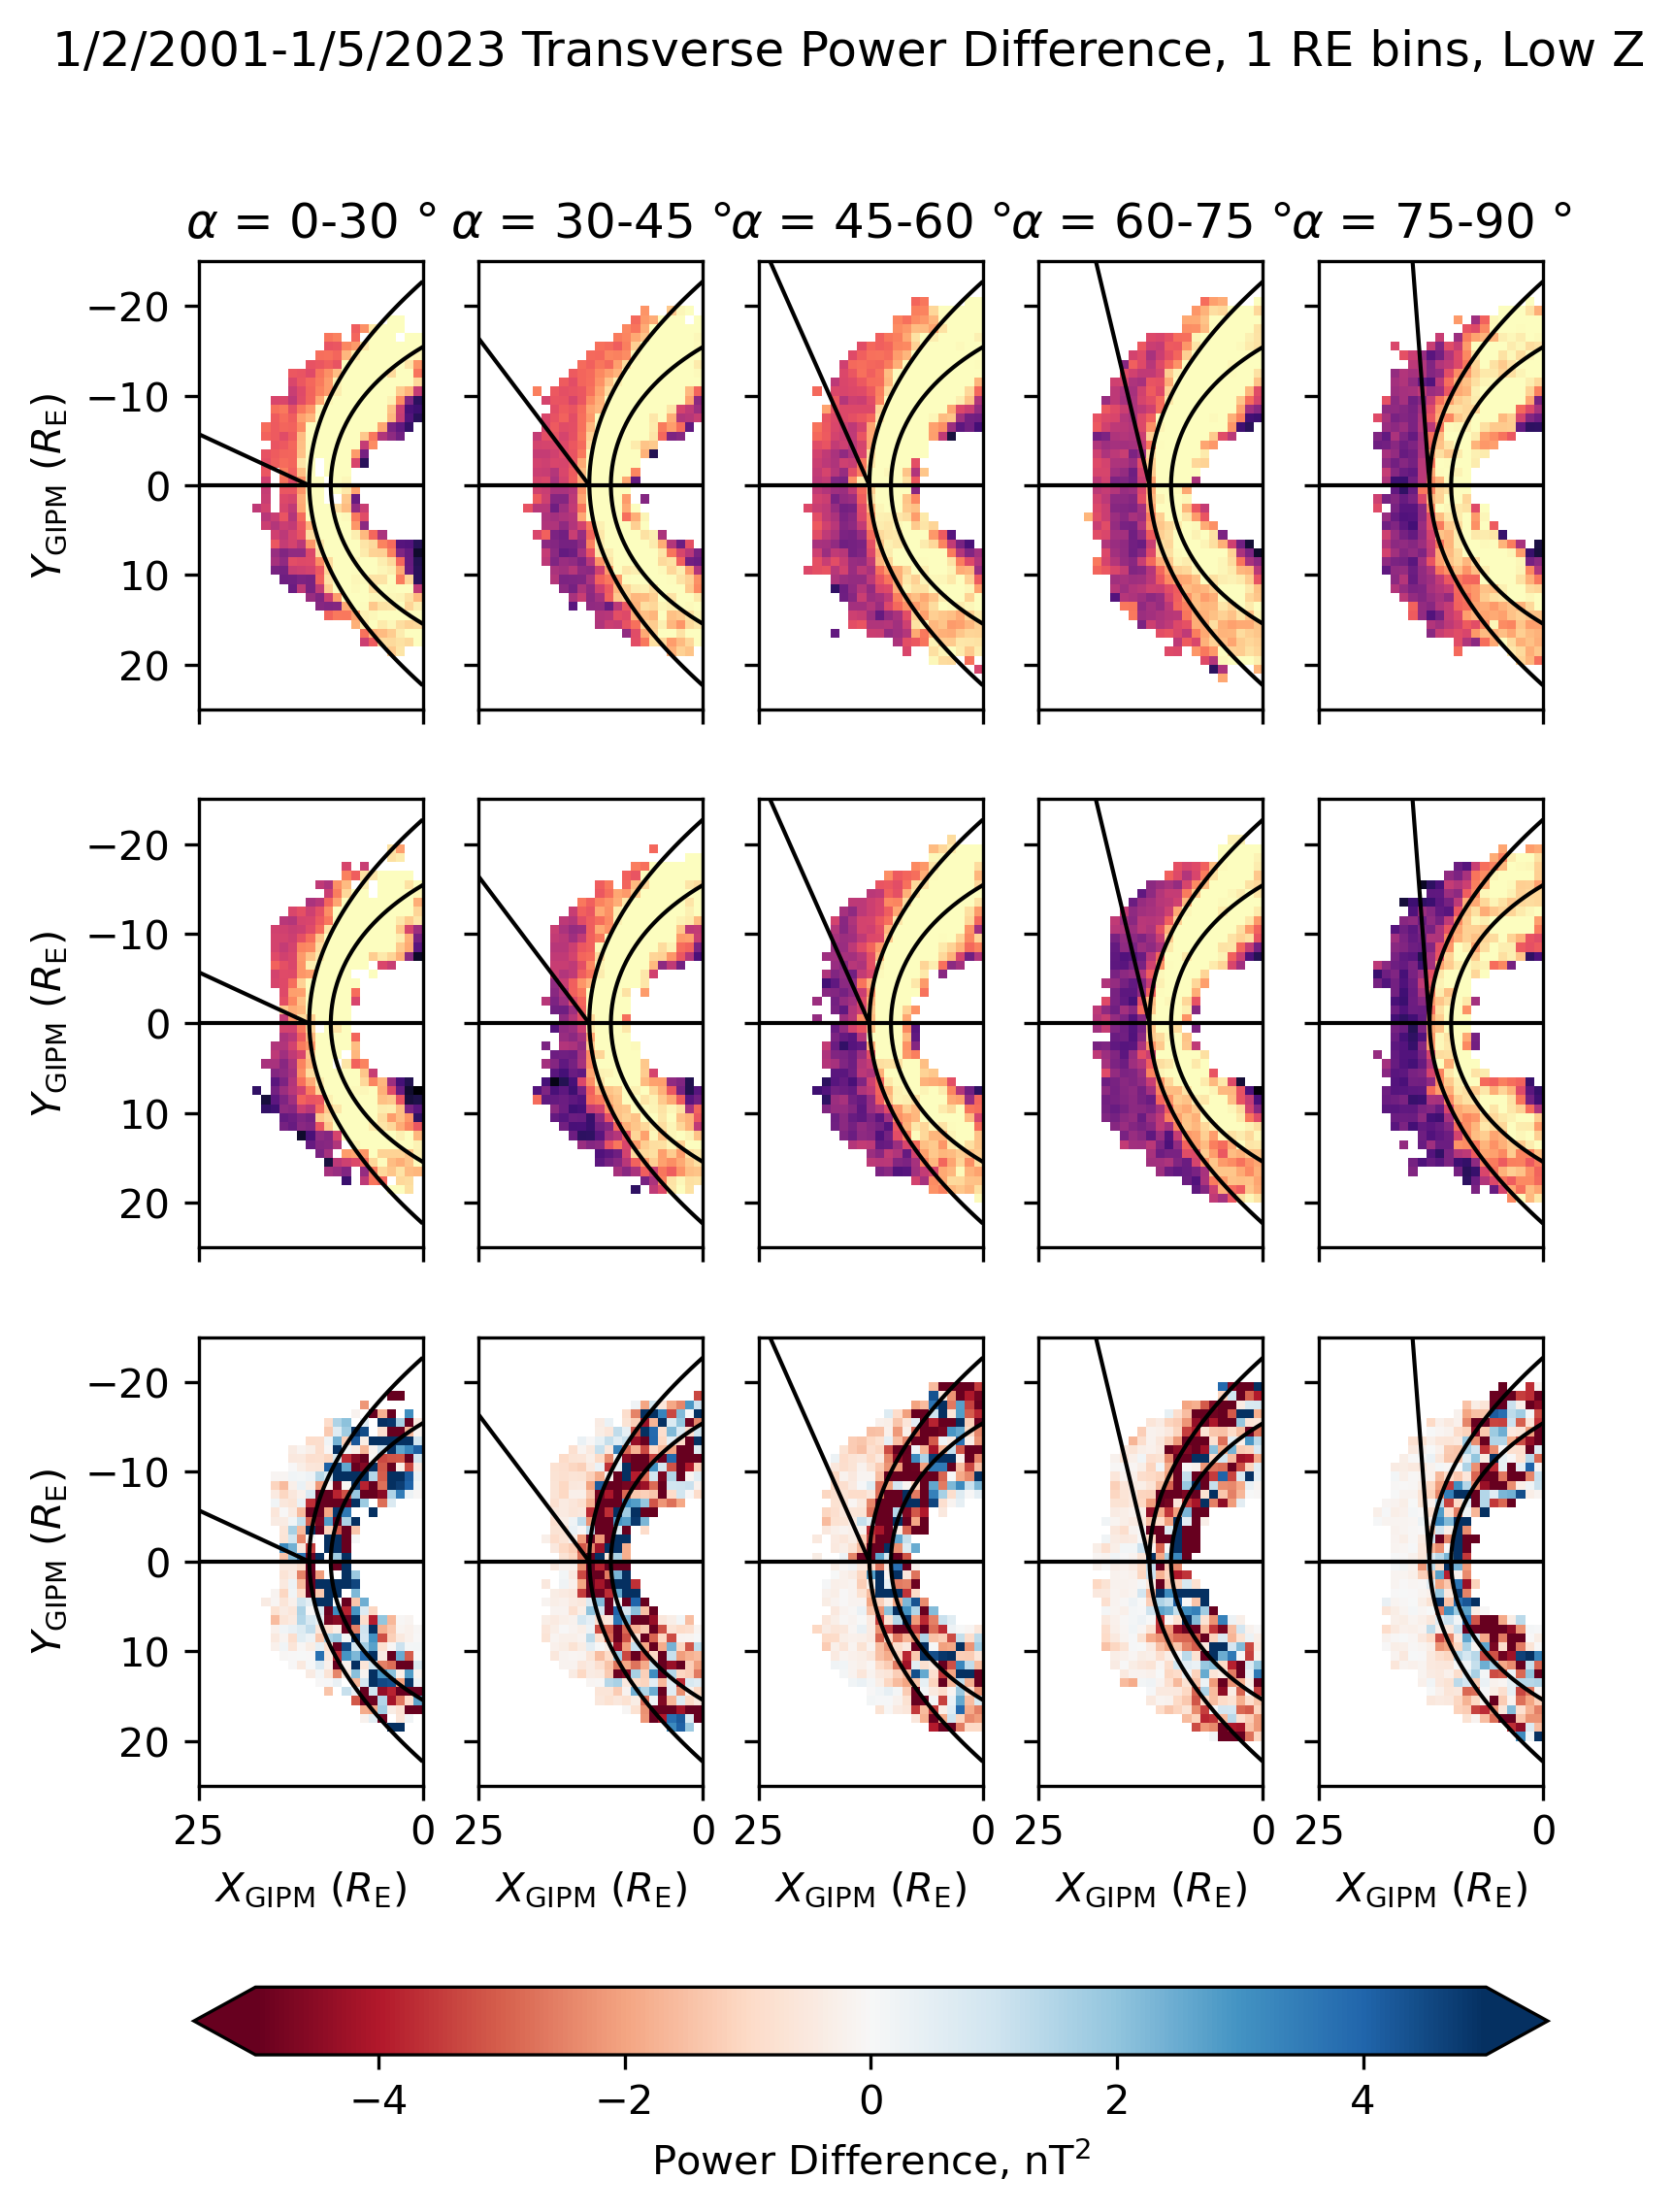

In [47]:
#plot w/ two rows of 5-10 and 10-15 and then the difference or ratio
#now make the big plot with all the transverse components first

    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
    y_1 = 0 #y coordinates (Re)
    z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

    [Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
    Xn_1 = Xgipm_1
    Yn_1 = Ygipm_1
    Zn_1 = Zgipm_1
    f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 1.76

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))

    ###################
    fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
    subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Difference, 1 RE bins, Low Z')

    #cmap norm

    norm = plt.Normalize(-5,5)
    norm_plasma = colors.LogNorm(0.1, 10)

    #cmap mesh

    bin_size = 1
    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)

    #ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 30

    tan_angle_0 = np.tan(np.deg2rad(15))
    y_e_0 = -x_e*(tan_angle_0)

    ax1 = axsLeft[0,0]

    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    col_array_1 = np.array(mean_perp_rad_5_10)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.set_aspect('equal')
    #ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax1.set_ylim(neg_y_limit,y_limit)
    ax1.set_xlim(0,x_limit)
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
    cbar_title = r'Power Difference, $\mathrm{nT}^2$'
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


    ax2 = axsLeft[1,0]

    col_array_2 = np.array(mean_perp_rad_10_15)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    #ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax2.set_ylim(neg_y_limit,y_limit)
    ax2.set_xlim(0,x_limit)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    ax3 = axsLeft[2,0]

    ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax3.plot(X_shue, R_shue, linewidth=1, color='k')

    col_array_3 = perp_diff_rad_5_10_15
    color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_3 = np.rot90(color_grid_3)
    color_grid_3 = np.flipud(color_grid_3)

    ax3.set_aspect('equal')
    #ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax3.set_ylim(neg_y_limit,y_limit)
    ax3.set_xlim(0,x_limit)
    ax3.invert_xaxis()
    ax3.invert_yaxis()
    ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ###########LOW SPIRAL############################

    tan_angle_lowspir = np.tan(np.deg2rad(37.5))
    y_e_lowspir = -x_e*(tan_angle_lowspir)

    ax5 = axsLeft[0,1]

    ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax5.plot(X_shue, R_shue, linewidth=1, color='k')
    ax5.set_aspect('equal')
    #a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_5 = np.array(mean_perp_lowspir_5_10)
    color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_5 = np.rot90(color_grid_5)
    color_grid_5 = np.flipud(color_grid_5)

    ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax5.set_ylim(neg_y_limit,y_limit)
    ax5.set_xlim(0,x_limit)
    ax5.invert_xaxis()
    ax5.invert_yaxis()
    ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

    ax6 = axsLeft[1,1]

    ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax6.plot(X_shue, R_shue, linewidth=1, color='k')
    ax6.set_aspect('equal')
    #ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_6 = np.array(mean_perp_lowspir_10_15)
    color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_6 = np.rot90(color_grid_6)
    color_grid_6 = np.flipud(color_grid_6)

    ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax6.set_ylim(neg_y_limit,y_limit)
    ax6.set_xlim(0,x_limit)
    ax6.invert_xaxis()
    ax6.invert_yaxis()

    ax7 = axsLeft[2,1]

    ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax7.plot(X_shue, R_shue, linewidth=1, color='k')
    ax7.set_aspect('equal')
    #ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_7 = perp_diff_lowspir_5_10_15
    color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_7 = np.rot90(color_grid_7)
    color_grid_7 = np.flipud(color_grid_7)

    ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax7.set_ylim(neg_y_limit,y_limit)
    ax7.set_xlim(0,x_limit)
    ax7.invert_xaxis()
    ax7.invert_yaxis()
    ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ###########HIGH SPIRAL############################

    tan_angle_highspir = np.tan(np.deg2rad(52.5))
    y_e_highspir = -x_e*(tan_angle_highspir)

    #ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ax9 = axsLeft[0,2]

    ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax9.plot(X_shue, R_shue, linewidth=1, color='k')
    ax9.set_aspect('equal')
    #ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_9 = np.array(mean_perp_highspir_5_10)
    color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_9 = np.rot90(color_grid_9)
    color_grid_9 = np.flipud(color_grid_9)

    ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax9.set_ylim(neg_y_limit,y_limit)
    ax9.set_xlim(0,x_limit)
    ax9.invert_xaxis()
    ax9.invert_yaxis()
    ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

    ax10 = axsLeft[1,2]

    ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax10.plot(X_shue, R_shue, linewidth=1, color='k')
    ax10.set_aspect('equal')
    #ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_10 = np.array(mean_perp_highspir_10_15)
    color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_10 = np.rot90(color_grid_10)
    color_grid_10 = np.flipud(color_grid_10)

    ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax10.set_ylim(neg_y_limit,y_limit)
    ax10.set_xlim(0,x_limit)
    ax10.invert_xaxis()
    ax10.invert_yaxis()

    ax11 = axsLeft[2,2]

    ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax11.plot(X_shue, R_shue, linewidth=1, color='k')
    ax11.set_aspect('equal')
    #ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_11 = perp_diff_highspir_5_10_15
    color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_11 = np.rot90(color_grid_11)
    color_grid_11 = np.flipud(color_grid_11)

    ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax11.set_ylim(neg_y_limit,y_limit)
    ax11.set_xlim(0,x_limit)
    ax11.invert_xaxis()
    ax11.invert_yaxis()
    ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


    ######LOW PERPENDICULAR

    tan_angle_lowperp = np.tan(np.deg2rad(67.5))
    y_e_lowperp = -x_e*(tan_angle_lowperp)

    ax13 = axsLeft[0,3]

    ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax13.plot(X_shue, R_shue, linewidth=1, color='k')
    ax13.set_aspect('equal')
    ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
    #ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    col_array_13 = np.array(mean_perp_lowperp_5_10)
    color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_13 = np.rot90(color_grid_13)
    color_grid_13 = np.flipud(color_grid_13)

    ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax13.set_ylim(neg_y_limit,y_limit)
    ax13.set_xlim(0,x_limit)
    ax13.invert_xaxis()
    ax13.invert_yaxis()

    ax14 = axsLeft[1,3]

    ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax14.plot(X_shue, R_shue, linewidth=1, color='k')
    ax14.set_aspect('equal')
    #ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    col_array_14 = np.array(mean_perp_lowperp_10_15)
    color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_14 = np.rot90(color_grid_14)
    color_grid_14 = np.flipud(color_grid_14)

    ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax14.set_ylim(neg_y_limit,y_limit)
    ax14.set_xlim(0,x_limit)
    ax14.invert_xaxis()
    ax14.invert_yaxis()

    ax15 = axsLeft[2,3]

    ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax15.plot(X_shue, R_shue, linewidth=1, color='k')
    ax15.set_aspect('equal')
    #ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_15 = perp_diff_lowperp_5_10_15
    color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_15 = np.rot90(color_grid_15)
    color_grid_15 = np.flipud(color_grid_15)

    ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax15.set_ylim(-25,25)
    ax15.set_xlim(0,25)
    ax15.invert_xaxis()
    ax15.invert_yaxis()

    ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ######HIGH PERPENDICULAR

    tan_angle_highperp = np.tan(np.deg2rad(82.5))
    y_e_highperp = -x_e*(tan_angle_highperp)


    ax17 = axsLeft[0,4]

    ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax17.plot(X_shue, R_shue, linewidth=1, color='k')
    ax17.set_aspect('equal')

    col_array_17 = np.array(mean_perp_highperp_5_10)
    color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_17 = np.rot90(color_grid_17)
    color_grid_17 = np.flipud(color_grid_17)

    ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax17.set_ylim(-25,25)
    ax17.set_xlim(0,25)
    ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
    ax17.invert_xaxis()
    ax17.invert_yaxis()


    ax18 = axsLeft[1,4]

    ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax18.plot(X_shue, R_shue, linewidth=1, color='k')
    ax18.set_aspect('equal')

    col_array_18 = np.array(mean_perp_highperp_10_15)
    color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_18 = np.rot90(color_grid_18)
    color_grid_18 = np.flipud(color_grid_18)

    ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax18.set_ylim(-25,25)
    ax18.set_xlim(0,25)
    ax18.invert_xaxis()
    ax18.invert_yaxis()

    ax19 = axsLeft[2,4]

    ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax19.plot(X_shue, R_shue, linewidth=1, color='k')
    ax19.set_aspect('equal')

    col_array_19 = perp_diff_highperp_5_10_15
    color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_19 = np.rot90(color_grid_19)
    color_grid_19 = np.flipud(color_grid_19)

    ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax19.set_ylim(-25,25)
    ax19.set_xlim(0,25)
    ax19.invert_xaxis()
    ax19.invert_yaxis()

    ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

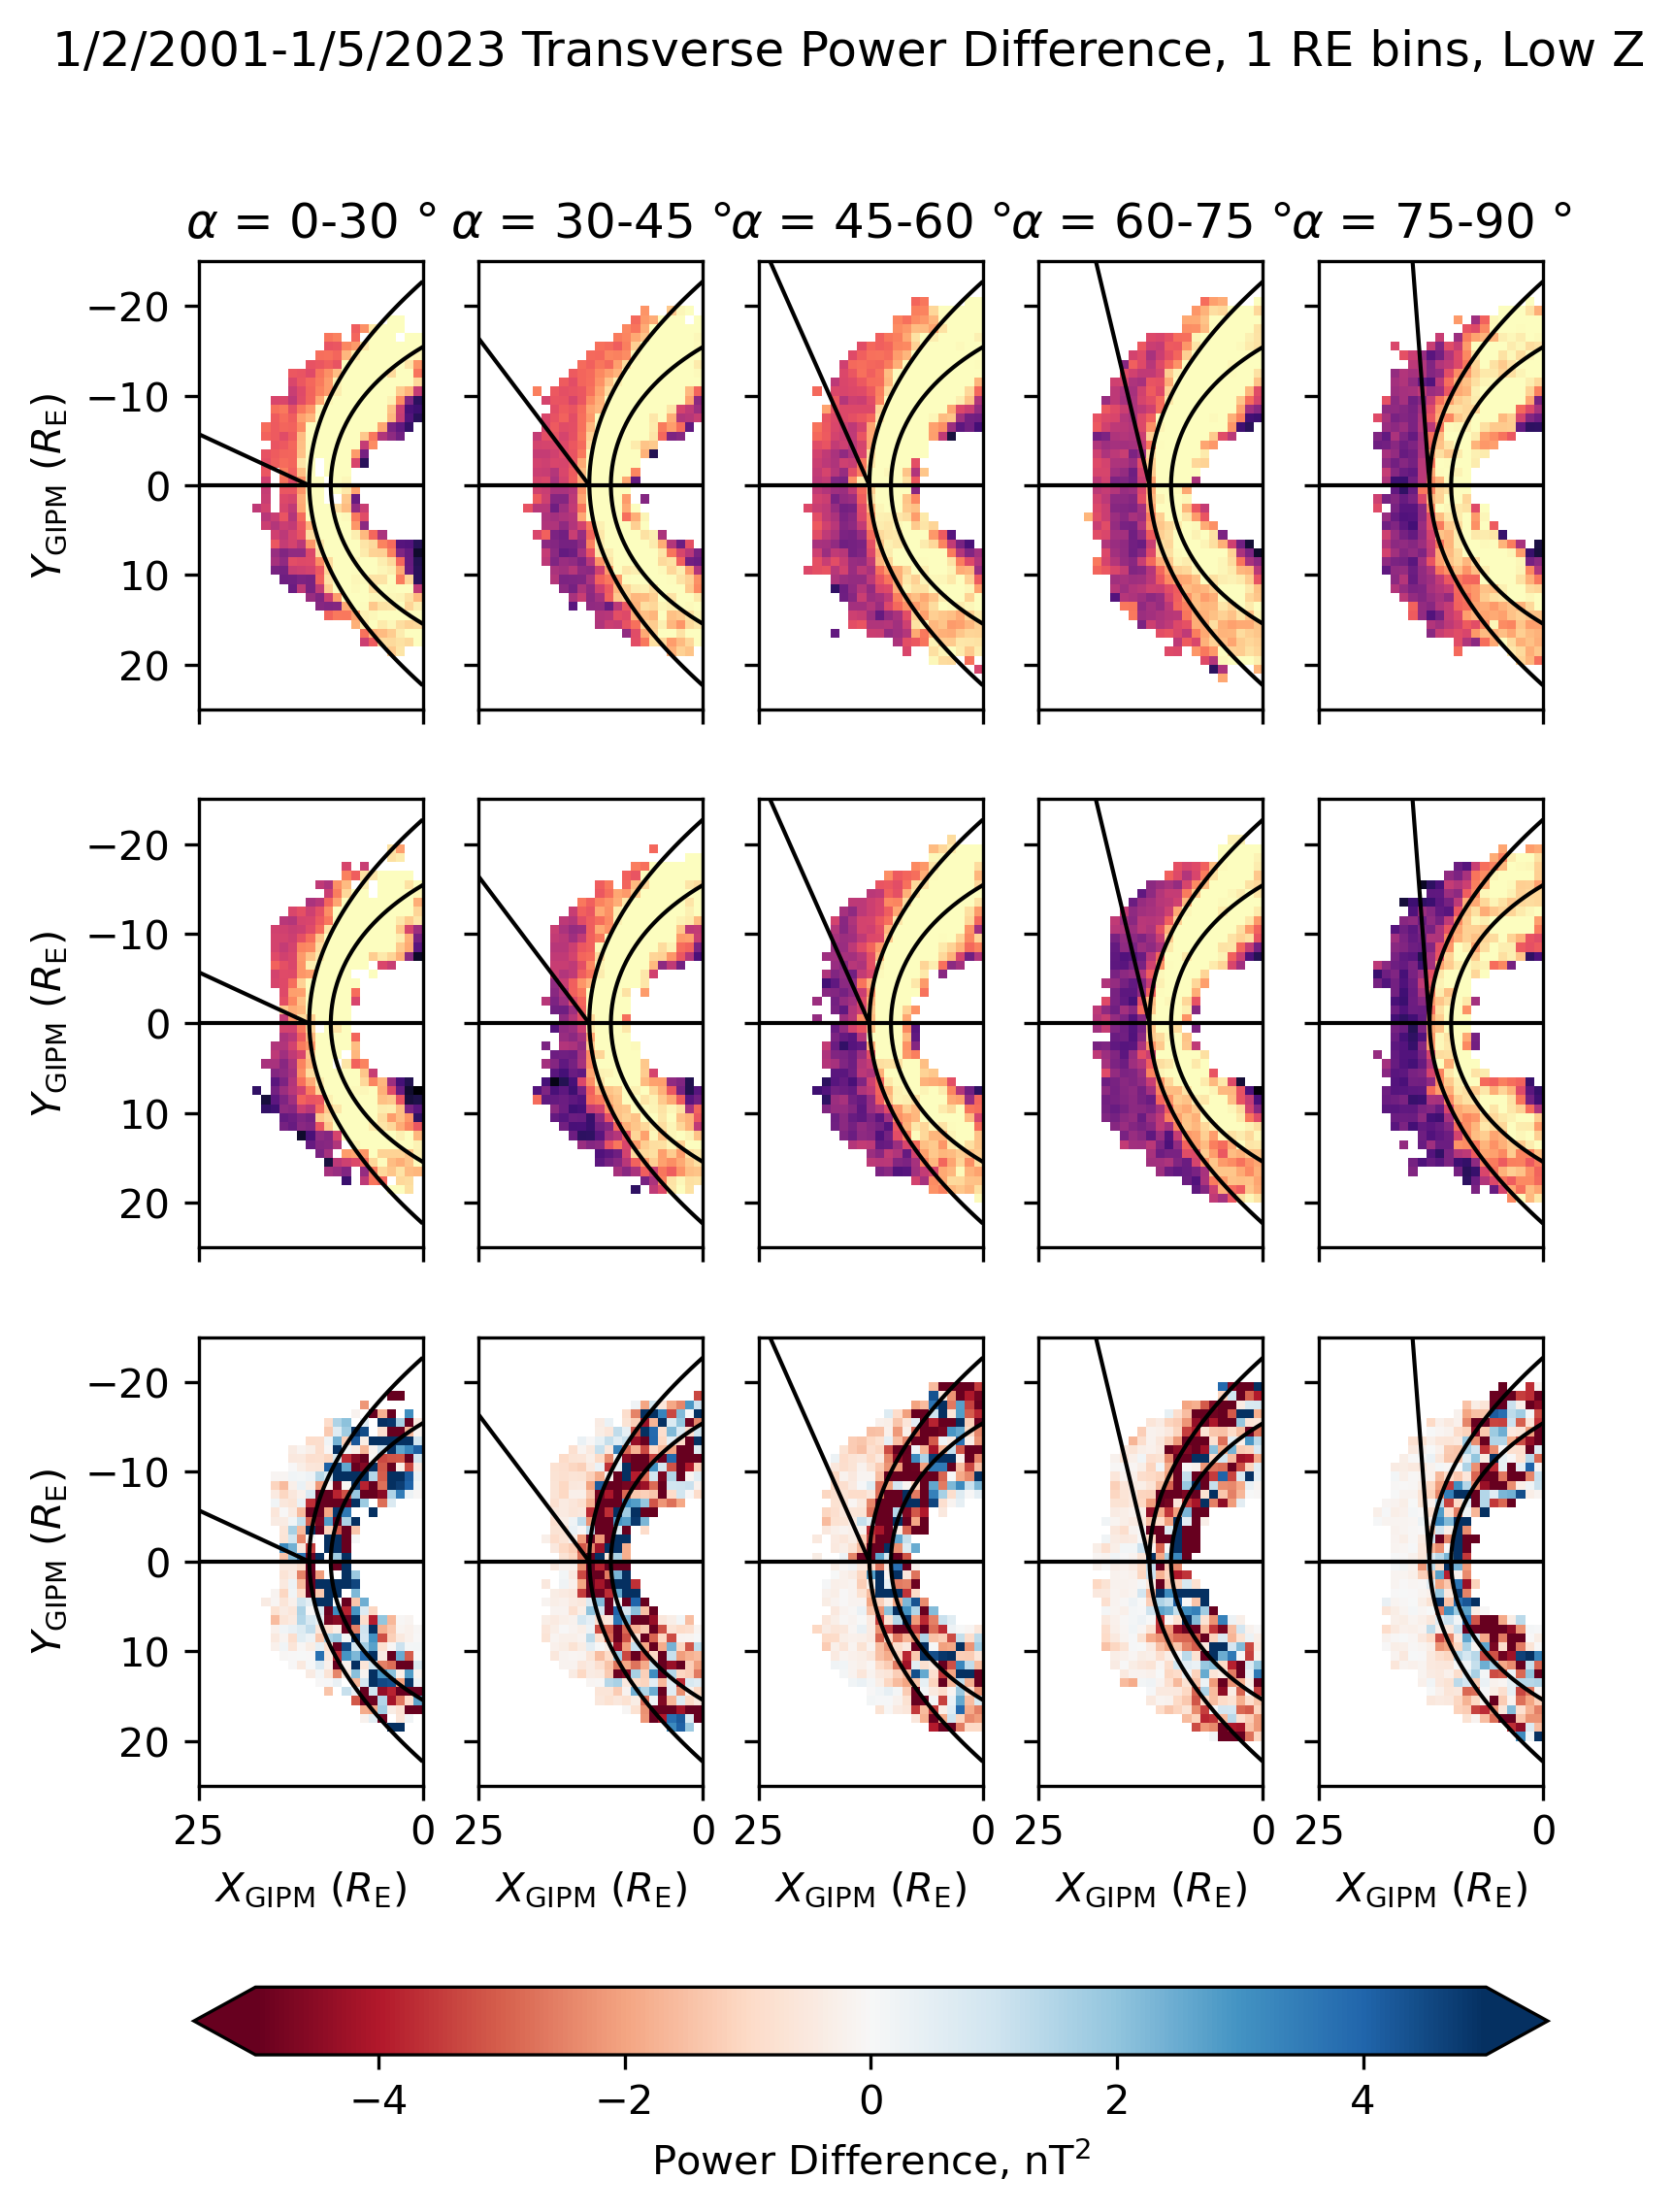

In [47]:
#plot w/ two rows of 5-10 and 10-15 and then the difference or ratio
#now make the big plot with all the transverse components first


def power_comp_plot(power_type, diff_type, x_limit, y_limit)

    if power_type=='Compressive':
        first_row = []
        second_row = []
    if power_type=='Transverse':
        first_row = []
        second_row = []
    if power_type=='Ratio':
        first_row = []
        second_row = []
        
    if diff_type == 'Difference':
        third_row = []
        norm = plt.Normalize(-5,5)
    if diff_type == 'Ratio':
        third_row = []
        norm = colors.LogNorm(0.1, 10)

    x = np.linspace(0, 20, 100) #x coordinates (Re)
    y = np.linspace(-30, 30, 100) #y coordinates (Re)
    z = 0 #z coordinates in Re

    [Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

    fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

    Xn = Xgipm
    Yn = Ygipm
    Zn = Zgipm
    f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

    x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
    y_1 = 0 #y coordinates (Re)
    z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

    [Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
    Xn_1 = Xgipm_1
    Yn_1 = Ygipm_1
    Zn_1 = Zgipm_1
    f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

    #magnetopause model, D = 2 nPa

    m_1 = 10.22
    m_2 = 1.29
    m_3 = 0.184
    m_4 = 8.14
    m_5 = 6.6
    m_6 = 0.58
    m_7 = -0.007
    m_8 = 0.024

    #use B_z =0
    B_z = 0
    D_p = 1.76

    alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

    tanh_angle = m_3*(B_z+m_4)
    r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

    pi = np.pi

    theta = np.arange(-pi/2, pi/2, 0.01)

    r_mod = (2/(1+np.cos(theta)))**alpha
    r = r_0*r_mod

    X_shue = r*(np.cos(theta))
    R_shue = r*(np.sin(theta))

    ###################
    fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
    subfigs = fig.subfigures(1, 1)
    axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
    subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Difference, 1 RE bins, Low Z')
    position_list = [[0,0],[1,0],[2,0],[0,1],[1,1],[2,1],[0,2],[1,2],[2,2],[0,3],[1,3],[2,3],[0,4],[1,4],[2,4]]
    
    #cmap norm

    norm_plasma = colors.LogNorm(0.1, 10)

    #cmap mesh

    bin_size = 1
    x_mesh = np.arange(0, 25, bin_size) 
    y_mesh = np.arange(-26, 26, bin_size)
    x_bin_ticks = int(25/bin_size)
    y_bin_ticks = int(52/bin_size)

    #ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    #want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
    #without exceeding current bounds of plot
    inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
    X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

    x_s = X_BS_nose
    y_s = 0
    x_e = 30

    tan_angle_0 = np.tan(np.deg2rad(15))
    y_e_0 = -x_e*(tan_angle_0)

    ax1 = axsLeft[0,0]

    ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax1.plot(X_shue, R_shue, linewidth=1, color='k')

    col_array_1 = np.array(mean_perp_rad_5_10)
    color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_1 = np.rot90(color_grid_1)
    color_grid_1 = np.flipud(color_grid_1)

    ax1.set_aspect('equal')
    #ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax1.set_ylim(neg_y_limit,y_limit)
    ax1.set_xlim(0,x_limit)
    ax1.invert_xaxis()
    ax1.invert_yaxis()
    ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
    cbar_title = r'Power Difference, $\mathrm{nT}^2$'
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


    ax2 = axsLeft[1,0]

    col_array_2 = np.array(mean_perp_rad_10_15)
    color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_2 = np.rot90(color_grid_2)
    color_grid_2 = np.flipud(color_grid_2)

    ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax2.plot(X_shue, R_shue, linewidth=1, color='k')

    ax2.set_aspect('equal')
    #ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


    ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax2.set_ylim(neg_y_limit,y_limit)
    ax2.set_xlim(0,x_limit)
    ax2.invert_xaxis()
    ax2.invert_yaxis()

    ax3 = axsLeft[2,0]

    ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax3.plot(X_shue, R_shue, linewidth=1, color='k')

    col_array_3 = perp_diff_rad_5_10_15
    color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_3 = np.rot90(color_grid_3)
    color_grid_3 = np.flipud(color_grid_3)

    ax3.set_aspect('equal')
    #ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
    ax3.set_ylim(neg_y_limit,y_limit)
    ax3.set_xlim(0,x_limit)
    ax3.invert_xaxis()
    ax3.invert_yaxis()
    ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ###########LOW SPIRAL############################

    tan_angle_lowspir = np.tan(np.deg2rad(37.5))
    y_e_lowspir = -x_e*(tan_angle_lowspir)

    ax5 = axsLeft[0,1]

    ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax5.plot(X_shue, R_shue, linewidth=1, color='k')
    ax5.set_aspect('equal')
    #a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_5 = np.array(mean_perp_lowspir_5_10)
    color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_5 = np.rot90(color_grid_5)
    color_grid_5 = np.flipud(color_grid_5)

    ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax5.set_ylim(neg_y_limit,y_limit)
    ax5.set_xlim(0,x_limit)
    ax5.invert_xaxis()
    ax5.invert_yaxis()
    ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

    ax6 = axsLeft[1,1]

    ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax6.plot(X_shue, R_shue, linewidth=1, color='k')
    ax6.set_aspect('equal')
    #ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_6 = np.array(mean_perp_lowspir_10_15)
    color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_6 = np.rot90(color_grid_6)
    color_grid_6 = np.flipud(color_grid_6)

    ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax6.set_ylim(neg_y_limit,y_limit)
    ax6.set_xlim(0,x_limit)
    ax6.invert_xaxis()
    ax6.invert_yaxis()

    ax7 = axsLeft[2,1]

    ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax7.plot(X_shue, R_shue, linewidth=1, color='k')
    ax7.set_aspect('equal')
    #ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_7 = perp_diff_lowspir_5_10_15
    color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_7 = np.rot90(color_grid_7)
    color_grid_7 = np.flipud(color_grid_7)

    ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
    ax7.set_ylim(neg_y_limit,y_limit)
    ax7.set_xlim(0,x_limit)
    ax7.invert_xaxis()
    ax7.invert_yaxis()
    ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ###########HIGH SPIRAL############################

    tan_angle_highspir = np.tan(np.deg2rad(52.5))
    y_e_highspir = -x_e*(tan_angle_highspir)

    #ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ax9 = axsLeft[0,2]

    ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax9.plot(X_shue, R_shue, linewidth=1, color='k')
    ax9.set_aspect('equal')
    #ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_9 = np.array(mean_perp_highspir_5_10)
    color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_9 = np.rot90(color_grid_9)
    color_grid_9 = np.flipud(color_grid_9)

    ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax9.set_ylim(neg_y_limit,y_limit)
    ax9.set_xlim(0,x_limit)
    ax9.invert_xaxis()
    ax9.invert_yaxis()
    ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

    ax10 = axsLeft[1,2]

    ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax10.plot(X_shue, R_shue, linewidth=1, color='k')
    ax10.set_aspect('equal')
    #ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_10 = np.array(mean_perp_highspir_10_15)
    color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_10 = np.rot90(color_grid_10)
    color_grid_10 = np.flipud(color_grid_10)

    ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax10.set_ylim(neg_y_limit,y_limit)
    ax10.set_xlim(0,x_limit)
    ax10.invert_xaxis()
    ax10.invert_yaxis()

    ax11 = axsLeft[2,2]

    ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax11.plot(X_shue, R_shue, linewidth=1, color='k')
    ax11.set_aspect('equal')
    #ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_11 = perp_diff_highspir_5_10_15
    color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_11 = np.rot90(color_grid_11)
    color_grid_11 = np.flipud(color_grid_11)

    ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
    ax11.set_ylim(neg_y_limit,y_limit)
    ax11.set_xlim(0,x_limit)
    ax11.invert_xaxis()
    ax11.invert_yaxis()
    ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


    ######LOW PERPENDICULAR

    tan_angle_lowperp = np.tan(np.deg2rad(67.5))
    y_e_lowperp = -x_e*(tan_angle_lowperp)

    ax13 = axsLeft[0,3]

    ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax13.plot(X_shue, R_shue, linewidth=1, color='k')
    ax13.set_aspect('equal')
    ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
    #ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    col_array_13 = np.array(mean_perp_lowperp_5_10)
    color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_13 = np.rot90(color_grid_13)
    color_grid_13 = np.flipud(color_grid_13)

    ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax13.set_ylim(neg_y_limit,y_limit)
    ax13.set_xlim(0,x_limit)
    ax13.invert_xaxis()
    ax13.invert_yaxis()

    ax14 = axsLeft[1,3]

    ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax14.plot(X_shue, R_shue, linewidth=1, color='k')
    ax14.set_aspect('equal')
    #ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    col_array_14 = np.array(mean_perp_lowperp_10_15)
    color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_14 = np.rot90(color_grid_14)
    color_grid_14 = np.flipud(color_grid_14)

    ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax14.set_ylim(neg_y_limit,y_limit)
    ax14.set_xlim(0,x_limit)
    ax14.invert_xaxis()
    ax14.invert_yaxis()

    ax15 = axsLeft[2,3]

    ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax15.plot(X_shue, R_shue, linewidth=1, color='k')
    ax15.set_aspect('equal')
    #ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    #ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
    col_array_15 = perp_diff_lowperp_5_10_15
    color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_15 = np.rot90(color_grid_15)
    color_grid_15 = np.flipud(color_grid_15)

    ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
    ax15.set_ylim(-25,25)
    ax15.set_xlim(0,25)
    ax15.invert_xaxis()
    ax15.invert_yaxis()

    ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

    ######HIGH PERPENDICULAR

    tan_angle_highperp = np.tan(np.deg2rad(82.5))
    y_e_highperp = -x_e*(tan_angle_highperp)


    ax17 = axsLeft[0,4]

    ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax17.plot(X_shue, R_shue, linewidth=1, color='k')
    ax17.set_aspect('equal')

    col_array_17 = np.array(mean_perp_highperp_5_10)
    color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_17 = np.rot90(color_grid_17)
    color_grid_17 = np.flipud(color_grid_17)

    ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax17.set_ylim(-25,25)
    ax17.set_xlim(0,25)
    ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
    ax17.invert_xaxis()
    ax17.invert_yaxis()


    ax18 = axsLeft[1,4]

    ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax18.plot(X_shue, R_shue, linewidth=1, color='k')
    ax18.set_aspect('equal')

    col_array_18 = np.array(mean_perp_highperp_10_15)
    color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_18 = np.rot90(color_grid_18)
    color_grid_18 = np.flipud(color_grid_18)

    ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
    ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax18.set_ylim(-25,25)
    ax18.set_xlim(0,25)
    ax18.invert_xaxis()
    ax18.invert_yaxis()

    ax19 = axsLeft[2,4]

    ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
    ax19.plot(X_shue, R_shue, linewidth=1, color='k')
    ax19.set_aspect('equal')

    col_array_19 = perp_diff_highperp_5_10_15
    color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
    color_grid_19 = np.rot90(color_grid_19)
    color_grid_19 = np.flipud(color_grid_19)

    ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
    ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
    ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
    ax19.set_ylim(-25,25)
    ax19.set_xlim(0,25)
    ax19.invert_xaxis()
    ax19.invert_yaxis()

    ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [ ]:
x_limit = 22
y_limit = 25
neg_y_limit = (-1)*y_limit

Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

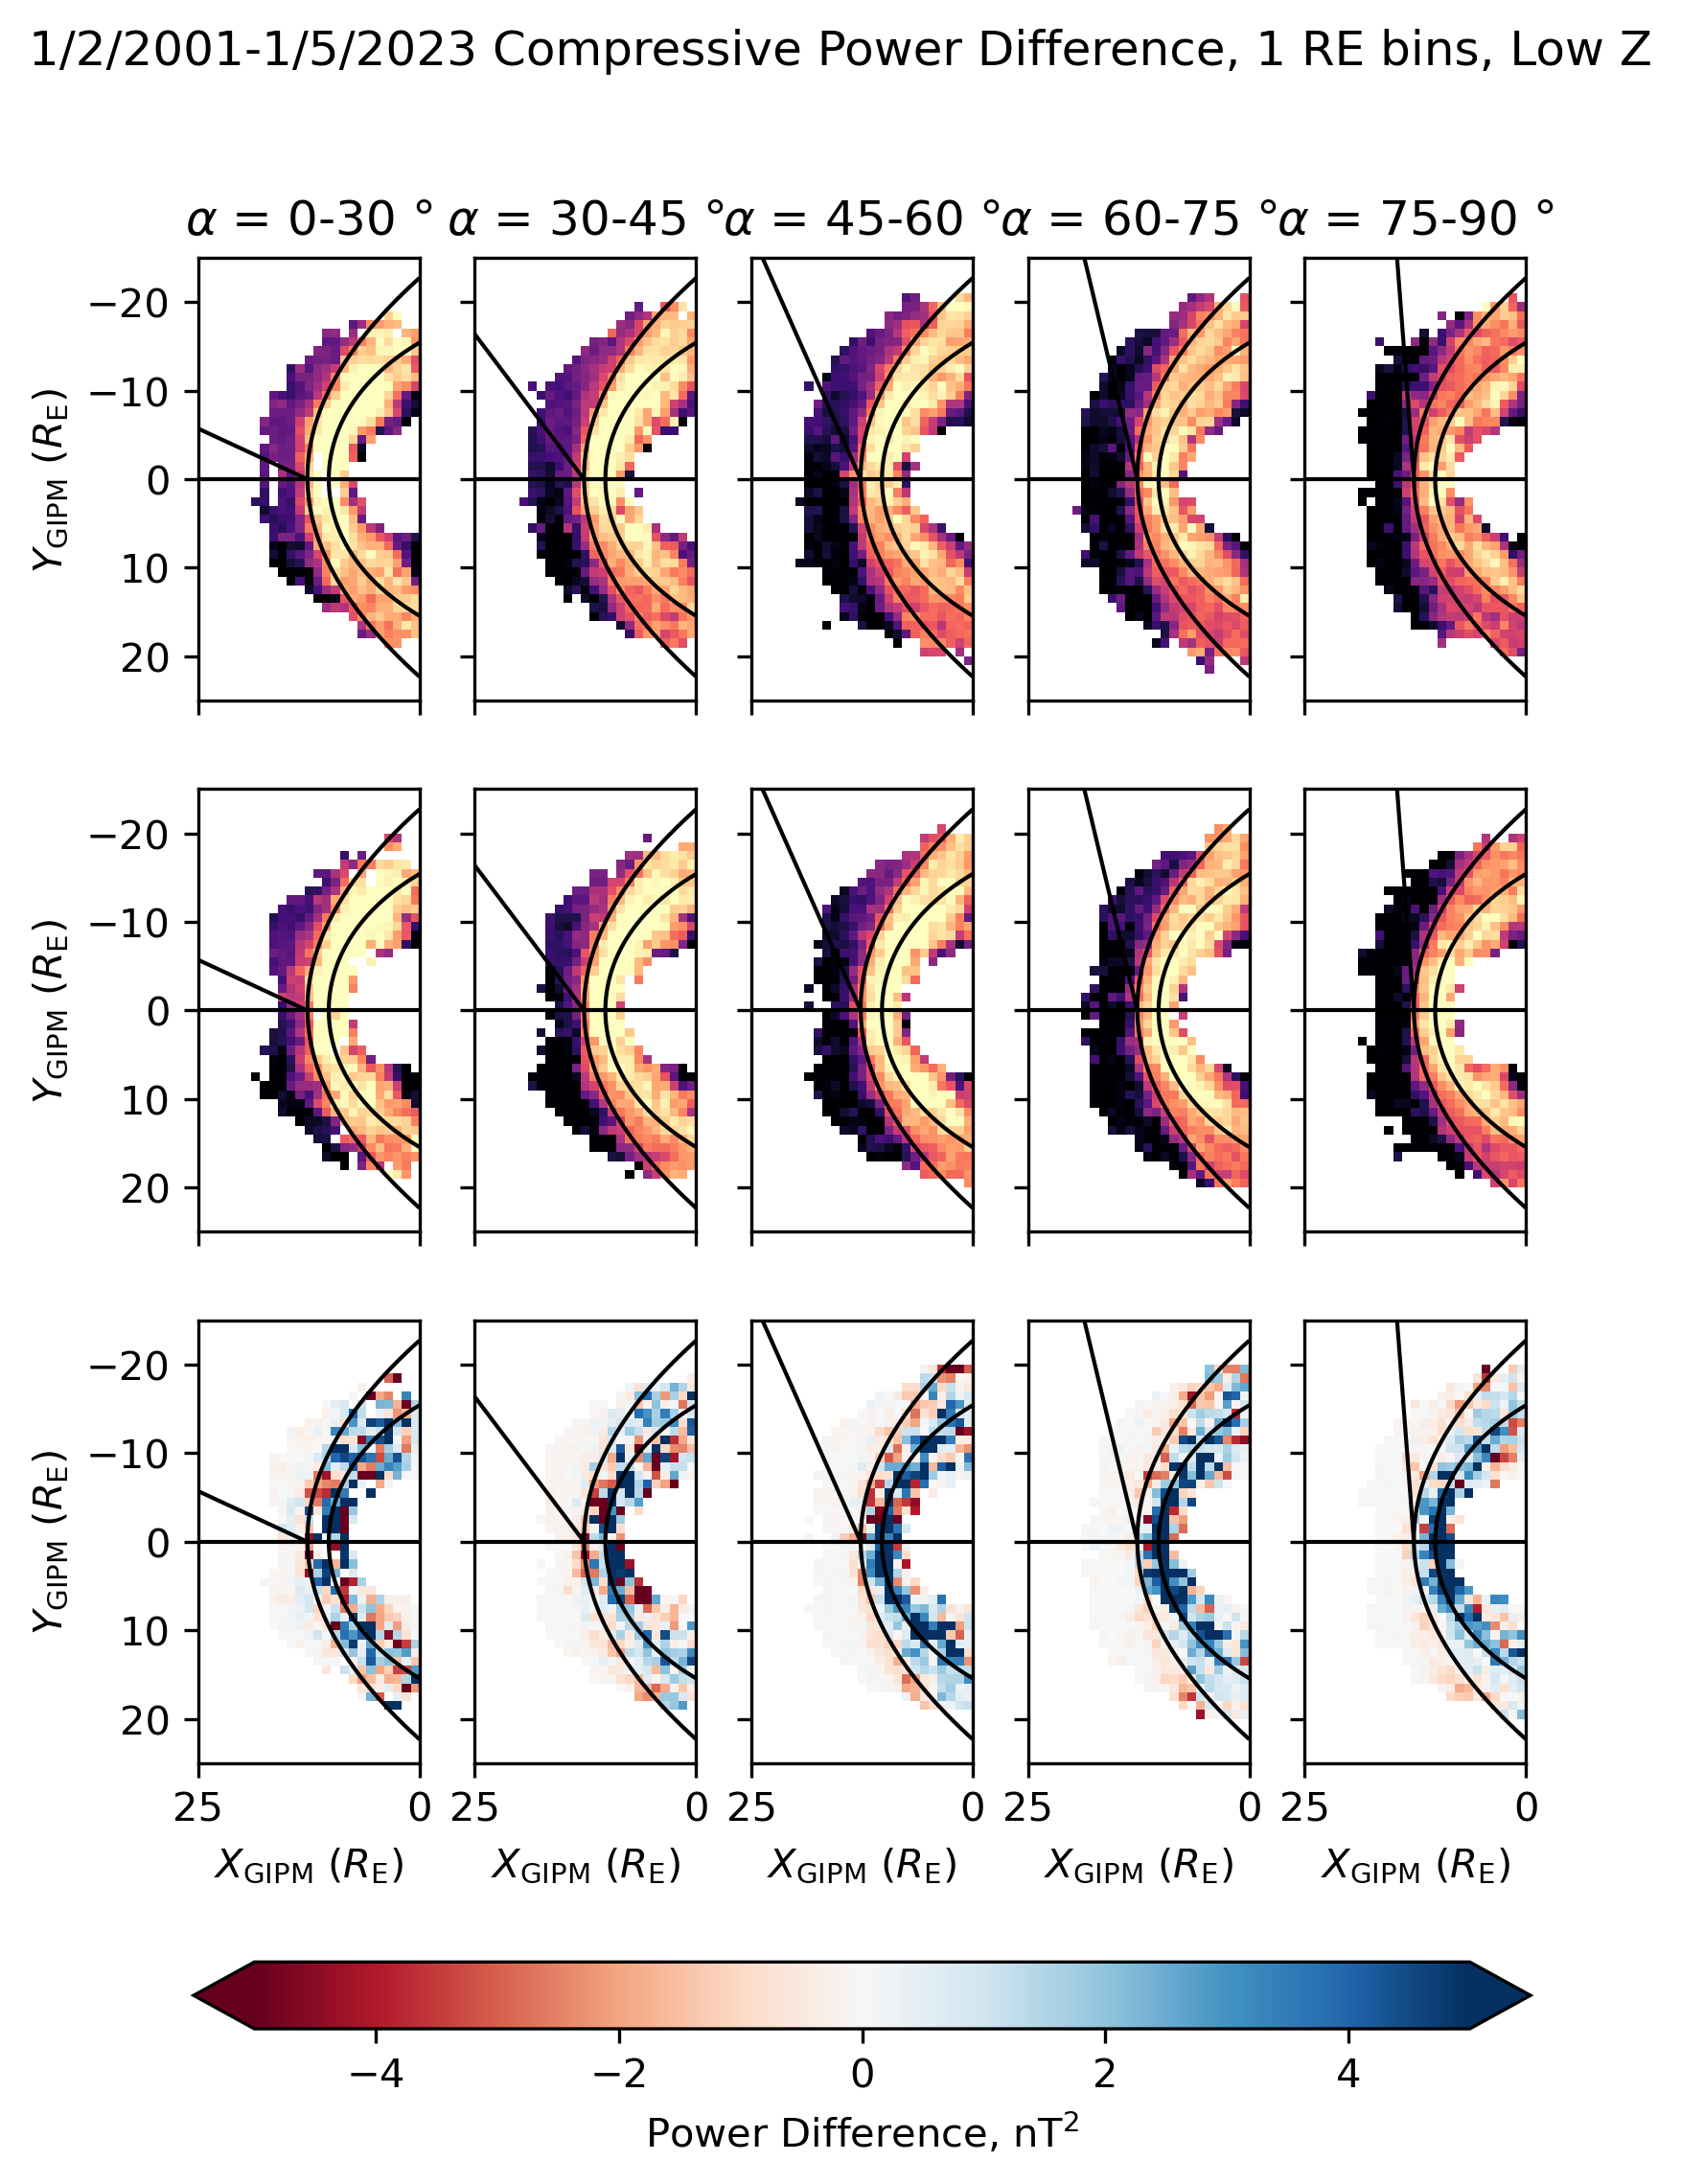

In [48]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Difference, $\mathrm{nT}^2$'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_diff_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_diff_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_diff_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_diff_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_diff_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

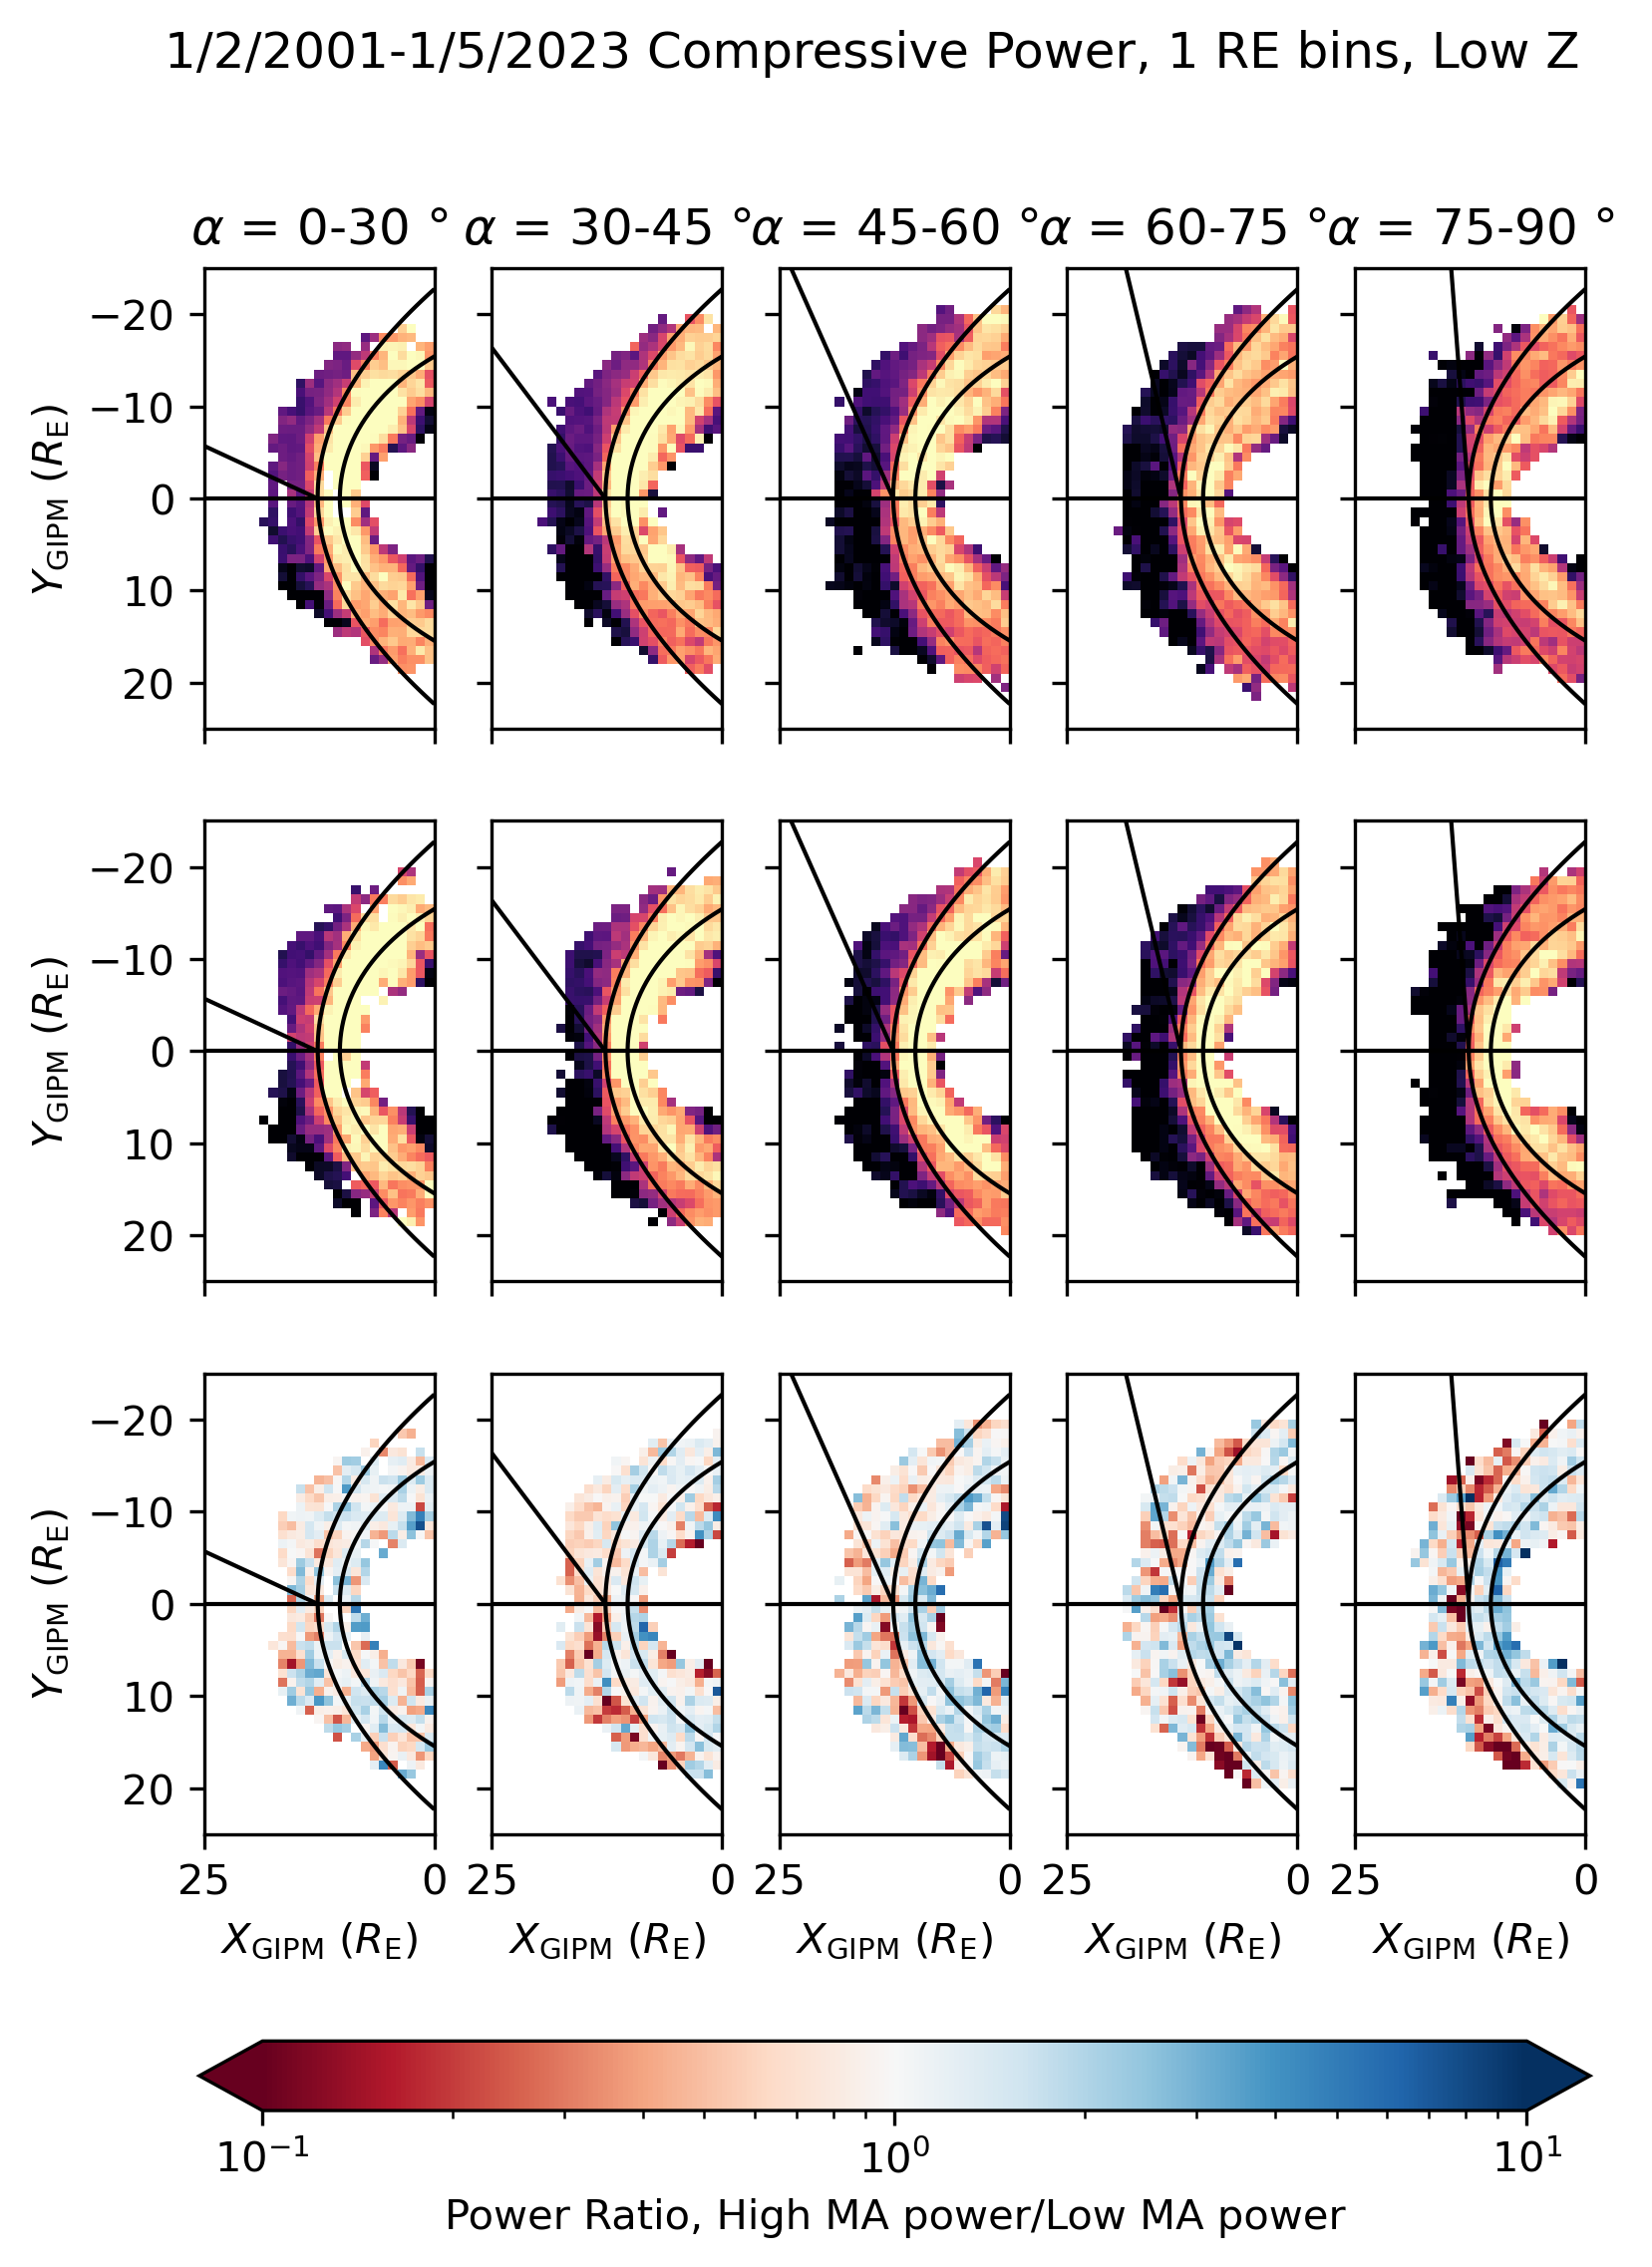

In [49]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.1, 10)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA power/Low MA power'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_ratio_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_ratio_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_ratio_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_ratio_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_ratio_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

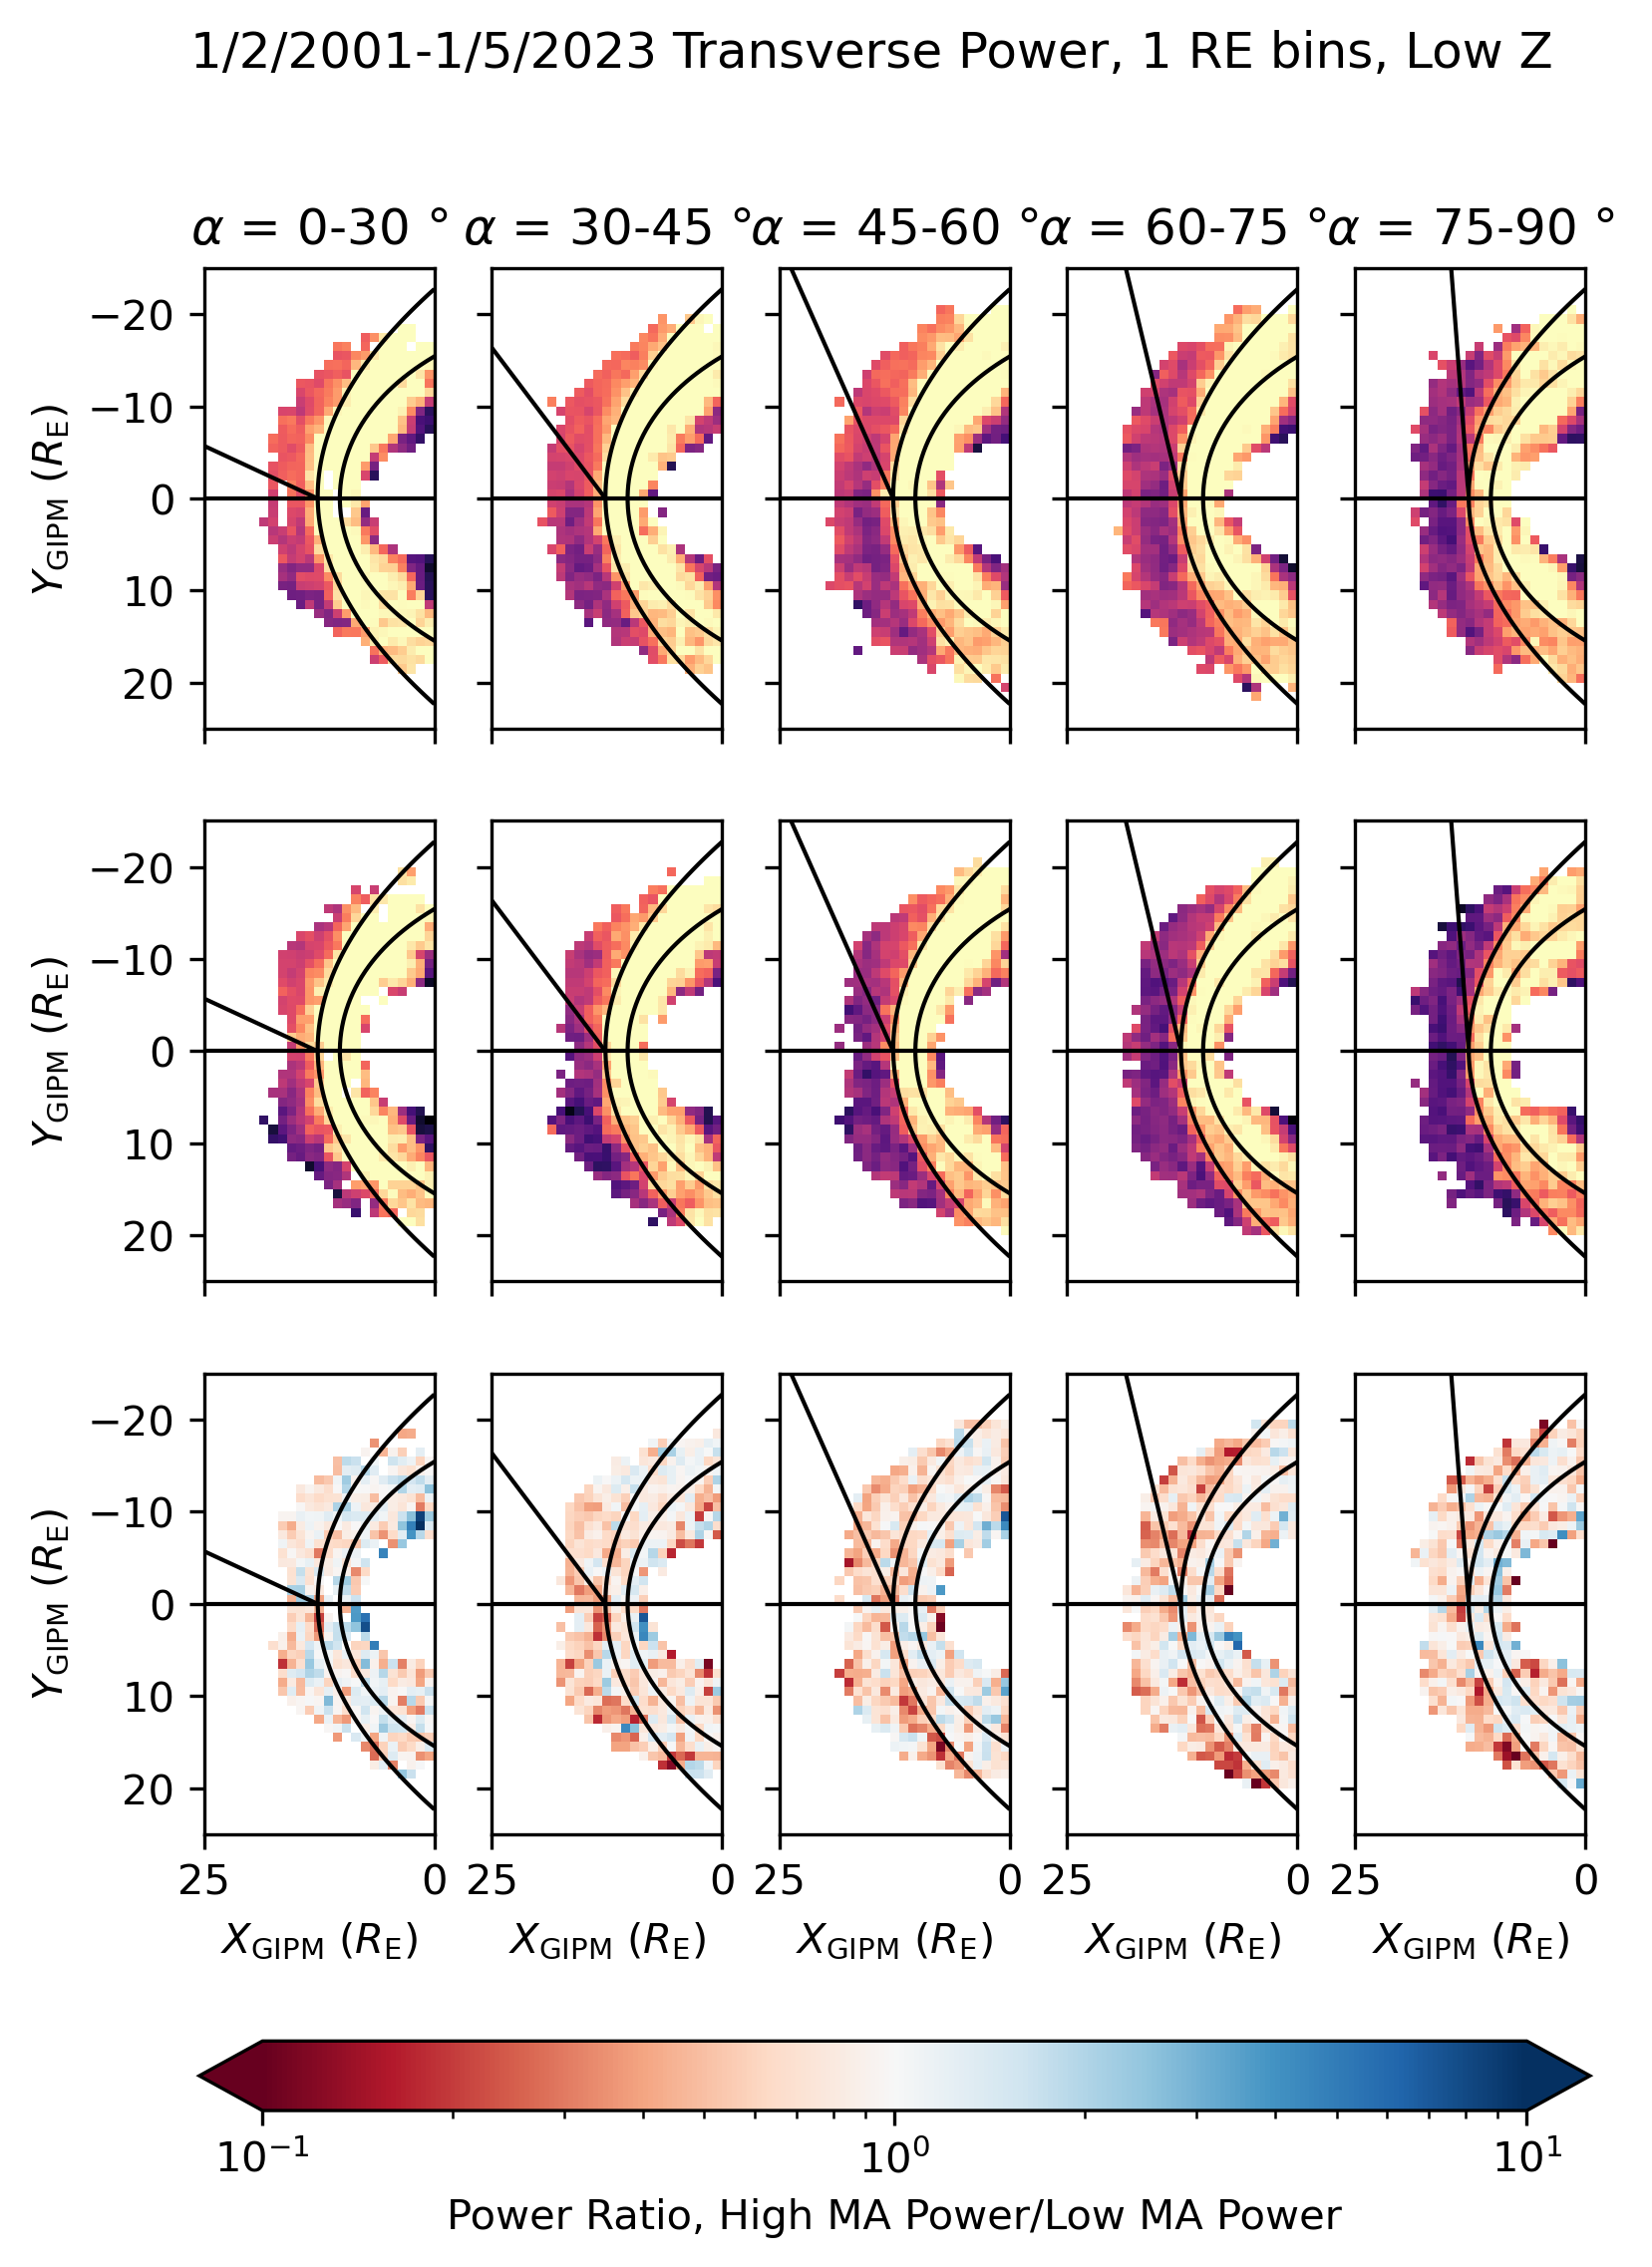

In [50]:
#plot w/ two rows of 5-10 and 10-15 and then the ratioerence.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.1, 10)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA Power/Low MA Power'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_ratio_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_ratio_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_ratio_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_ratio_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_ratio_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [37]:
#now produce a binned plot of integrated power!first split into bins and then plot
#change to do mean of ratios not ratio of means

def binning_normB_fourier_no_bad_stats(cluster_df):
    
    #first mask out datapoints so only those within -5<Z<5 Re are left
    
    cluster_df_XY = cluster_df.loc[(cluster_df['GIPM Z (OMNI mean)']> -5) & (cluster_df['GIPM Z (OMNI mean)'] < 5)]

    #break up into X strips between 0 and 25 in increments of 0.5 Re
    #probably want to do this using lists
    #or maybe window start times??
    bin_size = 1
    n = 25/bin_size
    n = int(n)
    lists = [[] for _ in range(n)]
    X_lim = 1
    
    for i in lists:
        #X lower bound
        X_lb = X_lim - bin_size
        #find all date times where X is within current bounds
        mask = cluster_df_XY.loc[(cluster_df_XY['GIPM X (OMNI mean)']>= X_lb) & (cluster_df_XY['GIPM X (OMNI mean)'] < X_lim)]
        windows = mask.index
        #and append to that list
        i.extend(windows)
        #increment X limit
        X_lim = X_lim + bin_size
    
    #now have lists of each timestamp associated with binsize Re width X bands
    #separate into binsize XY boxes

    n = (52/bin_size) * (25/bin_size)
    n = int(n)
    bin_lists = [[] for _ in range(n)]
    row_counter = 1

    #work by X row. i is one row, i.e. one list! of date times
    for i in lists:
        #set starting Y lim
        Y_lim = -25
        #mask df to just those times that are in i:
        mask = cluster_df_XY.loc[cluster_df_XY.index.isin(i)]
    
        y_bins_lower = (52/bin_size)*(row_counter-1)
        y_bins_lower = int(y_bins_lower)
        y_bins = (52/bin_size)*row_counter
        y_bins = int(y_bins)
        
        #now separate by Y bin NEED TO CHANGE Y BIN LIMS
        for j in range(y_bins_lower, y_bins): 
            Y_lb = Y_lim - bin_size
            mask_2 = mask.loc[(mask['GIPM Y (OMNI mean)']>= Y_lb) & (mask['GIPM Y (OMNI mean)'] < Y_lim)]
            windows = mask_2.index
            #and append to that list
            bin_lists[j].extend(windows)
            #increment X limit
            Y_lim = Y_lim + bin_size
        
        row_counter = row_counter + 1
    
    #new list of bin values
    #now for each list in bin_lists, find associated mean cluster B ratio
    #and extend new lists

    mean_para_perbin = []
    mean_perp_perbin = []
    para_perp_ratio_perbin = []
    
    for j in bin_lists:
        #intermediate list for taking mean
        int_list_para = []
        int_list_perp = []
        
        #filter cluster database for just the times included in the binlist
        for m in j:
            mask = cluster_df_XY.loc[cluster_df_XY.index== m]
            para_power = mask['ULF Band Normalised Compressive Power']
            int_list_para.extend(para_power)
            perp_power = mask['ULF Band Normalised Transverse Power']
            int_list_perp.extend(perp_power)
        
        if len(int_list_para) >= 100:
            mean_para = sum(int_list_para)/len(int_list_para)
            mean_para_perbin.append(mean_para)
            mean_perp = sum(int_list_perp)/len(int_list_perp)
            mean_perp_perbin.append(mean_perp)
            #para_perp = mean_para/mean_perp
            int_list_para_ar = np.array(int_list_para)
            int_list_perp_ar = np.array(int_list_perp)
            para_perp_ar = int_list_para_ar/int_list_perp_ar
            para_perp = np.mean(para_perp_ar)
            para_perp_ratio_perbin.append(para_perp)
            
            
        else:
            mean_para_perbin.append(np.nan)
            mean_perp_perbin.append(np.nan)
            para_perp_ratio_perbin.append(np.nan)
        
    return(mean_para_perbin,mean_perp_perbin,para_perp_ratio_perbin)

In [38]:
#MA and CA splitting, do perpendicular power for all MA and CA in 5 x 4 grid

##first, make the individual bin lists

###BELOW 5MA

mean_para_rad_less5_Bnorm,mean_perp_rad_less5_Bnorm,para_perp_rad_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_less5)

###5-10 MA

mean_para_rad_5_10_Bnorm,mean_perp_rad_5_10_Bnorm,para_perp_rad_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_5_10)

###10-15 MA

mean_para_rad_10_15_Bnorm,mean_perp_rad_10_15_Bnorm,para_perp_rad_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_10_15)

###OVER 15MA

mean_para_rad_15more_Bnorm,mean_perp_rad_15more_Bnorm,para_perp_rad_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_rad_15more)


#########LOWSPIRAL######
###BELOW 5MA

mean_para_lowspir_less5_Bnorm,mean_perp_lowspir_less5_Bnorm,para_perp_lowspir_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_less5)

###5-10 MA

mean_para_lowspir_5_10_Bnorm,mean_perp_lowspir_5_10_Bnorm,para_perp_lowspir_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_5_10)

###10-15 MA

mean_para_lowspir_10_15_Bnorm,mean_perp_lowspir_10_15_Bnorm,para_perp_lowspir_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_10_15)

###OVER 15MA

mean_para_lowspir_15more_Bnorm,mean_perp_lowspir_15more_Bnorm,para_perp_lowspir_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_lowspir_15more)

#########HIGHSPIRAL######
###BELOW 5MA

mean_para_highspir_less5_Bnorm,mean_perp_highspir_less5_Bnorm,para_perp_highspir_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_less5)

###5-10 MA

mean_para_highspir_5_10_Bnorm,mean_perp_highspir_5_10_Bnorm,para_perp_highspir_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_5_10)

###10-15 MA

mean_para_highspir_10_15_Bnorm,mean_perp_highspir_10_15_Bnorm,para_perp_highspir_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_10_15)

###OVER 15MA

mean_para_highspir_15more_Bnorm,mean_perp_highspir_15more_Bnorm,para_perp_highspir_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_highspir_15more)


#########LOWPERP######
###BELOW 5MA

mean_para_lowperp_less5_Bnorm,mean_perp_lowperp_less5_Bnorm,para_perp_lowperp_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_less5)

###5-10 MA

mean_para_lowperp_5_10_Bnorm,mean_perp_lowperp_5_10_Bnorm,para_perp_lowperp_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_5_10)

###10-15 MA

mean_para_lowperp_10_15_Bnorm,mean_perp_lowperp_10_15_Bnorm,para_perp_lowperp_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_10_15)

###OVER 15MA

mean_para_lowperp_15more_Bnorm,mean_perp_lowperp_15more_Bnorm,para_perp_lowperp_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_lowperp_15more)

#########HIGHPERP######
###BELOW 5MA

mean_para_highperp_less5_Bnorm,mean_perp_highperp_less5_Bnorm,para_perp_highperp_less5_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_less5)

###5-10 MA

mean_para_highperp_5_10_Bnorm,mean_perp_highperp_5_10_Bnorm,para_perp_highperp_5_10_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_5_10)

###10-15 MA

mean_para_highperp_10_15_Bnorm,mean_perp_highperp_10_15_Bnorm,para_perp_highperp_10_15_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_10_15)

###OVER 15MA

mean_para_highperp_15more_Bnorm,mean_perp_highperp_15more_Bnorm,para_perp_highperp_15more_Bnorm = binning_normB_fourier_no_bad_stats(df_highperp_15more)




Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

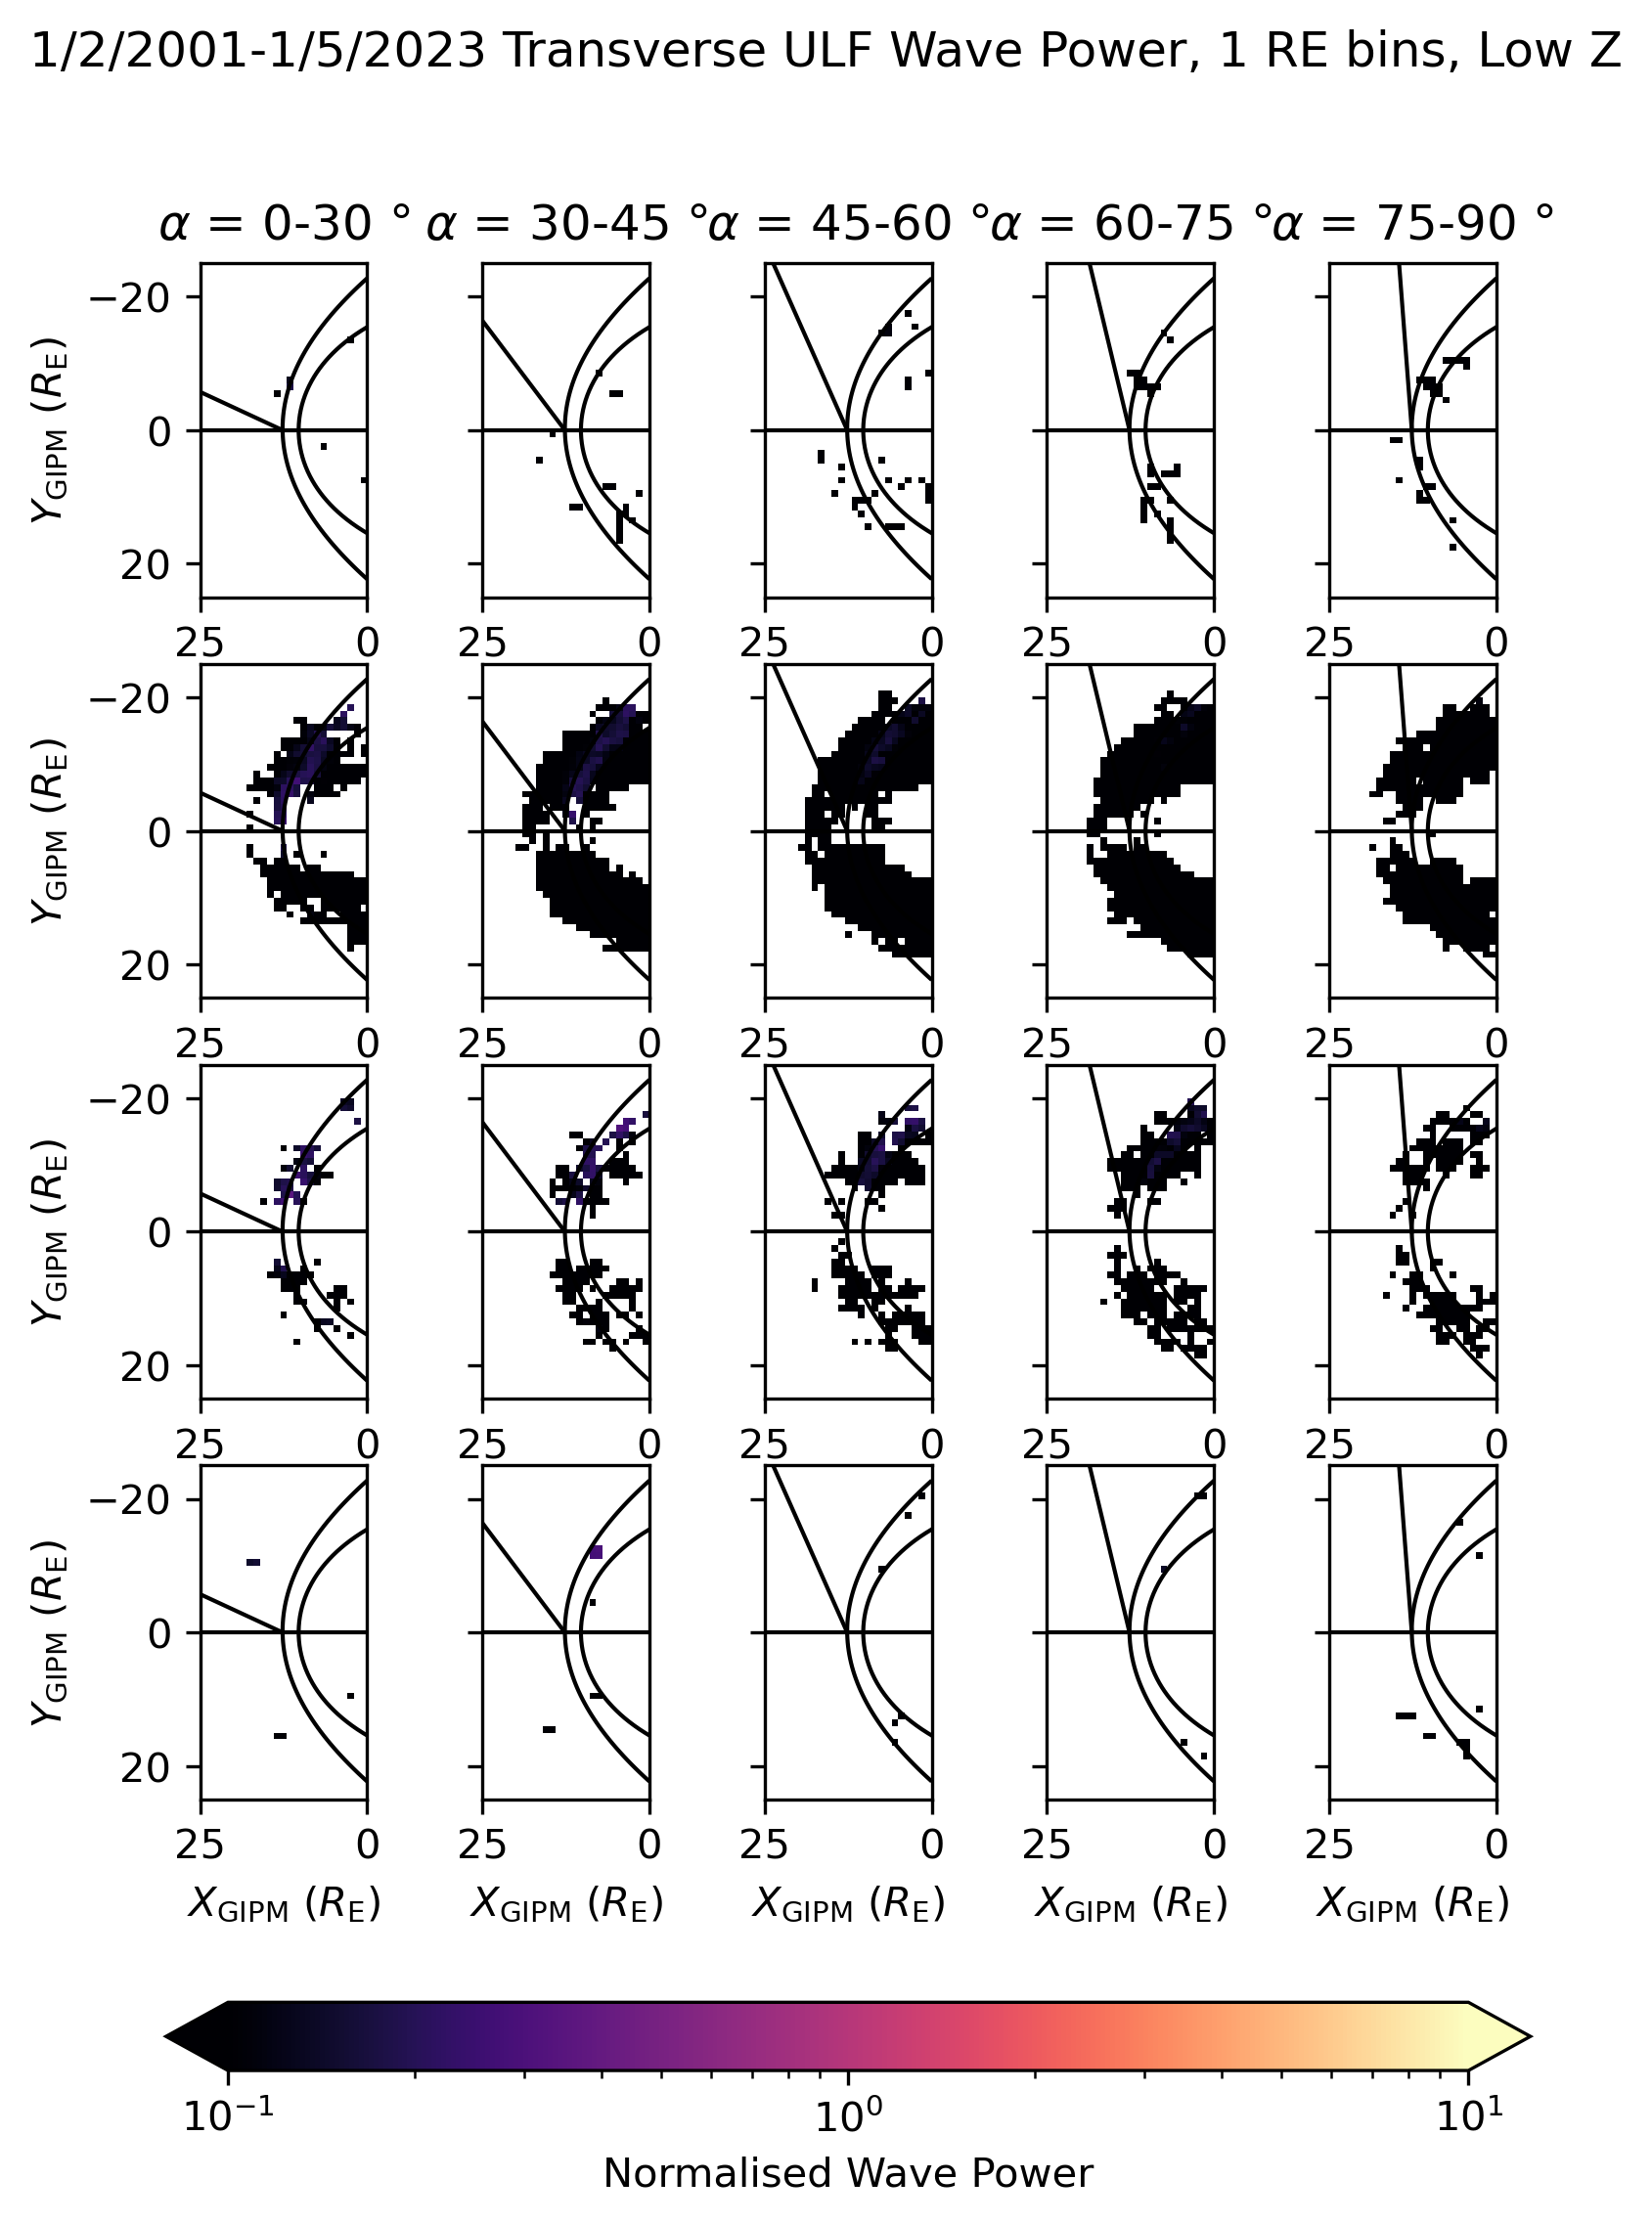

In [39]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_perp_rad_less5_Bnorm)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Normalised Wave Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_perp_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_perp_rad_15more_Bnorm)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_perp_lowspir_less5_Bnorm)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_perp_lowspir_15more_Bnorm)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_perp_highspir_less5_Bnorm)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_perp_highspir_15more_Bnorm)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_perp_lowperp_less5_Bnorm)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_perp_lowperp_15more_Bnorm)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_perp_highperp_less5_Bnorm)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_perp_highperp_15more_Bnorm)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

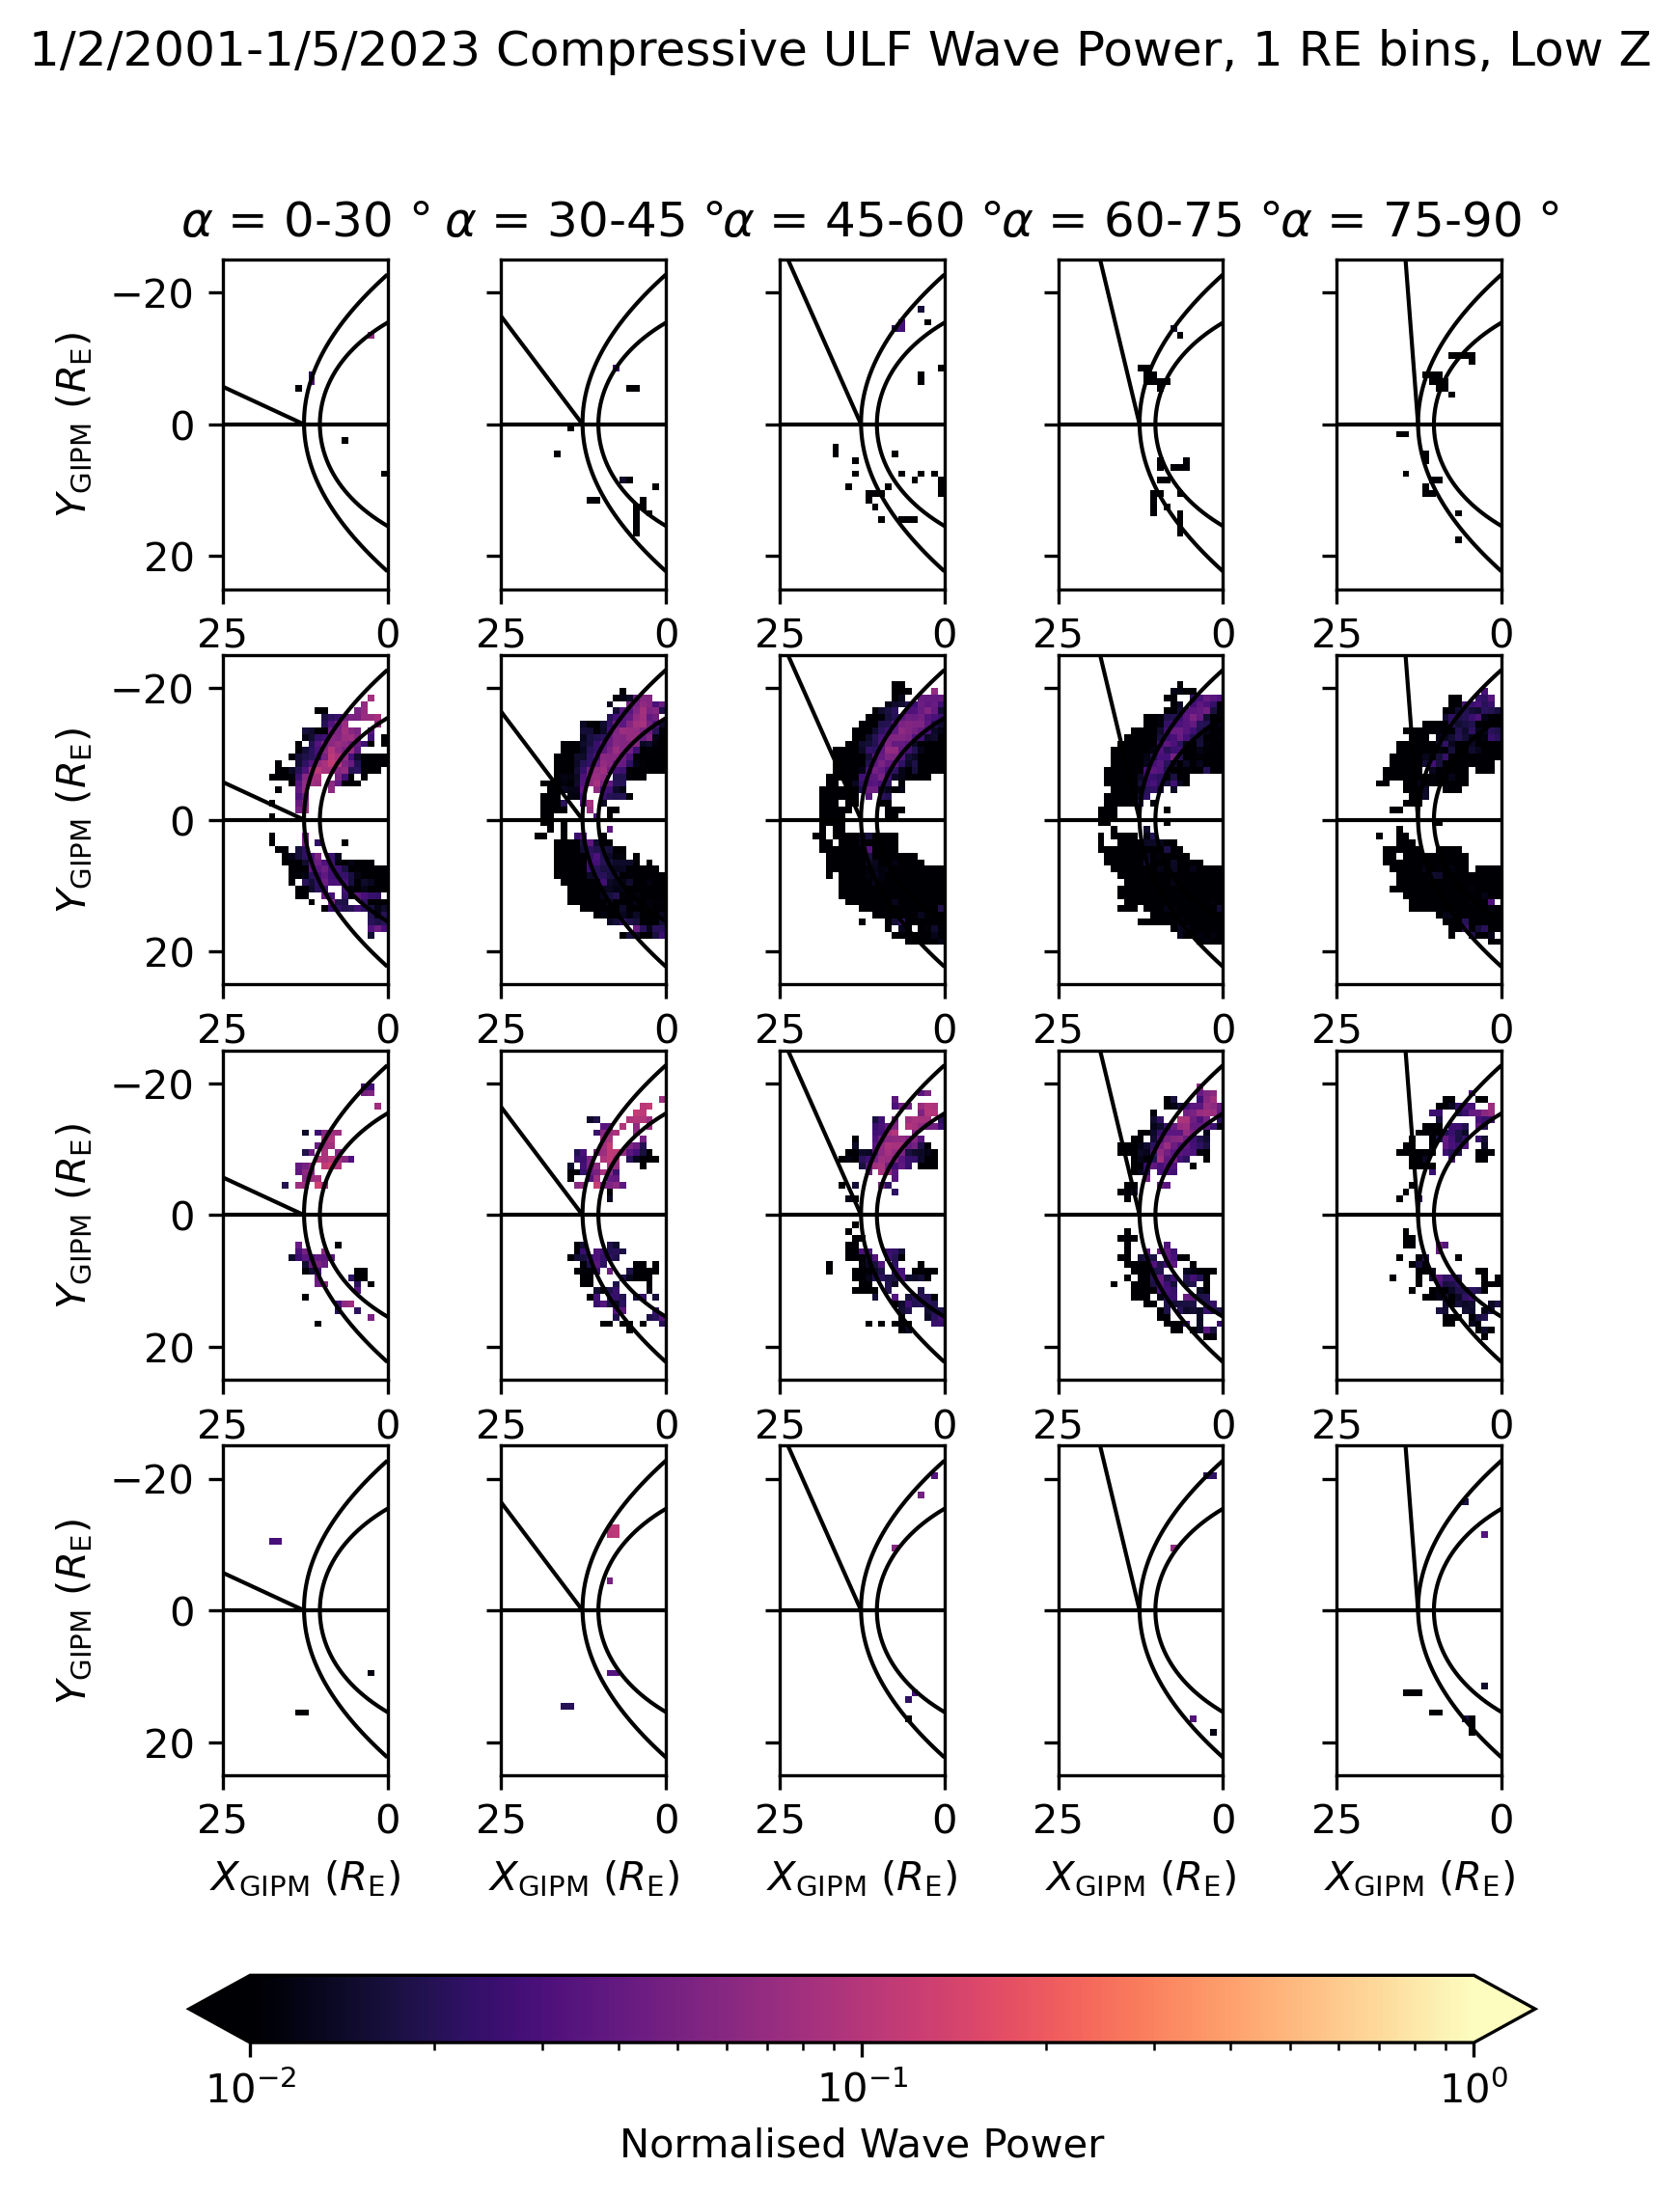

In [48]:
#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(4, 5, sharey=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive ULF Wave Power, 1 RE bins, Low Z')

ax0 = axsLeft[0,0]

#cmap norm

norm = colors.LogNorm(0.01, 1)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#cmap for plot 0
col_array_0 = np.array(mean_para_rad_less5_Bnorm)
color_grid_0 = col_array_0.reshape(x_bin_ticks, y_bin_ticks)
color_grid_0 = np.rot90(color_grid_0)
color_grid_0 = np.flipud(color_grid_0)

ax0.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax0.plot(X_shue, R_shue, linewidth=1, color='k')

ax0.set_aspect('equal')
#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax0.set_title(r'$\alpha$ = 0-30 $\degree$')

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

#want to also have line for just solar wind flow along y=0

ax0.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax0.pcolormesh(x_mesh, y_mesh, color_grid_0[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax0.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax0.set_ylim(-25,25)
ax0.set_xlim(0,25)
ax0.invert_xaxis()
ax0.invert_yaxis()
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='magma'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label='Normalised Wave Power')

ax1 = axsLeft[1,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-25,25)
ax1.set_xlim(0,25)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = axsLeft[2,0]

col_array_2 = np.array(mean_para_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-25,25)
ax2.set_xlim(0,25)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[3,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = np.array(mean_para_rad_15more_Bnorm)
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-25,25)
ax3.set_xlim(0,25)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax4 = axsLeft[0,1]

ax4.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax4.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_4 = np.array(mean_para_lowspir_less5_Bnorm)
color_grid_4 = col_array_4.reshape(x_bin_ticks, y_bin_ticks)
color_grid_4 = np.rot90(color_grid_4)
color_grid_4 = np.flipud(color_grid_4)

ax4.set_aspect('equal')
#ax4.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax4.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax4.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax4.pcolormesh(x_mesh, y_mesh, color_grid_4[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax4.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax4.set_ylim(-25,25)
ax4.set_xlim(0,25)
ax4.invert_xaxis()
ax4.invert_yaxis()
ax4.set_title(r'$\alpha$ = 30-45 $\degree$')

ax5 = axsLeft[1,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-25,25)
ax5.set_xlim(0,25)
ax5.invert_xaxis()
ax5.invert_yaxis()

ax6 = axsLeft[2,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-25,25)
ax6.set_xlim(0,25)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[3,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = np.array(mean_para_lowspir_15more_Bnorm)
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-25,25)
ax7.set_xlim(0,25)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

ax8 = axsLeft[0,2]

ax8.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax8.plot(X_shue, R_shue, linewidth=1, color='k')

ax8.set_aspect('equal')
#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_8 = np.array(mean_para_highspir_less5_Bnorm)
color_grid_8 = col_array_8.reshape(x_bin_ticks, y_bin_ticks)
color_grid_8 = np.rot90(color_grid_8)
color_grid_8 = np.flipud(color_grid_8)

ax8.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax8.pcolormesh(x_mesh, y_mesh, color_grid_8[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax8.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax8.set_ylim(-25,25)
ax8.set_xlim(0,25)
ax8.invert_xaxis()
ax8.invert_yaxis()
ax8.set_title(r'$\alpha$ = 45-60 $\degree$')

ax9 = axsLeft[1,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-25,25)
ax9.set_xlim(0,25)
ax9.invert_xaxis()
ax9.invert_yaxis()

ax10 = axsLeft[2,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[3,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = np.array(mean_para_highspir_15more_Bnorm)
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax12 = axsLeft[0,3]

ax12.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax12.plot(X_shue, R_shue, linewidth=1, color='k')

ax12.set_aspect('equal')
#ax12.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax12.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax12.set_title(r'$\alpha$ = 60-75 $\degree$')

col_array_12 = np.array(mean_para_lowperp_less5_Bnorm)
color_grid_12 = col_array_12.reshape(x_bin_ticks, y_bin_ticks)
color_grid_12 = np.rot90(color_grid_12)
color_grid_12 = np.flipud(color_grid_12)

ax12.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax12.pcolormesh(x_mesh, y_mesh, color_grid_12[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax12.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax12.set_ylim(-25,25)
ax12.set_xlim(0,25)
ax12.invert_xaxis()
ax12.invert_yaxis()

ax13 = axsLeft[1,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[2,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[3,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = np.array(mean_para_lowperp_15more_Bnorm)
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)

ax16 = axsLeft[0,4]

ax16.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax16.plot(X_shue, R_shue, linewidth=1, color='k')

ax16.set_aspect('equal')
#ax16.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax16.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax16.set_title(r'$\alpha$ = 75-90 $\degree$')

col_array_16 = np.array(mean_para_highperp_less5_Bnorm)
color_grid_16 = col_array_16.reshape(x_bin_ticks, y_bin_ticks)
color_grid_16 = np.rot90(color_grid_16)
color_grid_16 = np.flipud(color_grid_16)

ax16.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax16.pcolormesh(x_mesh, y_mesh, color_grid_16[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax16.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax16.set_ylim(-25,25)
ax16.set_xlim(0,25)
ax16.invert_xaxis()
ax16.invert_yaxis()

ax17 = axsLeft[1,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[2,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[3,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = np.array(mean_para_highperp_15more_Bnorm)
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='magma', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


In [41]:
# subtract values to see differences

### want 5-10, 10-15 comparison. can also do 15more but that is secondary. Radial.

mean_para_rad_5_10_arr_Bnorm = np.array(mean_para_rad_5_10_Bnorm)
mean_perp_rad_5_10_arr_Bnorm = np.array(mean_perp_rad_5_10_Bnorm)
para_perp_rad_5_10_arr_Bnorm = np.array(para_perp_rad_5_10_Bnorm)

mean_para_rad_10_15_arr_Bnorm = np.array(mean_para_rad_10_15_Bnorm)
mean_perp_rad_10_15_arr_Bnorm = np.array(mean_perp_rad_10_15_Bnorm)
para_perp_rad_10_15_arr_Bnorm = np.array(para_perp_rad_10_15_Bnorm)

para_diff_rad_5_10_15_Bnorm = mean_para_rad_10_15_arr_Bnorm - mean_para_rad_5_10_arr_Bnorm
perp_diff_rad_5_10_15_Bnorm = mean_perp_rad_10_15_arr_Bnorm - mean_perp_rad_5_10_arr_Bnorm
ratio_diff_rad_5_10_15_Bnorm = para_perp_rad_10_15_arr_Bnorm - para_perp_rad_5_10_arr_Bnorm

para_ratio_rad_5_10_15_Bnorm = mean_para_rad_10_15_arr_Bnorm/mean_para_rad_5_10_arr_Bnorm
perp_ratio_rad_5_10_15_Bnorm = mean_perp_rad_10_15_arr_Bnorm/mean_perp_rad_5_10_arr_Bnorm
ratio_ratio_rad_5_10_15_Bnorm = para_perp_rad_10_15_arr_Bnorm/para_perp_rad_5_10_arr_Bnorm

#########LOWSPIRAL######

mean_para_lowspir_5_10_arr_Bnorm = np.array(mean_para_lowspir_5_10_Bnorm)
mean_perp_lowspir_5_10_arr_Bnorm = np.array(mean_perp_lowspir_5_10_Bnorm)
para_perp_lowspir_5_10_arr_Bnorm = np.array(para_perp_lowspir_5_10_Bnorm)

mean_para_lowspir_10_15_arr_Bnorm = np.array(mean_para_lowspir_10_15_Bnorm)
mean_perp_lowspir_10_15_arr_Bnorm = np.array(mean_perp_lowspir_10_15_Bnorm)
para_perp_lowspir_10_15_arr_Bnorm = np.array(para_perp_lowspir_10_15_Bnorm)

para_diff_lowspir_5_10_15_Bnorm = mean_para_lowspir_10_15_arr_Bnorm - mean_para_lowspir_5_10_arr_Bnorm
perp_diff_lowspir_5_10_15_Bnorm = mean_perp_lowspir_10_15_arr_Bnorm - mean_perp_lowspir_5_10_arr_Bnorm
ratio_diff_lowspir_5_10_15_Bnorm = para_perp_lowspir_10_15_arr_Bnorm - para_perp_lowspir_5_10_arr_Bnorm

para_ratio_lowspir_5_10_15_Bnorm = mean_para_lowspir_10_15_arr_Bnorm/mean_para_lowspir_5_10_arr_Bnorm
perp_ratio_lowspir_5_10_15_Bnorm = mean_perp_lowspir_10_15_arr_Bnorm/mean_perp_lowspir_5_10_arr_Bnorm
ratio_ratio_lowspir_5_10_15_Bnorm = para_perp_lowspir_10_15_arr_Bnorm/para_perp_lowspir_5_10_arr_Bnorm

#########HIGHSPIRAL######

mean_para_highspir_5_10_arr_Bnorm = np.array(mean_para_highspir_5_10_Bnorm)
mean_perp_highspir_5_10_arr_Bnorm = np.array(mean_perp_highspir_5_10_Bnorm)
para_perp_highspir_5_10_arr_Bnorm = np.array(para_perp_highspir_5_10_Bnorm)

mean_para_highspir_10_15_arr_Bnorm = np.array(mean_para_highspir_10_15_Bnorm)
mean_perp_highspir_10_15_arr_Bnorm = np.array(mean_perp_highspir_10_15_Bnorm)
para_perp_highspir_10_15_arr_Bnorm = np.array(para_perp_highspir_10_15_Bnorm)

para_diff_highspir_5_10_15_Bnorm = mean_para_highspir_10_15_arr_Bnorm - mean_para_highspir_5_10_arr_Bnorm
perp_diff_highspir_5_10_15_Bnorm = mean_perp_highspir_10_15_arr_Bnorm - mean_perp_highspir_5_10_arr_Bnorm
ratio_diff_highspir_5_10_15_Bnorm = para_perp_highspir_10_15_arr_Bnorm - para_perp_highspir_5_10_arr_Bnorm

para_ratio_highspir_5_10_15_Bnorm = mean_para_highspir_10_15_arr_Bnorm/mean_para_highspir_5_10_arr_Bnorm
perp_ratio_highspir_5_10_15_Bnorm = mean_perp_highspir_10_15_arr_Bnorm/mean_perp_highspir_5_10_arr_Bnorm
ratio_ratio_highspir_5_10_15_Bnorm = para_perp_highspir_10_15_arr_Bnorm/para_perp_highspir_5_10_arr_Bnorm

#########LOWPERP######

mean_para_lowperp_5_10_arr_Bnorm = np.array(mean_para_lowperp_5_10_Bnorm)
mean_perp_lowperp_5_10_arr_Bnorm = np.array(mean_perp_lowperp_5_10_Bnorm)
para_perp_lowperp_5_10_arr_Bnorm = np.array(para_perp_lowperp_5_10_Bnorm)

mean_para_lowperp_10_15_arr_Bnorm = np.array(mean_para_lowperp_10_15_Bnorm)
mean_perp_lowperp_10_15_arr_Bnorm = np.array(mean_perp_lowperp_10_15_Bnorm)
para_perp_lowperp_10_15_arr_Bnorm = np.array(para_perp_lowperp_10_15_Bnorm)

para_diff_lowperp_5_10_15_Bnorm = mean_para_lowperp_10_15_arr_Bnorm - mean_para_lowperp_5_10_arr_Bnorm
perp_diff_lowperp_5_10_15_Bnorm = mean_perp_lowperp_10_15_arr_Bnorm - mean_perp_lowperp_5_10_arr_Bnorm
ratio_diff_lowperp_5_10_15_Bnorm = para_perp_lowperp_10_15_arr_Bnorm - para_perp_lowperp_5_10_arr_Bnorm

para_ratio_lowperp_5_10_15_Bnorm = mean_para_lowperp_10_15_arr_Bnorm/mean_para_lowperp_5_10_arr_Bnorm
perp_ratio_lowperp_5_10_15_Bnorm = mean_perp_lowperp_10_15_arr_Bnorm/mean_perp_lowperp_5_10_arr_Bnorm
ratio_ratio_lowperp_5_10_15_Bnorm = para_perp_lowperp_10_15_arr_Bnorm/para_perp_lowperp_5_10_arr_Bnorm

#########HIGHPERP######

mean_para_highperp_5_10_arr_Bnorm = np.array(mean_para_highperp_5_10_Bnorm)
mean_perp_highperp_5_10_arr_Bnorm = np.array(mean_perp_highperp_5_10_Bnorm)
para_perp_highperp_5_10_arr_Bnorm = np.array(para_perp_highperp_5_10_Bnorm)

mean_para_highperp_10_15_arr_Bnorm = np.array(mean_para_highperp_10_15_Bnorm)
mean_perp_highperp_10_15_arr_Bnorm = np.array(mean_perp_highperp_10_15_Bnorm)
para_perp_highperp_10_15_arr_Bnorm = np.array(para_perp_highperp_10_15_Bnorm)

para_diff_highperp_5_10_15_Bnorm = mean_para_highperp_10_15_arr_Bnorm - mean_para_highperp_5_10_arr_Bnorm
perp_diff_highperp_5_10_15_Bnorm = mean_perp_highperp_10_15_arr_Bnorm - mean_perp_highperp_5_10_arr_Bnorm
ratio_diff_highperp_5_10_15_Bnorm = para_perp_highperp_10_15_arr_Bnorm - para_perp_highperp_5_10_arr_Bnorm

para_ratio_highperp_5_10_15_Bnorm = mean_para_highperp_10_15_arr_Bnorm/mean_para_highperp_5_10_arr_Bnorm
perp_ratio_highperp_5_10_15_Bnorm = mean_perp_highperp_10_15_arr_Bnorm/mean_perp_highperp_5_10_arr_Bnorm
ratio_ratio_highperp_5_10_15_Bnorm = para_perp_highperp_10_15_arr_Bnorm/para_perp_highperp_5_10_arr_Bnorm


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

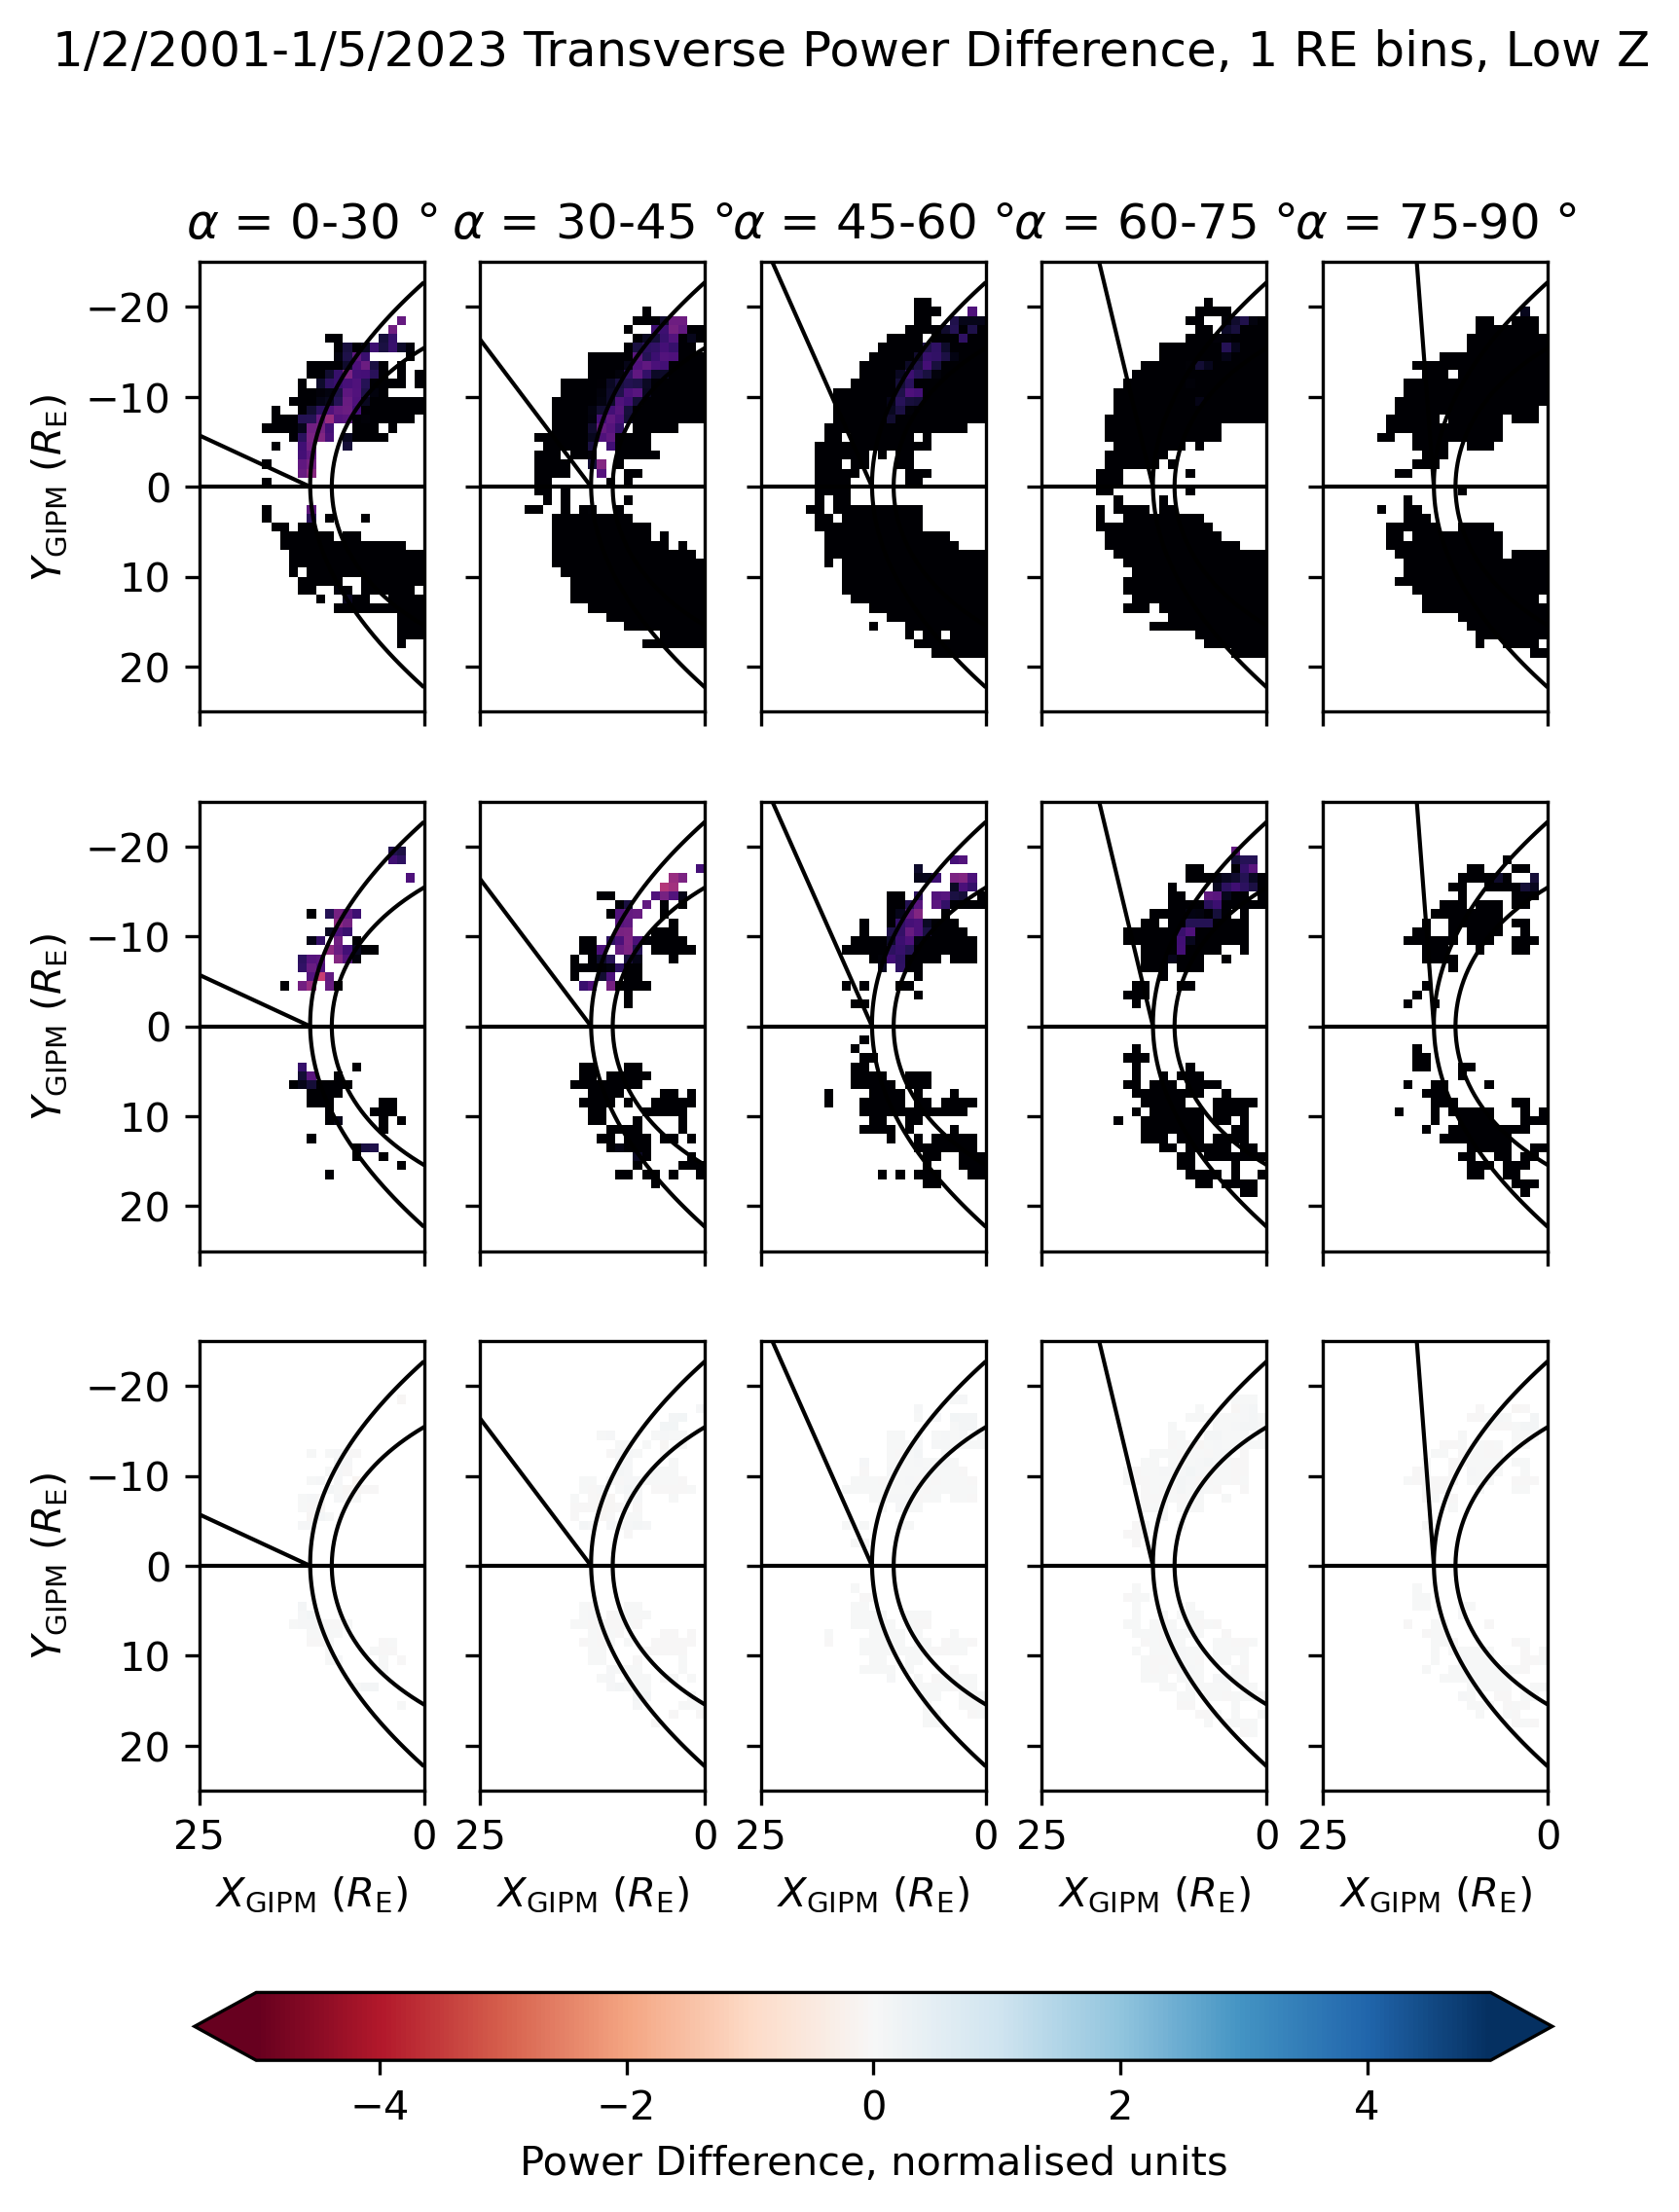

In [47]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 1)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Difference, normalised units'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_diff_rad_5_10_15_Bnorm
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_diff_lowspir_5_10_15_Bnorm
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_diff_highspir_5_10_15_Bnorm
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_diff_lowperp_5_10_15_Bnorm
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_diff_highperp_5_10_15_Bnorm
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

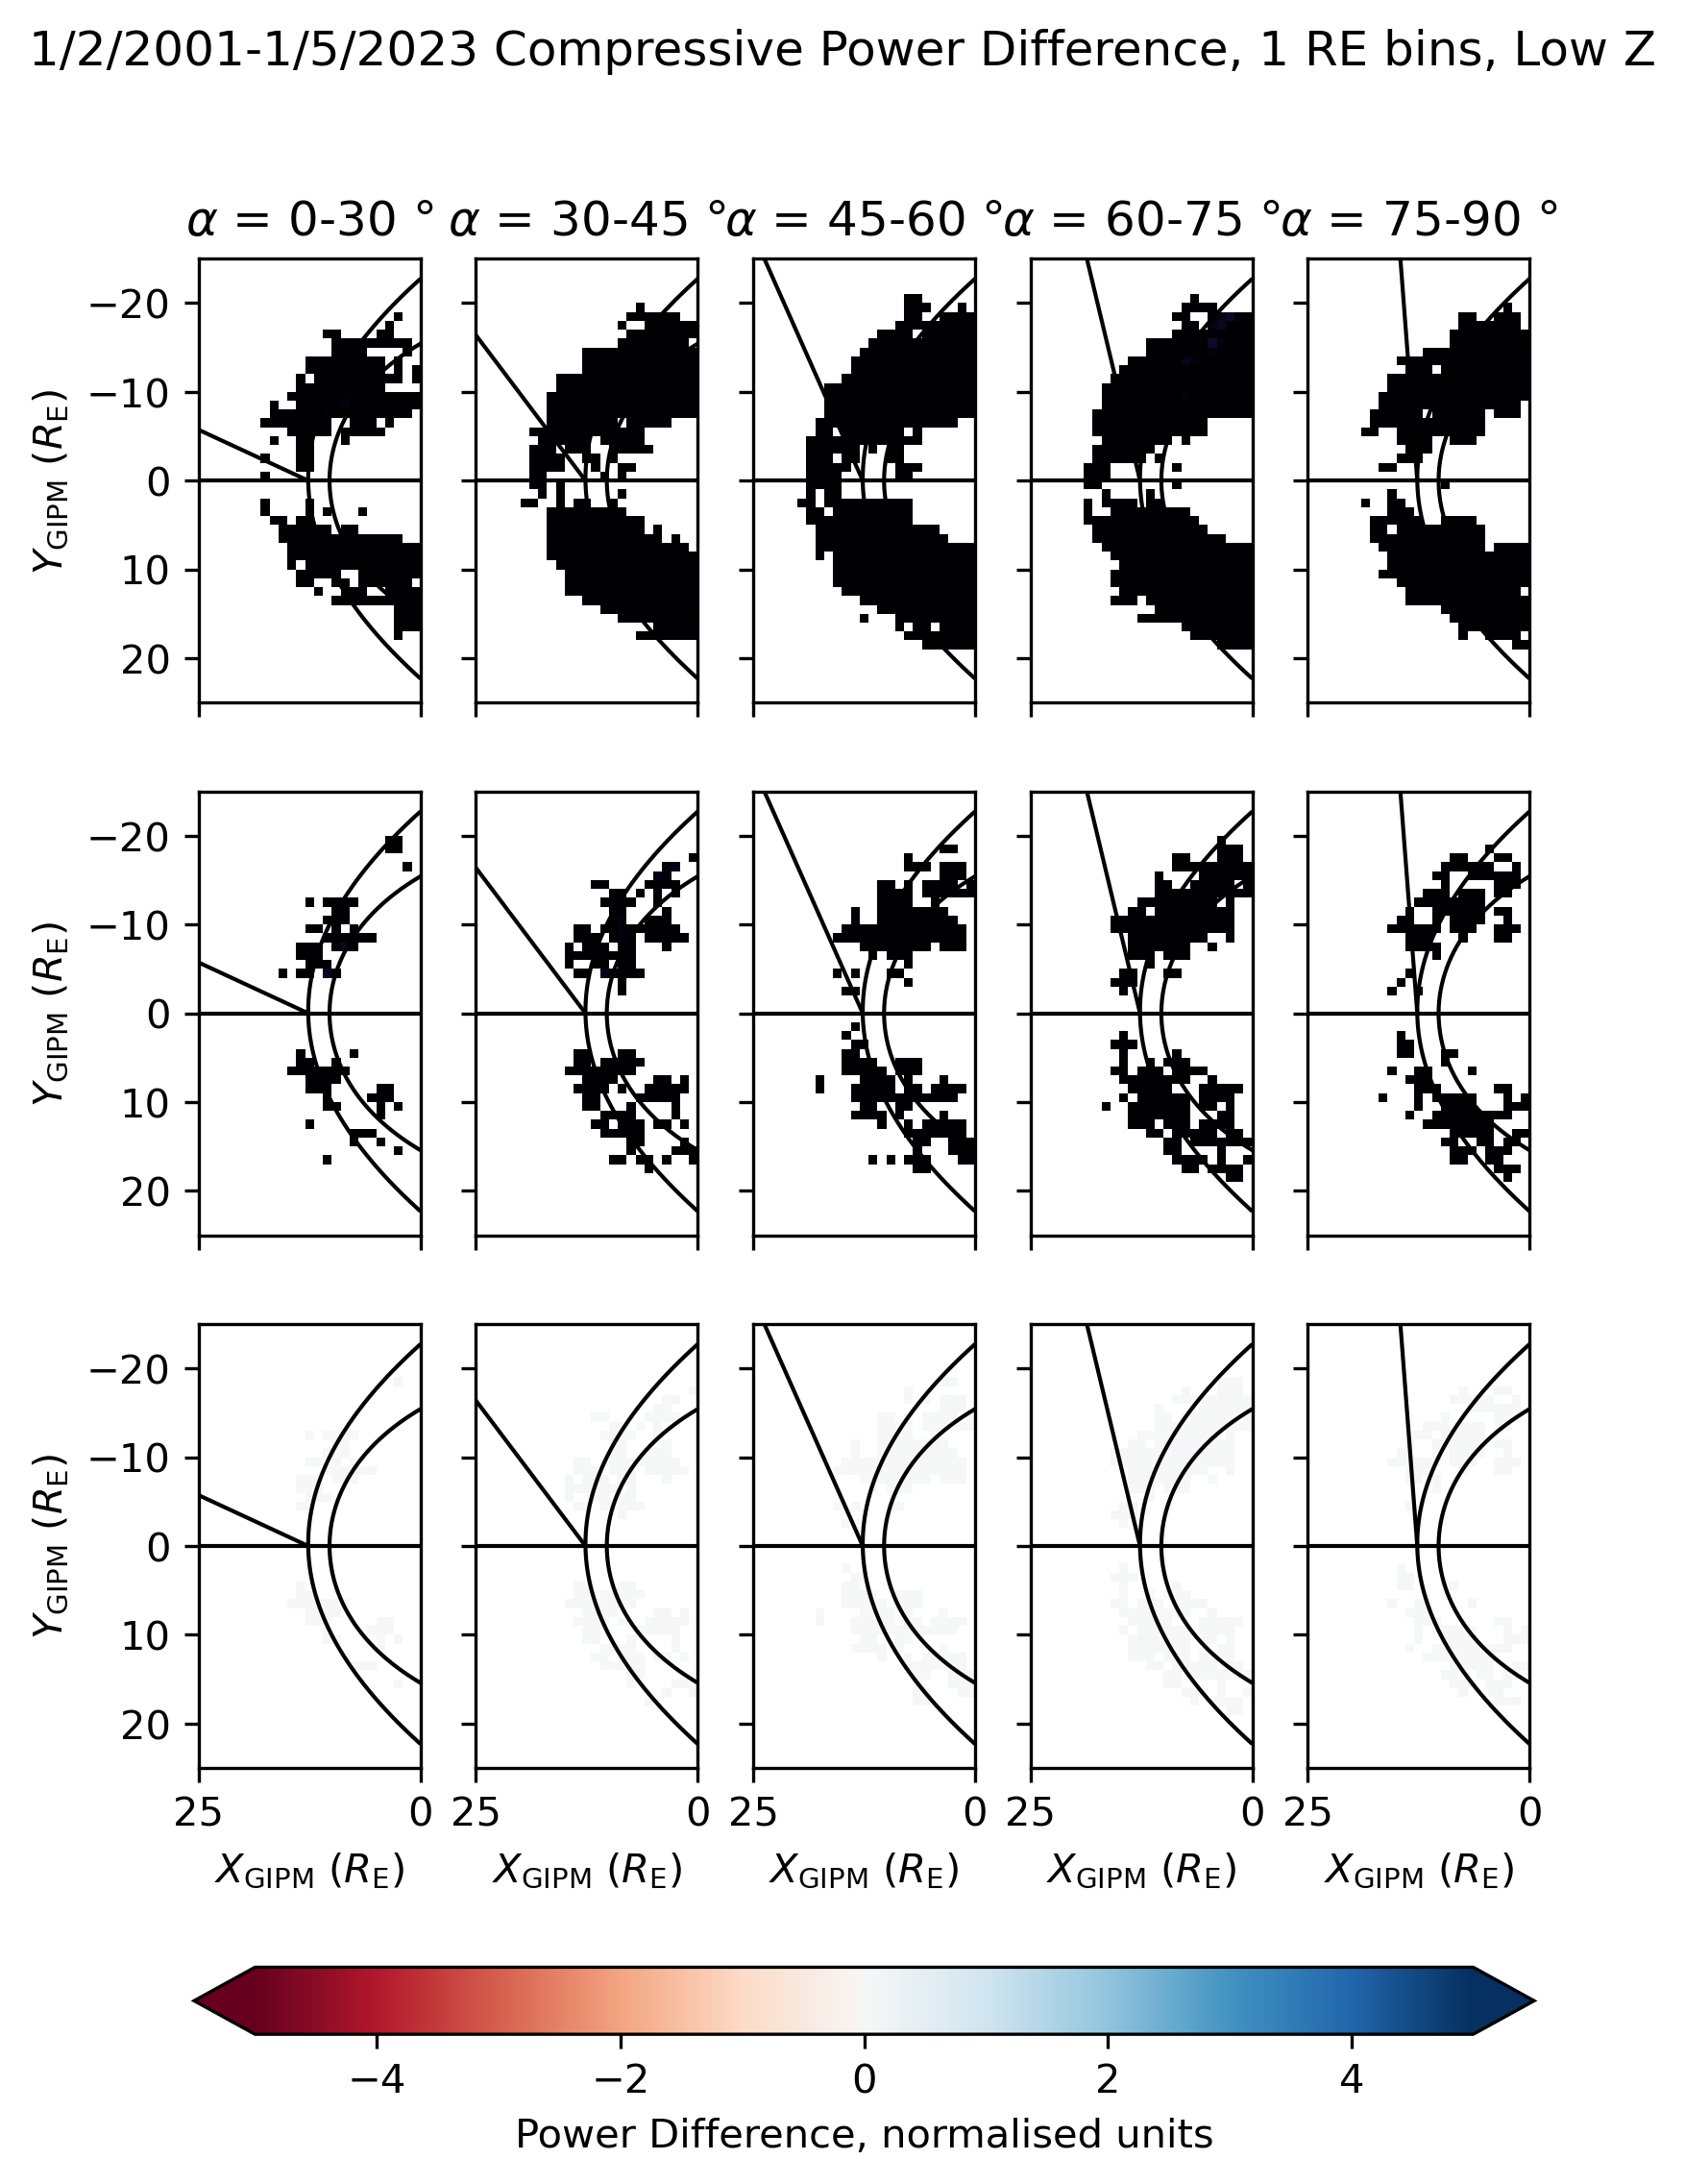

In [43]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power Difference, 1 RE bins, Low Z')

#cmap norm

norm = plt.Normalize(-5,5)
norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Difference, normalised units'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_diff_rad_5_10_15_Bnorm
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_diff_lowspir_5_10_15_Bnorm
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-25,25)
ax10.set_xlim(0,25)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_diff_highspir_5_10_15_Bnorm
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-25,25)
ax11.set_xlim(0,25)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-25,25)
ax13.set_xlim(0,25)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-25,25)
ax14.set_xlim(0,25)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_diff_lowperp_5_10_15_Bnorm
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-25,25)
ax15.set_xlim(0,25)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-25,25)
ax17.set_xlim(0,25)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-25,25)
ax18.set_xlim(0,25)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_diff_highperp_5_10_15_Bnorm
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-25,25)
ax19.set_xlim(0,25)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

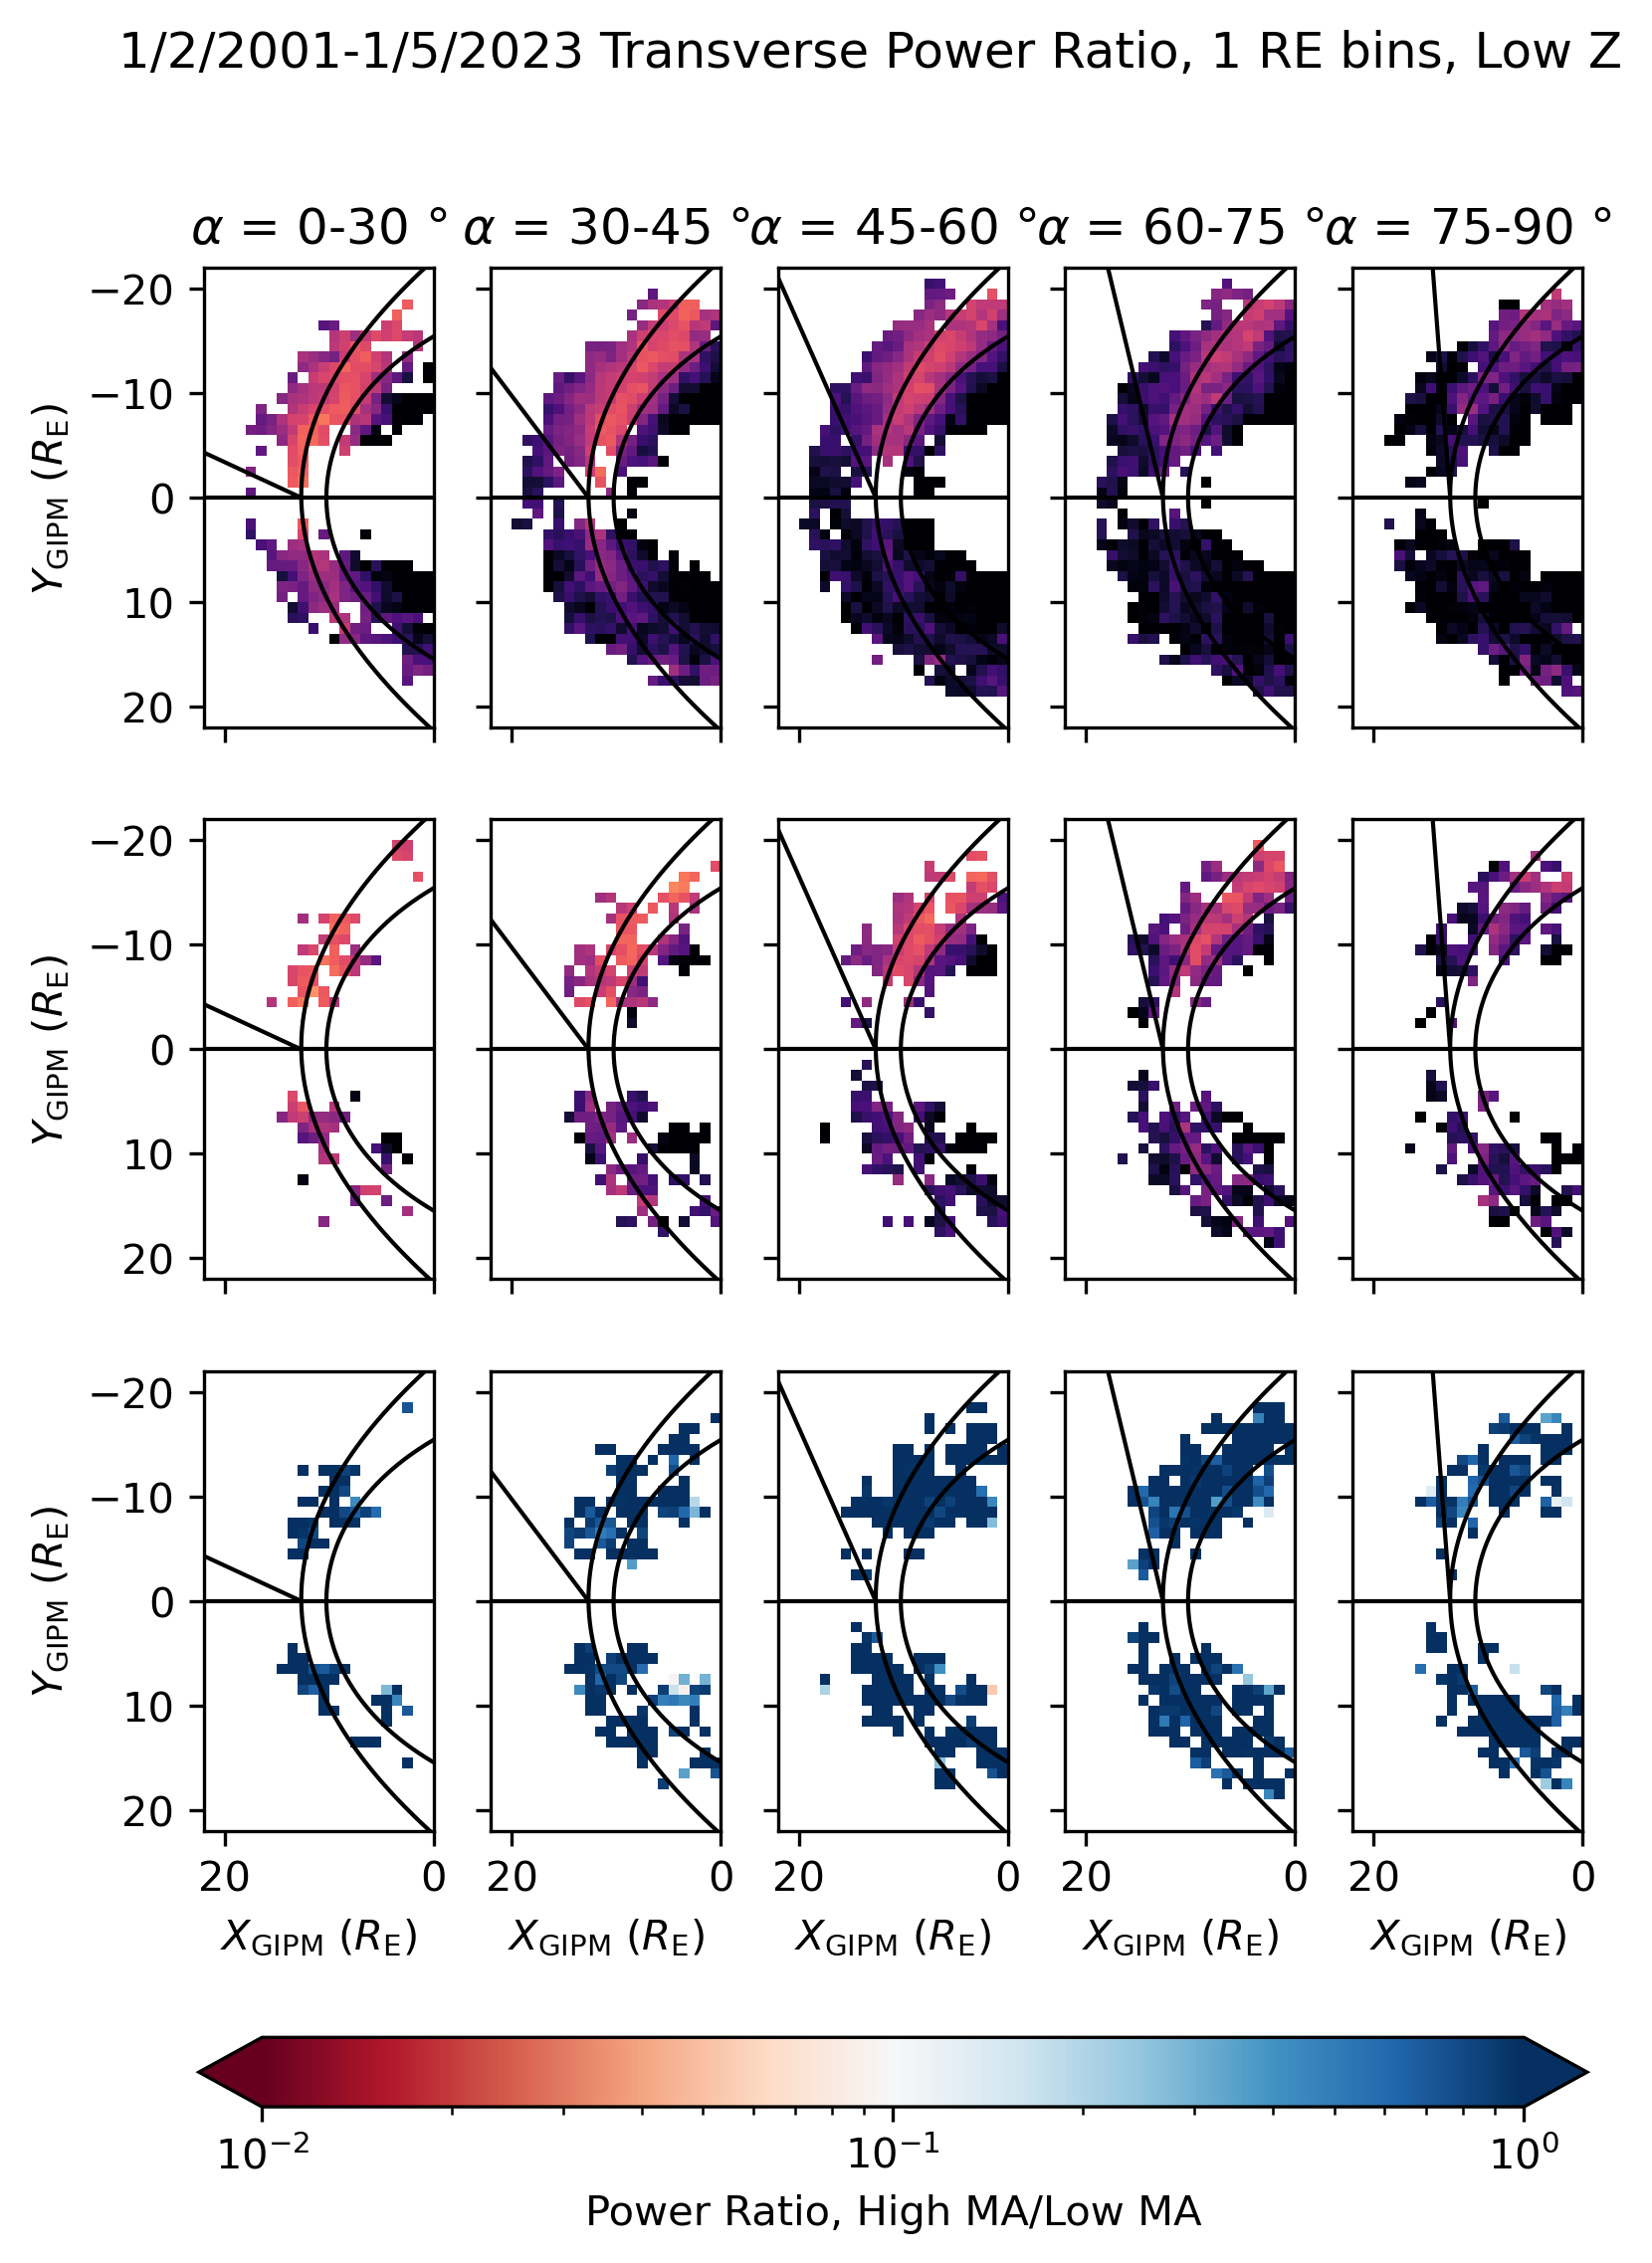

In [50]:
#plot w/ two rows of 5-10 and 10-15 and then the ratioerence.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Transverse Power Ratio, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.01, 1)
norm_plasma = colors.LogNorm(0.01, 1)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_perp_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA/Low MA'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_perp_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = perp_ratio_rad_5_10_15_Bnorm
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_perp_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_perp_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = perp_ratio_lowspir_5_10_15_Bnorm
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_perp_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_perp_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-22,22)
ax10.set_xlim(0,22)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = perp_ratio_highspir_5_10_15_Bnorm
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-22,22)
ax11.set_xlim(0,22)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_perp_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-22,22)
ax13.set_xlim(0,22)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_perp_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-22,22)
ax14.set_xlim(0,22)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = perp_ratio_lowperp_5_10_15_Bnorm
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-22,22)
ax15.set_xlim(0,22)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_perp_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-22,22)
ax17.set_xlim(0,22)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_perp_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-22,22)
ax18.set_xlim(0,22)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = perp_ratio_highperp_5_10_15_Bnorm
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-22,22)
ax19.set_xlim(0,22)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

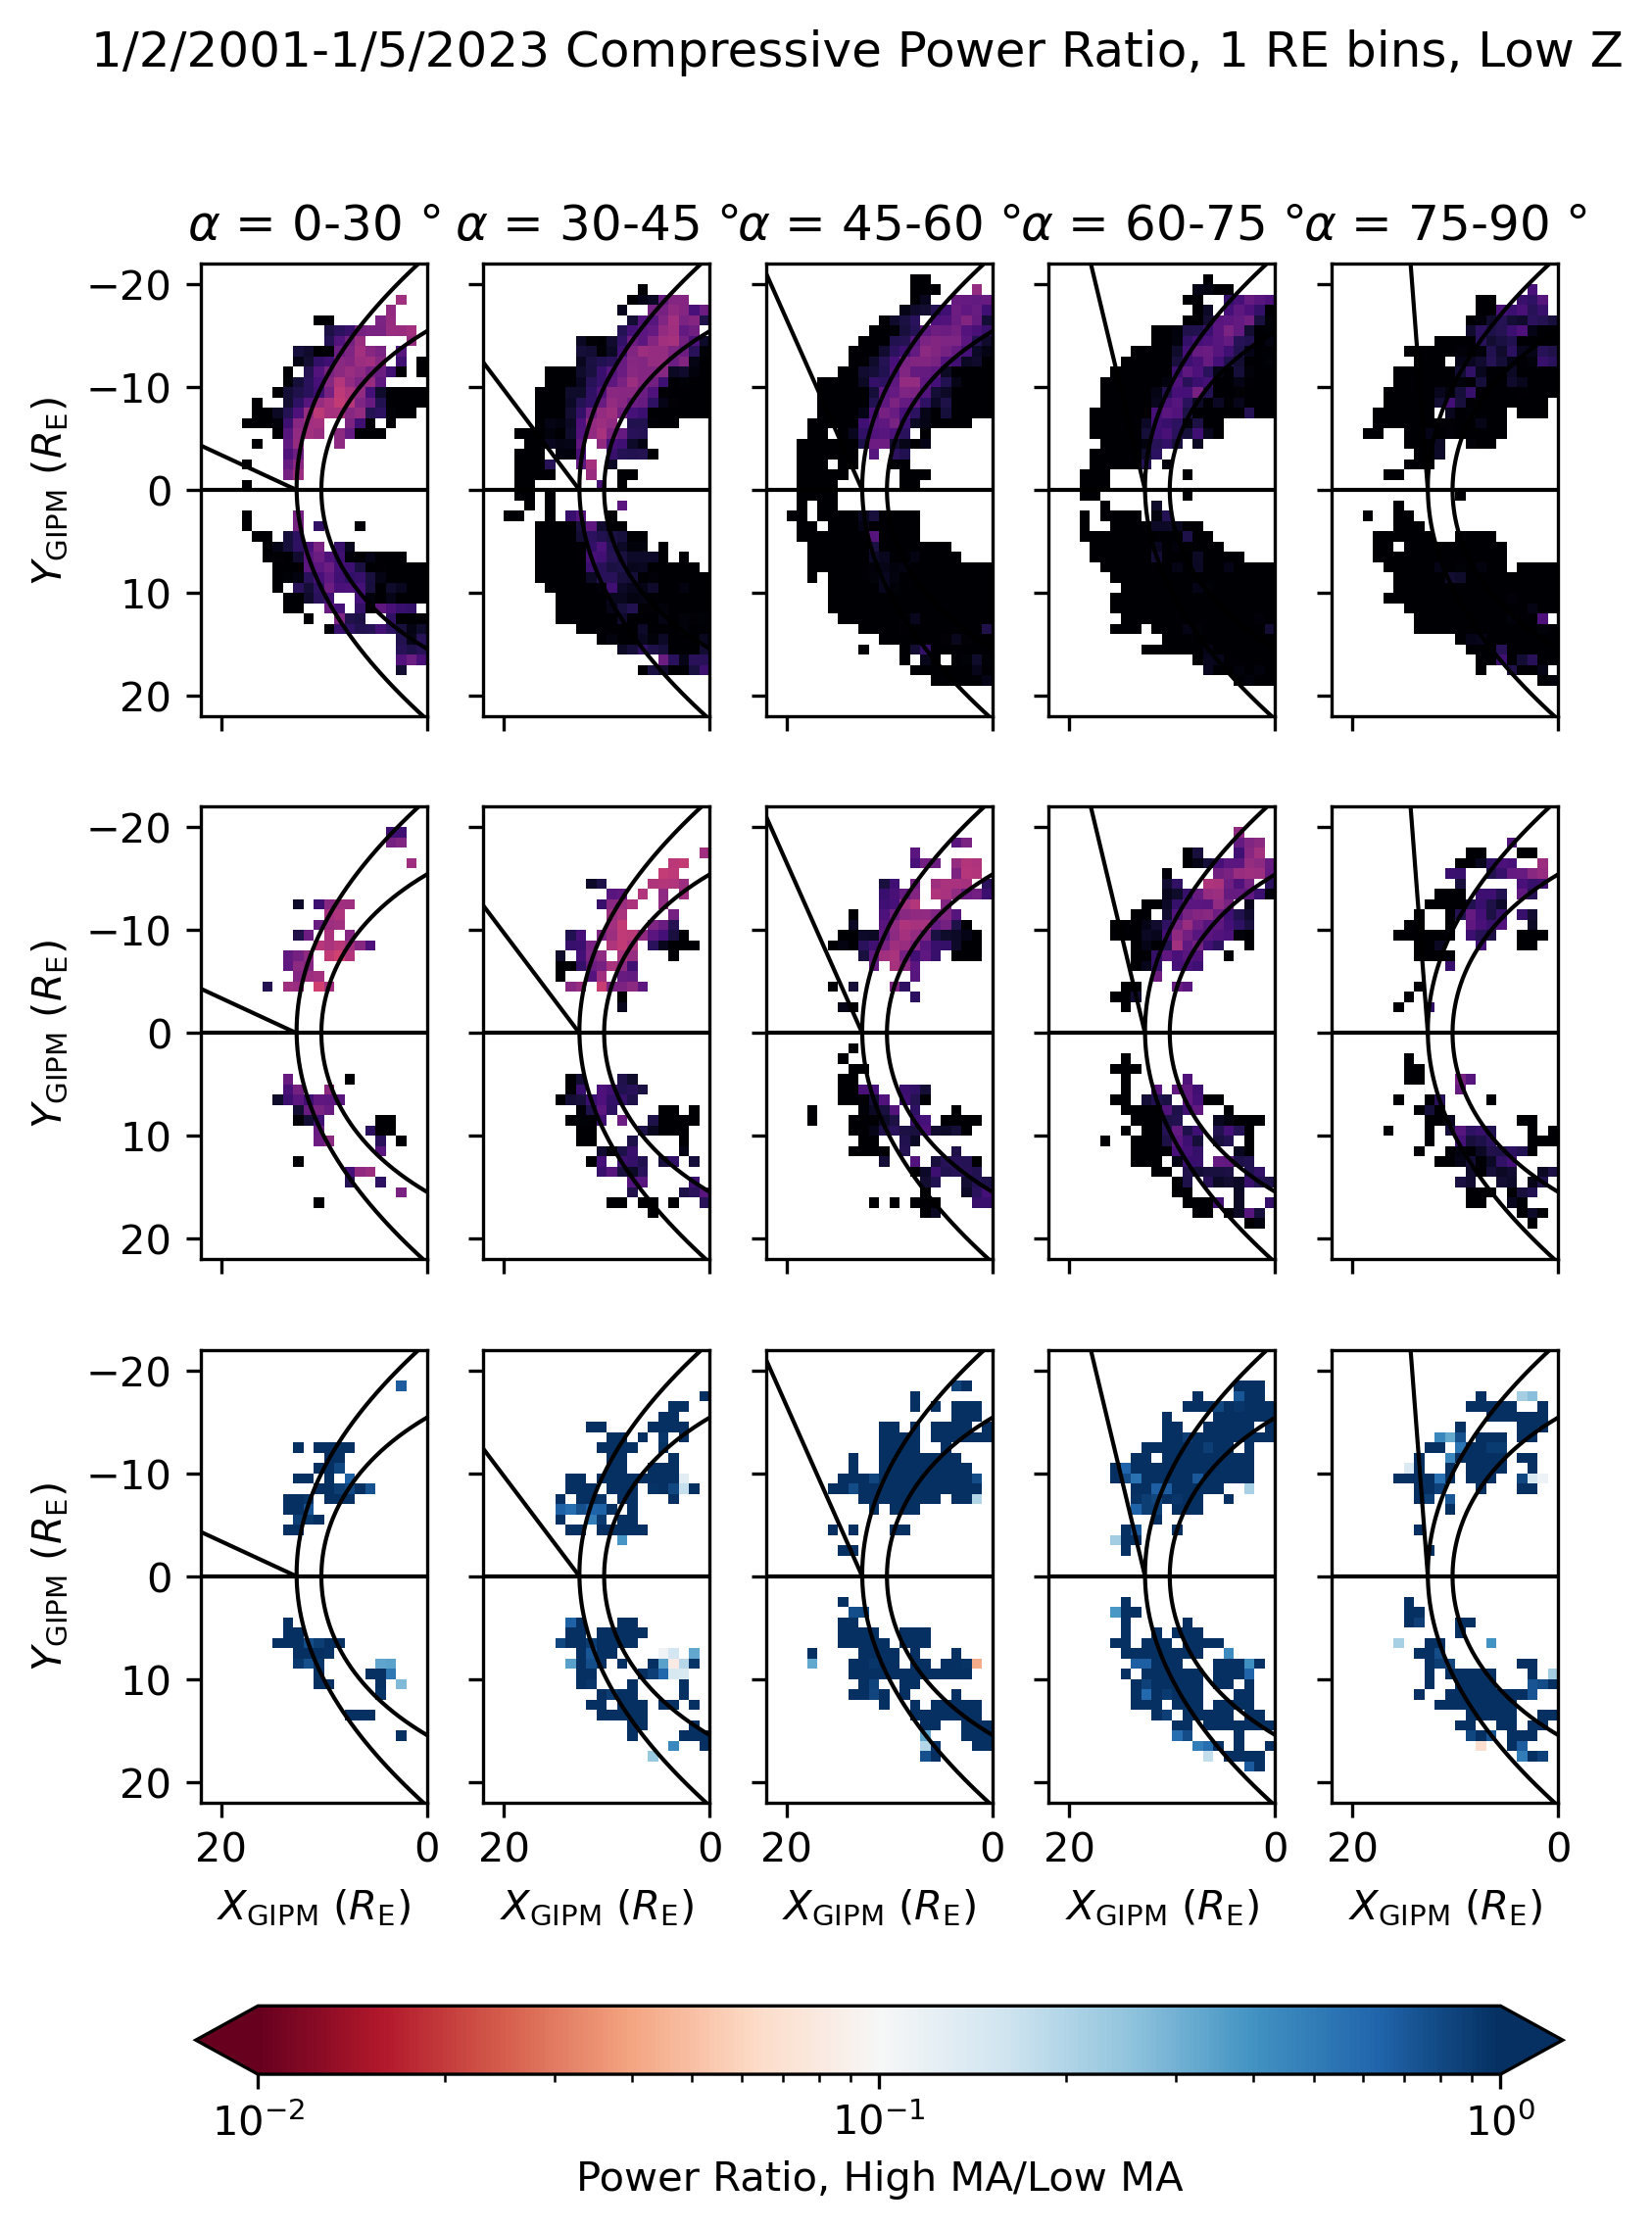

In [49]:
#plot w/ two rows of 5-10 and 10-15 and then the difference.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive Power Ratio, 1 RE bins, Low Z')

#cmap norm

norm = colors.LogNorm(0.01, 1)
norm_plasma = colors.LogNorm(0.01, 1)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(mean_para_rad_5_10_Bnorm)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA/Low MA'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(mean_para_rad_10_15_Bnorm)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = para_ratio_rad_5_10_15_Bnorm
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(mean_para_lowspir_5_10_Bnorm)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(mean_para_lowspir_10_15_Bnorm)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = para_ratio_lowspir_5_10_15_Bnorm
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(mean_para_highspir_5_10_Bnorm)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(mean_para_highspir_10_15_Bnorm)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-22,22)
ax10.set_xlim(0,22)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = para_ratio_highspir_5_10_15_Bnorm
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-22,22)
ax11.set_xlim(0,22)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(mean_para_lowperp_5_10_Bnorm)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-22,22)
ax13.set_xlim(0,22)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(mean_para_lowperp_10_15_Bnorm)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-22,22)
ax14.set_xlim(0,22)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = para_ratio_lowperp_5_10_15_Bnorm
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-22,22)
ax15.set_xlim(0,22)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(mean_para_highperp_5_10_Bnorm)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-22,22)
ax17.set_xlim(0,22)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(mean_para_highperp_10_15_Bnorm)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='magma', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-22,22)
ax18.set_xlim(0,22)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = para_ratio_highperp_5_10_15_Bnorm
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-22,22)
ax19.set_xlim(0,22)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


Text(0.5, 0, '$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)')

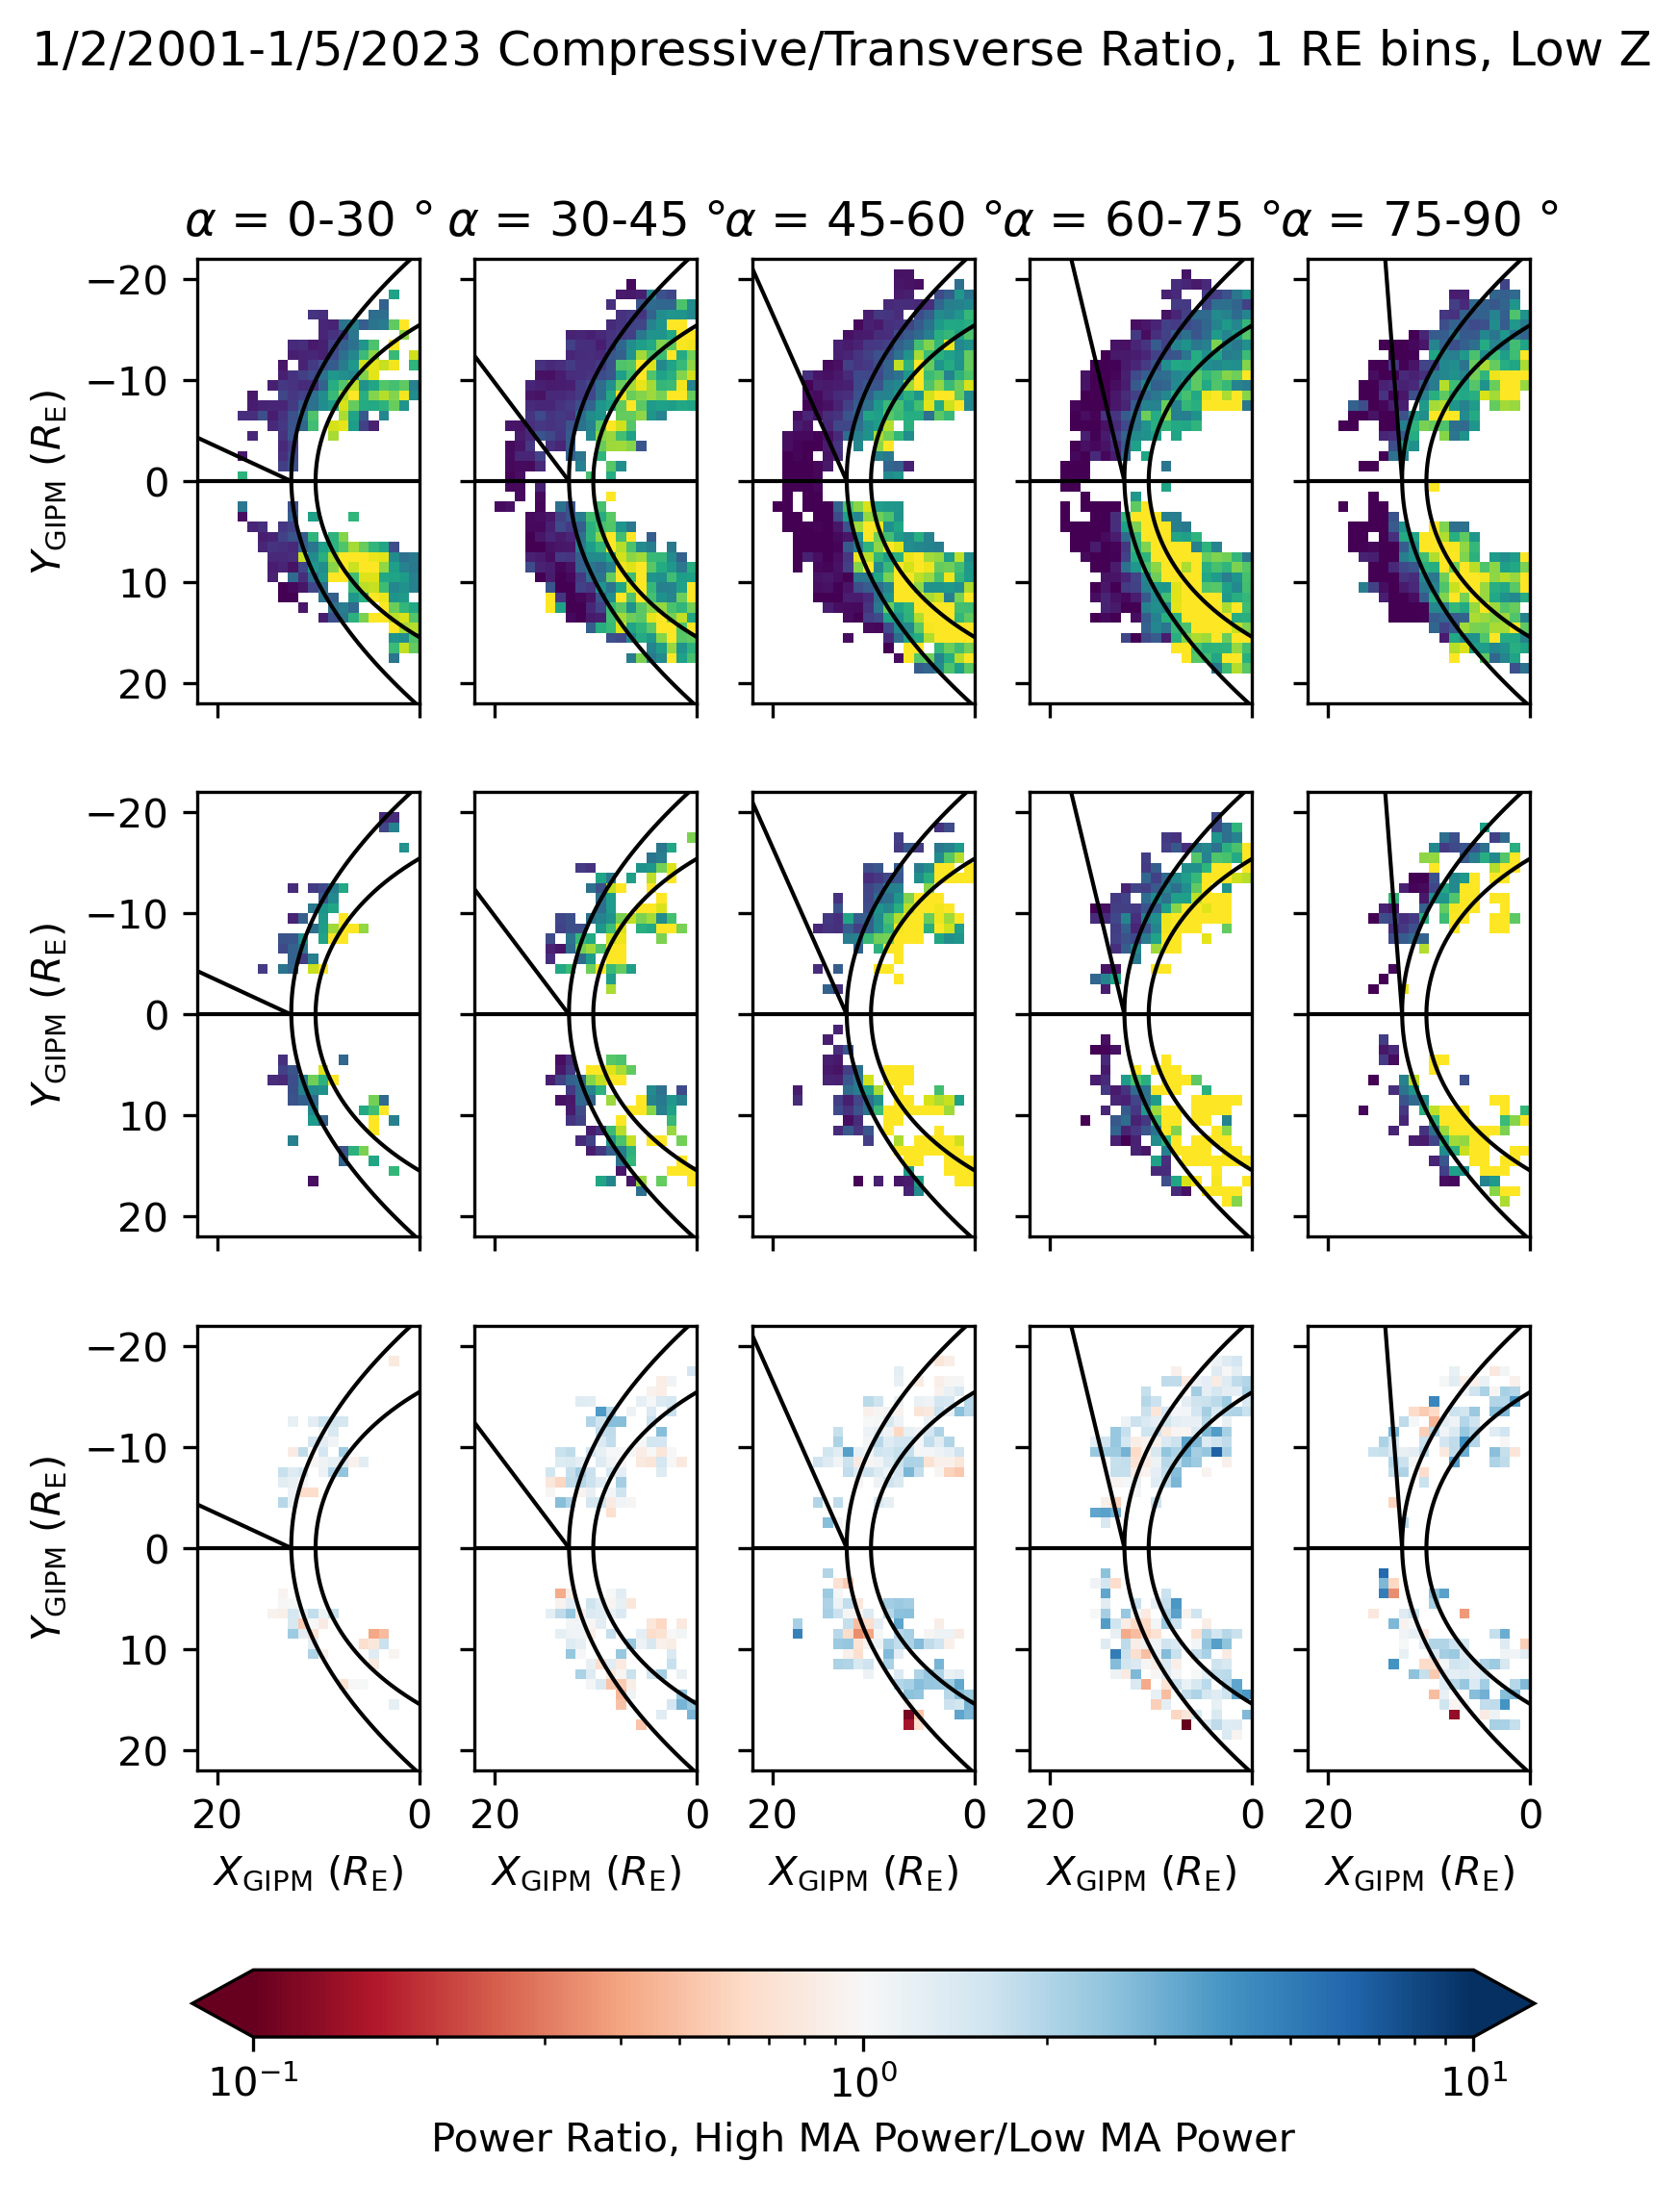

In [46]:
### compressive/transverse ratio
### high and low mach number

#plot w/ two rows of 5-10 and 10-15 and then the ratioerence.

#now make the big plot with all the transverse components first

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]

x_1 = np.linspace(0, 20, 100) #x coordinates (Re)
y_1 = 0 #y coordinates (Re)
z_1 = np.linspace(-30, 30, 100) #z coordinates in Re

[Xgipm_1,Ygipm_1,Zgipm_1] = np.meshgrid(x_1,y_1,z_1,indexing="ij")
Xn_1 = Xgipm_1
Yn_1 = Ygipm_1
Zn_1 = Zgipm_1
f_1 = fitting_coeffs[0]*Xn_1**2 + fitting_coeffs[1]*Yn_1**2 + fitting_coeffs[2]*Zn_1**2+ 2*fitting_coeffs[3]*Xn_1*Yn_1 + 2*fitting_coeffs[4]*Yn_1*Zn_1 + 2*fitting_coeffs[5]*Xn_1*Zn_1 + 2*fitting_coeffs[6]*Xn_1+2*fitting_coeffs[7]*Yn_1 + 2*fitting_coeffs[8]*Zn_1 + fitting_coeffs[9]

#magnetopause model, D = 2 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z =0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

###################
fig, ax = plt.subplots(figsize=(6, 8), dpi=300)
subfigs = fig.subfigures(1, 1)
axsLeft = subfigs.subplots(3, 5, sharey=True, sharex=True)
subfigs.suptitle('1/2/2001-1/5/2023 Compressive/Transverse Ratio, 1 RE bins, Low Z')

#cmap norm

norm_plasma = plt.Normalize(0.1,1)
norm = colors.LogNorm(0.1, 10)
#norm_plasma = colors.LogNorm(0.1, 10)

#cmap mesh

bin_size = 1
x_mesh = np.arange(0, 25, bin_size) 
y_mesh = np.arange(-26, 26, bin_size)
x_bin_ticks = int(25/bin_size)
y_bin_ticks = int(52/bin_size)

#ax0.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

#want to find three points on the bow shock surface, at y=0 and y=±8 and draw lines from there
#without exceeding current bounds of plot
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
X_BS_nose = (-fitting_coeffs[6] + np.sqrt(inter_med))/fitting_coeffs[0]

x_s = X_BS_nose
y_s = 0
x_e = 30

tan_angle_0 = np.tan(np.deg2rad(15))
y_e_0 = -x_e*(tan_angle_0)

ax1 = axsLeft[0,0]

ax1.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax1.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_1 = np.array(para_perp_rad_5_10)
color_grid_1 = col_array_1.reshape(x_bin_ticks, y_bin_ticks)
color_grid_1 = np.rot90(color_grid_1)
color_grid_1 = np.flipud(color_grid_1)

ax1.set_aspect('equal')
#ax1.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax1.pcolormesh(x_mesh, y_mesh, color_grid_1[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax1.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax1.set_ylim(-20,20)
ax1.set_xlim(0,20)
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax1.set_title(r'$\alpha$ = 0-30 $\degree$')
cbar_title = r'Power Ratio, High MA Power/Low MA Power'
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='RdBu'),location='bottom',anchor=(0.5, 0), panchor=(0.5, 0.2), pad =0, ax=axsLeft, extend='both', label=cbar_title)


ax2 = axsLeft[1,0]

col_array_2 = np.array(para_perp_rad_10_15)
color_grid_2 = col_array_2.reshape(x_bin_ticks, y_bin_ticks)
color_grid_2 = np.rot90(color_grid_2)
color_grid_2 = np.flipud(color_grid_2)

ax2.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax2.plot(X_shue, R_shue, linewidth=1, color='k')

ax2.set_aspect('equal')
#ax2.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax2.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


ax2.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax2.pcolormesh(x_mesh, y_mesh, color_grid_2[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax2.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax2.set_ylim(-20,20)
ax2.set_xlim(0,20)
ax2.invert_xaxis()
ax2.invert_yaxis()

ax3 = axsLeft[2,0]

ax3.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax3.plot(X_shue, R_shue, linewidth=1, color='k')

col_array_3 = ratio_ratio_rad_5_10_15
color_grid_3 = col_array_3.reshape(x_bin_ticks, y_bin_ticks)
color_grid_3 = np.rot90(color_grid_3)
color_grid_3 = np.flipud(color_grid_3)

ax3.set_aspect('equal')
#ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
ax3.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax3.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax3.pcolormesh(x_mesh, y_mesh, color_grid_3[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax3.plot([x_s, x_e], [y_s, y_e_0], color='k',linewidth=1)
ax3.set_ylim(-20,20)
ax3.set_xlim(0,20)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########LOW SPIRAL############################

tan_angle_lowspir = np.tan(np.deg2rad(37.5))
y_e_lowspir = -x_e*(tan_angle_lowspir)

ax5 = axsLeft[0,1]

ax5.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax5.plot(X_shue, R_shue, linewidth=1, color='k')
ax5.set_aspect('equal')
#a5.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax5.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_5 = np.array(para_perp_lowspir_5_10)
color_grid_5 = col_array_5.reshape(x_bin_ticks, y_bin_ticks)
color_grid_5 = np.rot90(color_grid_5)
color_grid_5 = np.flipud(color_grid_5)

ax5.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax5.pcolormesh(x_mesh, y_mesh, color_grid_5[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax5.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax5.set_ylim(-20,20)
ax5.set_xlim(0,20)
ax5.invert_xaxis()
ax5.invert_yaxis()
ax5.set_title(r'$\alpha$ = 30-45 $\degree$')

ax6 = axsLeft[1,1]

ax6.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax6.plot(X_shue, R_shue, linewidth=1, color='k')
ax6.set_aspect('equal')
#ax6.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax6.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_6 = np.array(para_perp_lowspir_10_15)
color_grid_6 = col_array_6.reshape(x_bin_ticks, y_bin_ticks)
color_grid_6 = np.rot90(color_grid_6)
color_grid_6 = np.flipud(color_grid_6)

ax6.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax6.pcolormesh(x_mesh, y_mesh, color_grid_6[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax6.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax6.set_ylim(-20,20)
ax6.set_xlim(0,20)
ax6.invert_xaxis()
ax6.invert_yaxis()

ax7 = axsLeft[2,1]

ax7.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax7.plot(X_shue, R_shue, linewidth=1, color='k')
ax7.set_aspect('equal')
#ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax7.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_7 = ratio_ratio_lowspir_5_10_15
color_grid_7 = col_array_7.reshape(x_bin_ticks, y_bin_ticks)
color_grid_7 = np.rot90(color_grid_7)
color_grid_7 = np.flipud(color_grid_7)

ax7.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax7.pcolormesh(x_mesh, y_mesh, color_grid_7[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax7.plot([x_s, x_e], [y_s, y_e_lowspir], color='k',linewidth=1)
ax7.set_ylim(-20,20)
ax7.set_xlim(0,20)
ax7.invert_xaxis()
ax7.invert_yaxis()
ax7.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

###########HIGH SPIRAL############################

tan_angle_highspir = np.tan(np.deg2rad(52.5))
y_e_highspir = -x_e*(tan_angle_highspir)

#ax8.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax8.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

ax9 = axsLeft[0,2]

ax9.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax9.plot(X_shue, R_shue, linewidth=1, color='k')
ax9.set_aspect('equal')
#ax9.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax9.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_9 = np.array(para_perp_highspir_5_10)
color_grid_9 = col_array_9.reshape(x_bin_ticks, y_bin_ticks)
color_grid_9 = np.rot90(color_grid_9)
color_grid_9 = np.flipud(color_grid_9)

ax9.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax9.pcolormesh(x_mesh, y_mesh, color_grid_9[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax9.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax9.set_ylim(-20,20)
ax9.set_xlim(0,20)
ax9.invert_xaxis()
ax9.invert_yaxis()
ax9.set_title(r'$\alpha$ = 45-60 $\degree$')

ax10 = axsLeft[1,2]

ax10.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax10.plot(X_shue, R_shue, linewidth=1, color='k')
ax10.set_aspect('equal')
#ax10.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax10.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_10 = np.array(para_perp_highspir_10_15)
color_grid_10 = col_array_10.reshape(x_bin_ticks, y_bin_ticks)
color_grid_10 = np.rot90(color_grid_10)
color_grid_10 = np.flipud(color_grid_10)

ax10.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax10.pcolormesh(x_mesh, y_mesh, color_grid_10[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax10.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax10.set_ylim(-22,22)
ax10.set_xlim(0,22)
ax10.invert_xaxis()
ax10.invert_yaxis()

ax11 = axsLeft[2,2]

ax11.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax11.plot(X_shue, R_shue, linewidth=1, color='k')
ax11.set_aspect('equal')
#ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax11.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_11 = ratio_ratio_highspir_5_10_15
color_grid_11 = col_array_11.reshape(x_bin_ticks, y_bin_ticks)
color_grid_11 = np.rot90(color_grid_11)
color_grid_11 = np.flipud(color_grid_11)

ax11.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax11.pcolormesh(x_mesh, y_mesh, color_grid_11[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax11.plot([x_s, x_e], [y_s, y_e_highspir], color='k',linewidth=1)
ax11.set_ylim(-22,22)
ax11.set_xlim(0,22)
ax11.invert_xaxis()
ax11.invert_yaxis()
ax11.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")


######LOW PERPENDICULAR

tan_angle_lowperp = np.tan(np.deg2rad(67.5))
y_e_lowperp = -x_e*(tan_angle_lowperp)

ax13 = axsLeft[0,3]

ax13.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax13.plot(X_shue, R_shue, linewidth=1, color='k')
ax13.set_aspect('equal')
ax13.set_title(r'$\alpha$ = 60-75 $\degree$')
#ax13.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax13.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_13 = np.array(para_perp_lowperp_5_10)
color_grid_13 = col_array_13.reshape(x_bin_ticks, y_bin_ticks)
color_grid_13 = np.rot90(color_grid_13)
color_grid_13 = np.flipud(color_grid_13)

ax13.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax13.pcolormesh(x_mesh, y_mesh, color_grid_13[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax13.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax13.set_ylim(-22,22)
ax13.set_xlim(0,22)
ax13.invert_xaxis()
ax13.invert_yaxis()

ax14 = axsLeft[1,3]

ax14.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax14.plot(X_shue, R_shue, linewidth=1, color='k')
ax14.set_aspect('equal')
#ax14.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax14.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

col_array_14 = np.array(para_perp_lowperp_10_15)
color_grid_14 = col_array_14.reshape(x_bin_ticks, y_bin_ticks)
color_grid_14 = np.rot90(color_grid_14)
color_grid_14 = np.flipud(color_grid_14)

ax14.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax14.pcolormesh(x_mesh, y_mesh, color_grid_14[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax14.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax14.set_ylim(-22,22)
ax14.set_xlim(0,22)
ax14.invert_xaxis()
ax14.invert_yaxis()

ax15 = axsLeft[2,3]

ax15.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax15.plot(X_shue, R_shue, linewidth=1, color='k')
ax15.set_aspect('equal')
#ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
#ax15.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
col_array_15 = ratio_ratio_lowperp_5_10_15
color_grid_15 = col_array_15.reshape(x_bin_ticks, y_bin_ticks)
color_grid_15 = np.rot90(color_grid_15)
color_grid_15 = np.flipud(color_grid_15)

ax15.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax15.pcolormesh(x_mesh, y_mesh, color_grid_15[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax15.plot([x_s, x_e], [y_s, y_e_lowperp], color='k',linewidth=1)
ax15.set_ylim(-22,22)
ax15.set_xlim(0,22)
ax15.invert_xaxis()
ax15.invert_yaxis()

ax15.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

######HIGH PERPENDICULAR

tan_angle_highperp = np.tan(np.deg2rad(82.5))
y_e_highperp = -x_e*(tan_angle_highperp)


ax17 = axsLeft[0,4]

ax17.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax17.plot(X_shue, R_shue, linewidth=1, color='k')
ax17.set_aspect('equal')

col_array_17 = np.array(para_perp_highperp_5_10)
color_grid_17 = col_array_17.reshape(x_bin_ticks, y_bin_ticks)
color_grid_17 = np.rot90(color_grid_17)
color_grid_17 = np.flipud(color_grid_17)

ax17.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax17.pcolormesh(x_mesh, y_mesh, color_grid_17[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax17.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax17.set_ylim(-22,22)
ax17.set_xlim(0,22)
ax17.set_title(r'$\alpha$ = 75-90 $\degree$')
ax17.invert_xaxis()
ax17.invert_yaxis()


ax18 = axsLeft[1,4]

ax18.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax18.plot(X_shue, R_shue, linewidth=1, color='k')
ax18.set_aspect('equal')

col_array_18 = np.array(para_perp_highperp_10_15)
color_grid_18 = col_array_18.reshape(x_bin_ticks, y_bin_ticks)
color_grid_18 = np.rot90(color_grid_18)
color_grid_18 = np.flipud(color_grid_18)

ax18.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax18.pcolormesh(x_mesh, y_mesh, color_grid_18[:-1, :-1], shading='flat', cmap='viridis', norm=norm_plasma)
ax18.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax18.set_ylim(-22,22)
ax18.set_xlim(0,22)
ax18.invert_xaxis()
ax18.invert_yaxis()

ax19 = axsLeft[2,4]

ax19.contour(Xgipm[:,:,0],Ygipm[:,:,0],f[:,:,0],levels = [0],colors="black",linewidths=1)
ax19.plot(X_shue, R_shue, linewidth=1, color='k')
ax19.set_aspect('equal')

col_array_19 = ratio_ratio_highperp_5_10_15
color_grid_19 = col_array_19.reshape(x_bin_ticks, y_bin_ticks)
color_grid_19 = np.rot90(color_grid_19)
color_grid_19 = np.flipud(color_grid_19)

ax19.hlines(y=0, xmin= 0, xmax=25, linewidth=1, color='k')
ax19.pcolormesh(x_mesh, y_mesh, color_grid_19[:-1, :-1], shading='flat', cmap='RdBu', norm=norm)
ax19.plot([x_s, x_e], [y_s, y_e_highperp], color='k',linewidth=1)
ax19.set_ylim(-22,22)
ax19.set_xlim(0,22)
ax19.invert_xaxis()
ax19.invert_yaxis()

ax19.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
